In [1]:
# Let's Import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Let's import data and read the data
data = pd.read_csv('classification_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [4]:
data.head()

count_session  count_hit channelGrouping  totals_newVisits  \
0              9       1194         (Other)                 0   
1              9       1194         (Other)                 0   
2             28       1816     Paid Search                 0   
3              2        299     Paid Search                 0   
4              2        299     Paid Search                 0   

    device_browser device_operatingSystem  device_isMobile  \
0  GoogleAnalytics                Android             True   
1  GoogleAnalytics                Android             True   
2  GoogleAnalytics                Android             True   
3  GoogleAnalytics                Android             True   
4  GoogleAnalytics                Android             True   

  device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
0                mobile           Sharjah              25.3463  ...   
1                mobile           Sharjah              25.3463  ...   
2                mobile             Ajman              25.4052  ...   
3                mobile         Abu Dhabi              24.4539  ...   
4                mobile         Abu Dhabi              24.4539  ...   

                latest_keyword  earliest_isTrueDirect  latest_isTrueDirect  \
0                    (not set)                   True                 True   
1                    (not set)                   True                 True   
2         (automatic matching)                   True                 True   
3  custom0==marketplace&+id==*                   True                 True   
4  custom0==marketplace&+id==*                   True                 True   

   num_interactions  bounces  time_on_site  transactionRevenue  \
0              1900        0          5617                   0   
1              1900        0          5617                   0   
2              3843        0         77417          1477195214   
3               592        0          1576                   0   
4               592        0          1576                   0   

                                      products_array  has_converted  \
0                               food////food////food              0   
1                               food////food////food              0   
2  (not set)////baby_products--milk,_food_&_juice...              1   
3                                       food////food              0   
4                                       food////food              0   

   target_date  
0   2021-01-01  
1   2021-01-01  
2   2021-01-01  
3   2021-01-01  
4   2021-01-01  

[5 rows x 46 columns]

In [5]:
# Let's check the shape
data.shape

(100000, 46)

In [6]:
data.tail()

count_session  count_hit channelGrouping  totals_newVisits  \
99995             58      12340     Paid Search                 0   
99996             58      12340     Paid Search                 0   
99997             58      12340     Paid Search                 0   
99998             58      12340     Paid Search                 0   
99999             58      12340     Paid Search                 0   

        device_browser device_operatingSystem  device_isMobile  \
99995  GoogleAnalytics                    iOS             True   
99996  GoogleAnalytics                    iOS             True   
99997  GoogleAnalytics                    iOS             True   
99998  GoogleAnalytics                    iOS             True   
99999  GoogleAnalytics                    iOS             True   

      device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
99995                mobile             Dubai              25.2048  ...   
99996                mobile             Dubai              25.2048  ...   
99997                mobile             Dubai              25.2048  ...   
99998                mobile             Dubai              25.2048  ...   
99999                mobile             Dubai              25.2048  ...   

                    latest_keyword  earliest_isTrueDirect  \
99995  custom0==marketplace&+id==*                   True   
99996  custom0==marketplace&+id==*                   True   
99997  custom0==marketplace&+id==*                   True   
99998  custom0==marketplace&+id==*                   True   
99999  custom0==marketplace&+id==*                   True   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
99995                 True             34999        0             0   
99996                 True             34999        0             0   
99997                 True             34999        0             0   
99998                 True             34999        0             0   
99999                 True             34999        0             0   

       transactionRevenue                                     products_array  \
99995           149151662  baby_products--milk,_food_&_juices--baby_&_tod...   
99996           149151662  baby_products--milk,_food_&_juices--baby_&_tod...   
99997           149151662  baby_products--milk,_food_&_juices--baby_&_tod...   
99998           149151662  baby_products--milk,_food_&_juices--baby_&_tod...   
99999           149151662  baby_products--milk,_food_&_juices--baby_&_tod...   

       has_converted  target_date  
99995              1   2021-01-01  
99996              1   2021-01-01  
99997              1   2021-01-01  
99998              1   2021-01-01  
99999              1   2021-01-01  

[5 rows x 46 columns]

In [7]:
data['target_date'].value_counts()

2021-01-01    100000
Name: target_date, dtype: int64

In [8]:
# We will check the null values
data.isnull().sum().all

<bound method NDFrame._add_numeric_operations.<locals>.all of count_session             0
count_hit                 0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
device_isMobile           0
device_deviceCategory     0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session          0
historic_session_page     0
youtube                   0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
sessionQualityDim         0
last_visitId              0
latest_visit_id           0
visitId_threshold         0
earliest_visit_id         0
earliest_visit_number     0
latest_visit_number       0
time_earliest_visit       0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_mediu

In [9]:
# We shall check the total columns
data.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

In [10]:
# We shall drop few columns that are not reqired for model building
column_to_drop = ["geoNetwork_latitude","totals_newVisits","bounce_rate","bounces","latest_medium","count_session","device_isMobile","geoNetwork_longitude","device_operatingSystem",'device_browser',"youtube","last_visitId","visitId_threshold","earliest_visit_id","earliest_visit_number",'time_earliest_visit','days_since_last_visit','days_since_first_visit','earliest_source','earliest_medium','earliest_keyword','earliest_isTrueDirect',"num_interactions",'target_date']

data.drop(column_to_drop, axis=1, inplace=True)

In [11]:
data.head()

count_hit channelGrouping device_deviceCategory geoNetwork_region  \
0       1194         (Other)                mobile           Sharjah   
1       1194         (Other)                mobile           Sharjah   
2       1816     Paid Search                mobile             Ajman   
3        299     Paid Search                mobile         Abu Dhabi   
4        299     Paid Search                mobile         Abu Dhabi   

   historic_session  historic_session_page  avg_session_time  \
0              6504                   1254        722.666667   
1              6504                   1254        722.666667   
2             12466                   4963        445.214286   
3              1575                      0        787.500000   
4              1575                      0        787.500000   

   avg_session_time_page  single_page_rate  sessionQualityDim  ...  \
0             139.333333          0.777778                  6  ...   
1             139.333333          0.777778                  6  ...   
2             177.250000          0.821429                  4  ...   
3               0.000000          1.000000                 42  ...   
4               0.000000          1.000000                 42  ...   

   time_latest_visit  avg_visit_time  visits_per_day  latest_source  \
0              19.17              18       66.333333       gulfnews   
1              19.17              18       66.333333       gulfnews   
2              11.20              11       73.480000         google   
3              14.90              17       37.375000         google   
4              14.90              17       37.375000         google   

                latest_keyword latest_isTrueDirect time_on_site  \
0                    (not set)                True         5617   
1                    (not set)                True         5617   
2         (automatic matching)                True        77417   
3  custom0==marketplace&+id==*                True         1576   
4  custom0==marketplace&+id==*                True         1576   

   transactionRevenue                                     products_array  \
0                   0                               food////food////food   
1                   0                               food////food////food   
2          1477195214  (not set)////baby_products--milk,_food_&_juice...   
3                   0                                       food////food   
4                   0                                       food////food   

   has_converted  
0              0  
1              0  
2              1  
3              0  
4              0  

[5 rows x 22 columns]

In [12]:
# we shall check the shape after downsizing
data.shape

(100000, 22)

In [13]:
data.columns

Index(['count_hit', 'channelGrouping', 'device_deviceCategory',
       'geoNetwork_region', 'historic_session', 'historic_session_page',
       'avg_session_time', 'avg_session_time_page', 'single_page_rate',
       'sessionQualityDim', 'latest_visit_id', 'latest_visit_number',
       'time_latest_visit', 'avg_visit_time', 'visits_per_day',
       'latest_source', 'latest_keyword', 'latest_isTrueDirect',
       'time_on_site', 'transactionRevenue', 'products_array',
       'has_converted'],
      dtype='object')

In [14]:
data.isnull().sum()

count_hit                0
channelGrouping          0
device_deviceCategory    0
geoNetwork_region        0
historic_session         0
historic_session_page    0
avg_session_time         0
avg_session_time_page    0
single_page_rate         0
sessionQualityDim        0
latest_visit_id          0
latest_visit_number      0
time_latest_visit        0
avg_visit_time           0
visits_per_day           0
latest_source            0
latest_keyword           0
latest_isTrueDirect      0
time_on_site             0
transactionRevenue       0
products_array           0
has_converted            0
dtype: int64

In [15]:
data.head()

count_hit channelGrouping device_deviceCategory geoNetwork_region  \
0       1194         (Other)                mobile           Sharjah   
1       1194         (Other)                mobile           Sharjah   
2       1816     Paid Search                mobile             Ajman   
3        299     Paid Search                mobile         Abu Dhabi   
4        299     Paid Search                mobile         Abu Dhabi   

   historic_session  historic_session_page  avg_session_time  \
0              6504                   1254        722.666667   
1              6504                   1254        722.666667   
2             12466                   4963        445.214286   
3              1575                      0        787.500000   
4              1575                      0        787.500000   

   avg_session_time_page  single_page_rate  sessionQualityDim  ...  \
0             139.333333          0.777778                  6  ...   
1             139.333333          0.777778                  6  ...   
2             177.250000          0.821429                  4  ...   
3               0.000000          1.000000                 42  ...   
4               0.000000          1.000000                 42  ...   

   time_latest_visit  avg_visit_time  visits_per_day  latest_source  \
0              19.17              18       66.333333       gulfnews   
1              19.17              18       66.333333       gulfnews   
2              11.20              11       73.480000         google   
3              14.90              17       37.375000         google   
4              14.90              17       37.375000         google   

                latest_keyword latest_isTrueDirect time_on_site  \
0                    (not set)                True         5617   
1                    (not set)                True         5617   
2         (automatic matching)                True        77417   
3  custom0==marketplace&+id==*                True         1576   
4  custom0==marketplace&+id==*                True         1576   

   transactionRevenue                                     products_array  \
0                   0                               food////food////food   
1                   0                               food////food////food   
2          1477195214  (not set)////baby_products--milk,_food_&_juice...   
3                   0                                       food////food   
4                   0                                       food////food   

   has_converted  
0              0  
1              0  
2              1  
3              0  
4              0  

[5 rows x 22 columns]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   count_hit              100000 non-null  int64  
 1   channelGrouping        100000 non-null  object 
 2   device_deviceCategory  100000 non-null  object 
 3   geoNetwork_region      100000 non-null  object 
 4   historic_session       100000 non-null  int64  
 5   historic_session_page  100000 non-null  int64  
 6   avg_session_time       100000 non-null  float64
 7   avg_session_time_page  100000 non-null  float64
 8   single_page_rate       100000 non-null  float64
 9   sessionQualityDim      100000 non-null  int64  
 10  latest_visit_id        100000 non-null  int64  
 11  latest_visit_number    100000 non-null  int64  
 12  time_latest_visit      100000 non-null  float64
 13  avg_visit_time         100000 non-null  int64  
 14  visits_per_day         100000 non-nul

<AxesSubplot: >

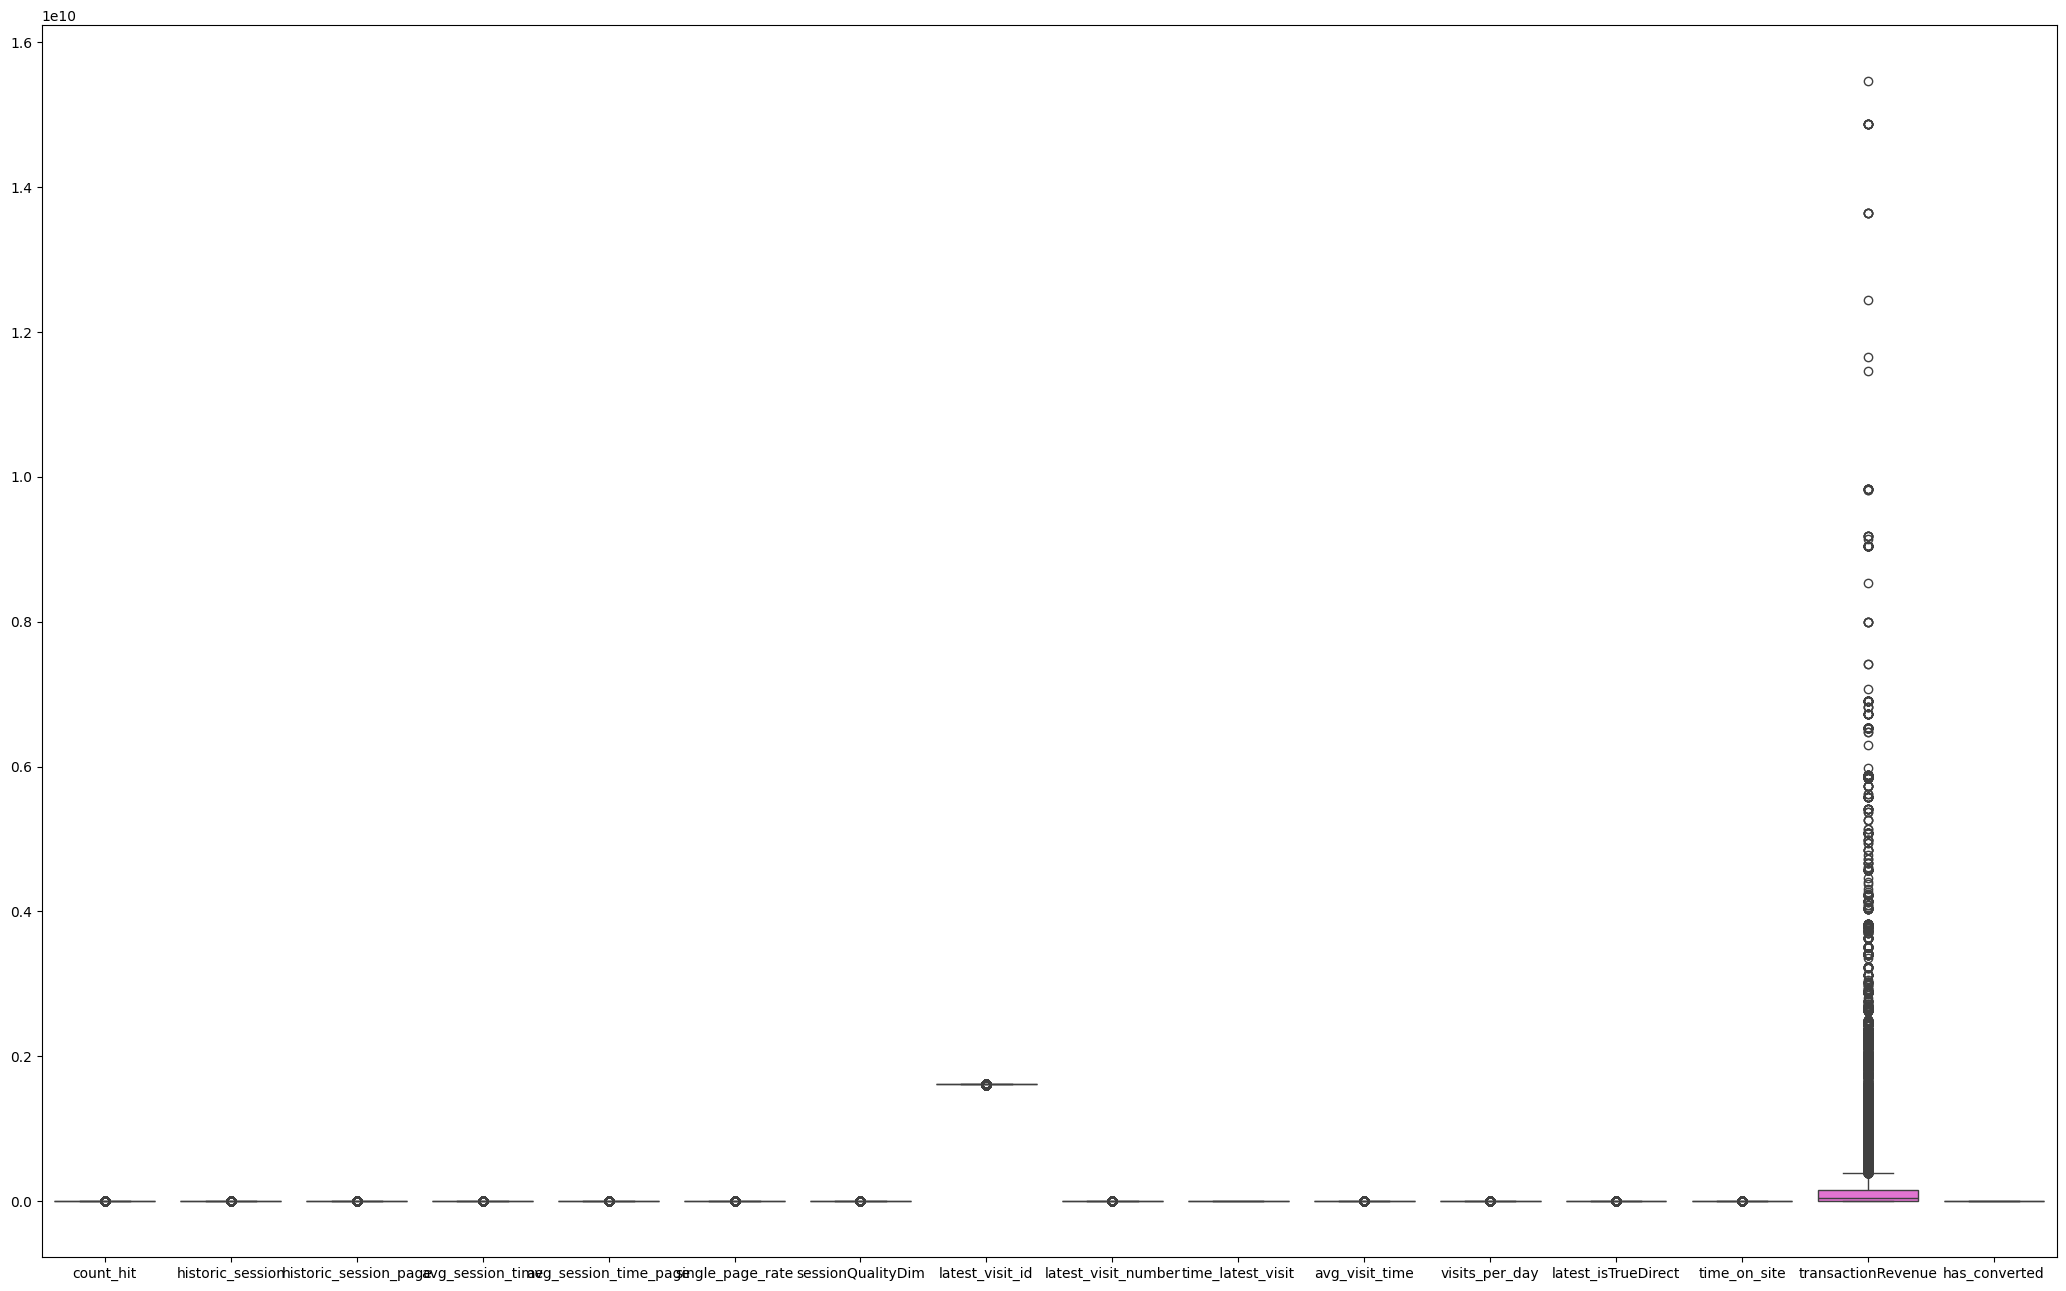

In [17]:
plt.figure(figsize=(26,16))
sns.boxplot(data)

In [18]:
data.columns

Index(['count_hit', 'channelGrouping', 'device_deviceCategory',
       'geoNetwork_region', 'historic_session', 'historic_session_page',
       'avg_session_time', 'avg_session_time_page', 'single_page_rate',
       'sessionQualityDim', 'latest_visit_id', 'latest_visit_number',
       'time_latest_visit', 'avg_visit_time', 'visits_per_day',
       'latest_source', 'latest_keyword', 'latest_isTrueDirect',
       'time_on_site', 'transactionRevenue', 'products_array',
       'has_converted'],
      dtype='object')

In [19]:
# Here I have used Lable encoding methos to convert categorical data into numerical
from sklearn.preprocessing import LabelEncoder 
LE = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.Categorical(data[column]).codes

In [20]:
data.dtypes

count_hit                  int64
channelGrouping             int8
device_deviceCategory       int8
geoNetwork_region           int8
historic_session           int64
historic_session_page      int64
avg_session_time         float64
avg_session_time_page    float64
single_page_rate         float64
sessionQualityDim          int64
latest_visit_id            int64
latest_visit_number        int64
time_latest_visit        float64
avg_visit_time             int64
visits_per_day           float64
latest_source               int8
latest_keyword             int16
latest_isTrueDirect         bool
time_on_site               int64
transactionRevenue         int64
products_array             int16
has_converted              int64
dtype: object

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   count_hit              100000 non-null  int64  
 1   channelGrouping        100000 non-null  int8   
 2   device_deviceCategory  100000 non-null  int8   
 3   geoNetwork_region      100000 non-null  int8   
 4   historic_session       100000 non-null  int64  
 5   historic_session_page  100000 non-null  int64  
 6   avg_session_time       100000 non-null  float64
 7   avg_session_time_page  100000 non-null  float64
 8   single_page_rate       100000 non-null  float64
 9   sessionQualityDim      100000 non-null  int64  
 10  latest_visit_id        100000 non-null  int64  
 11  latest_visit_number    100000 non-null  int64  
 12  time_latest_visit      100000 non-null  float64
 13  avg_visit_time         100000 non-null  int64  
 14  visits_per_day         100000 non-nul

In [22]:
# So once completing all the categorical data to numeric we are checking the outliers in data visualation
def plot(data, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=data, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=data, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

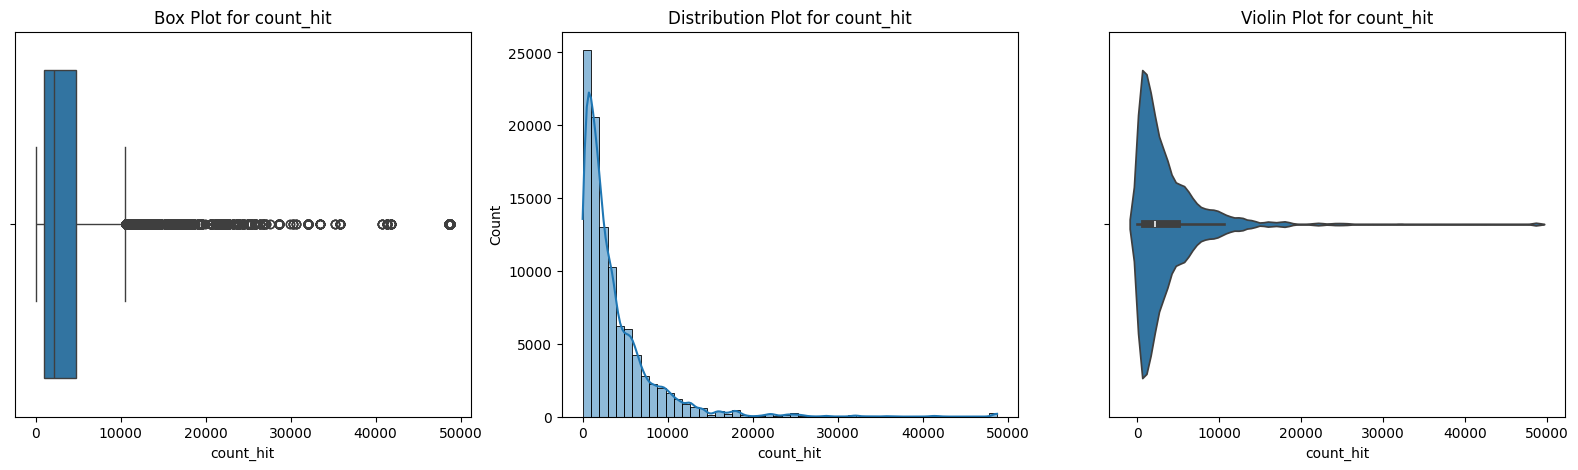

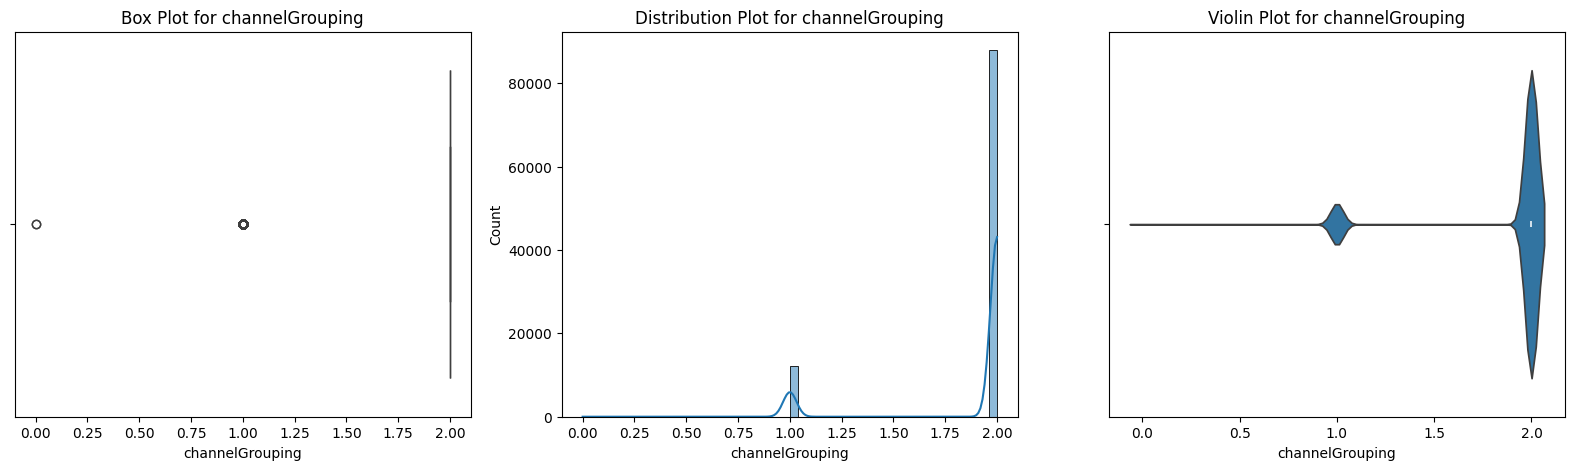

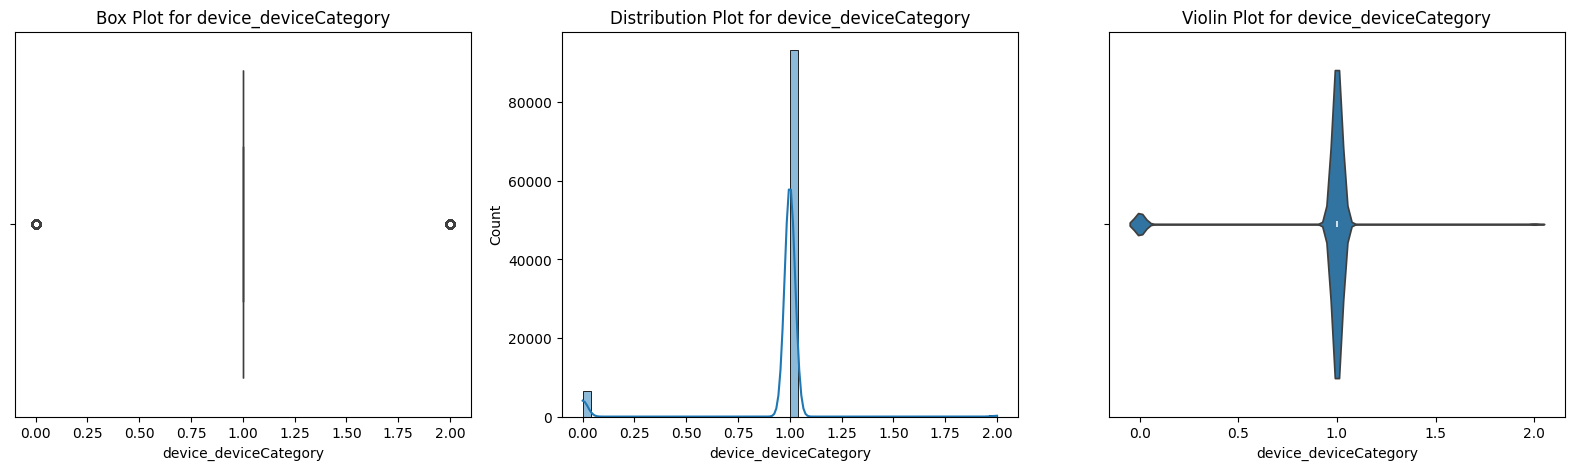

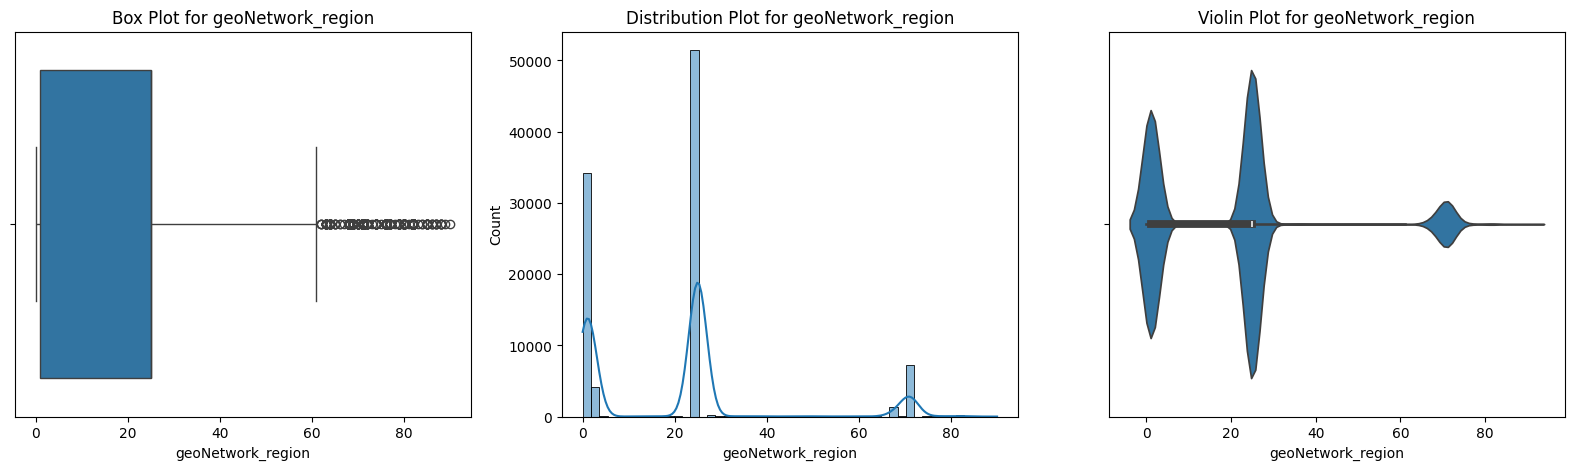

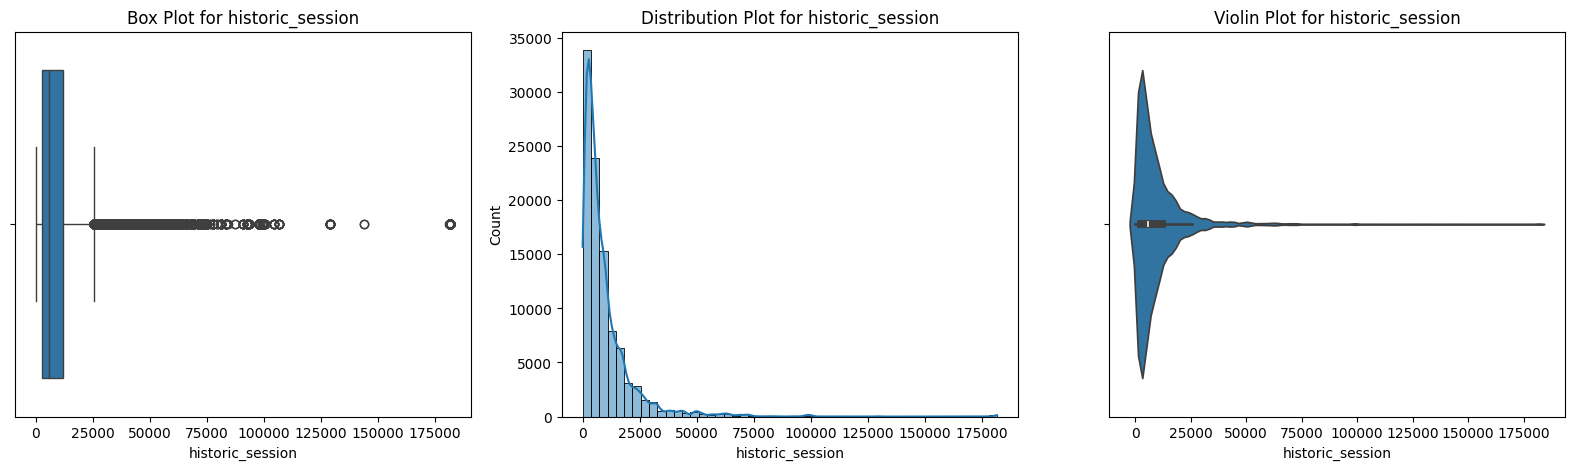

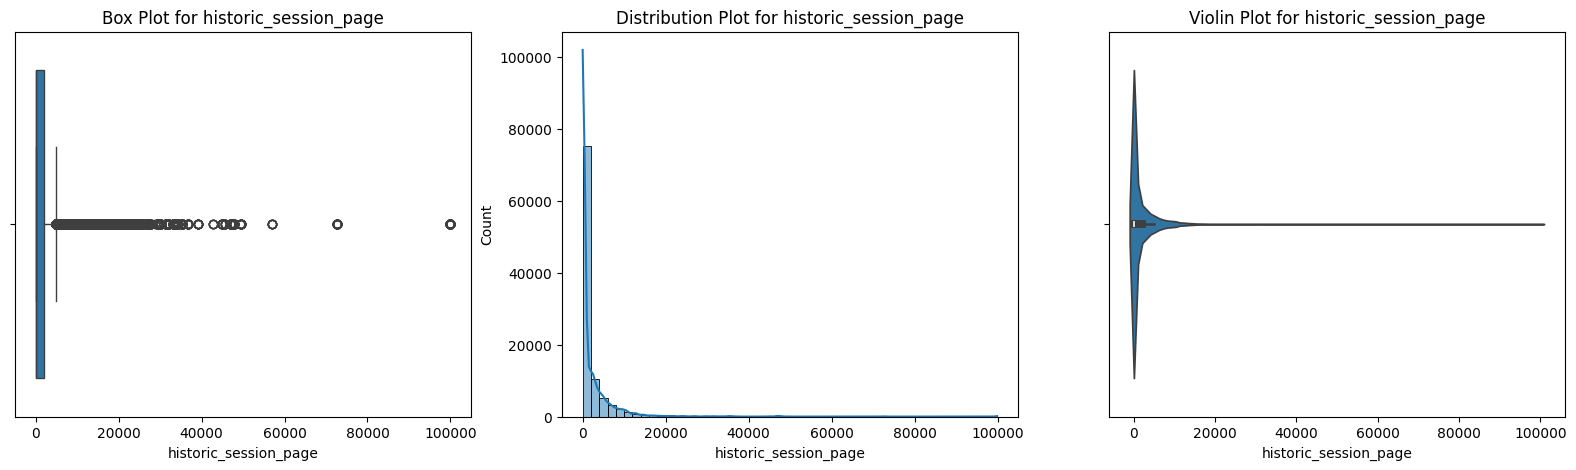

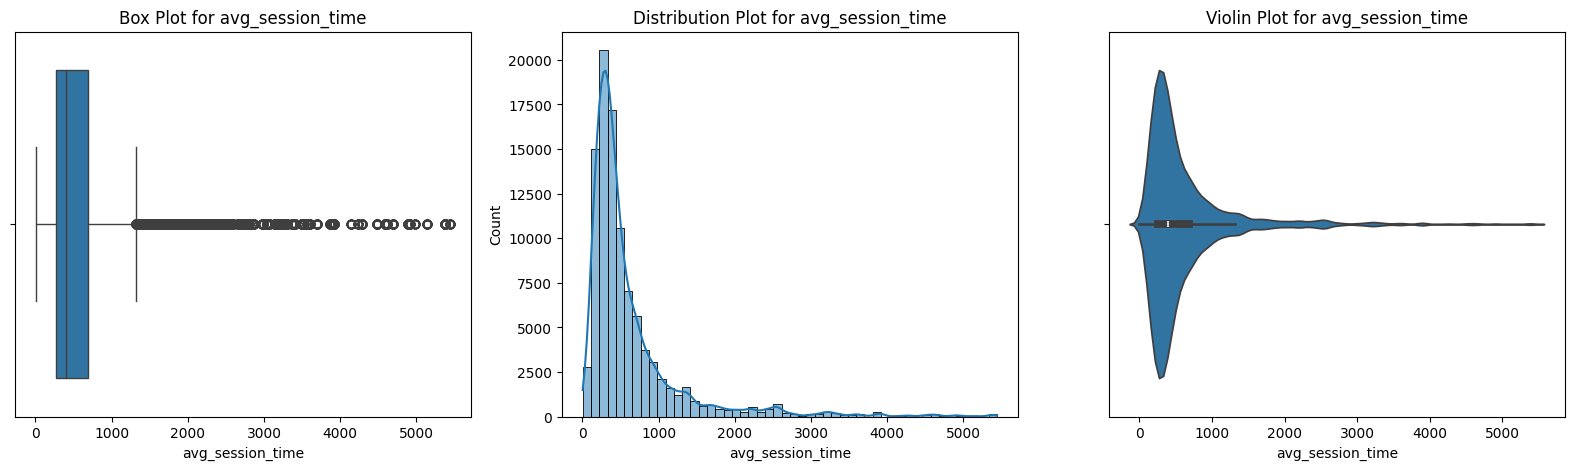

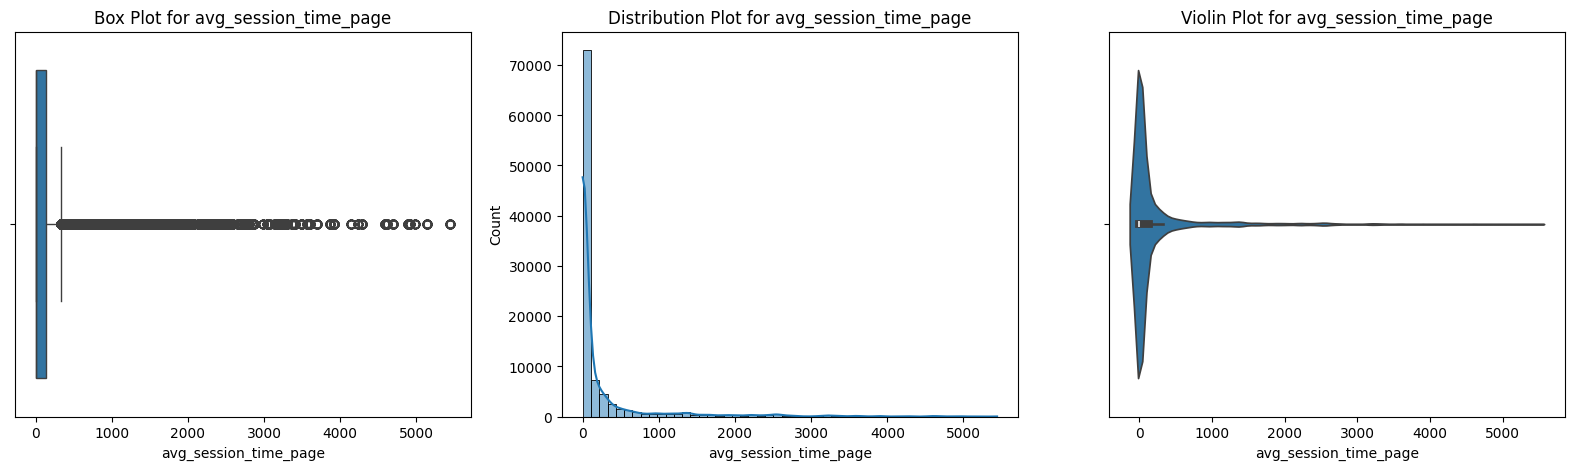

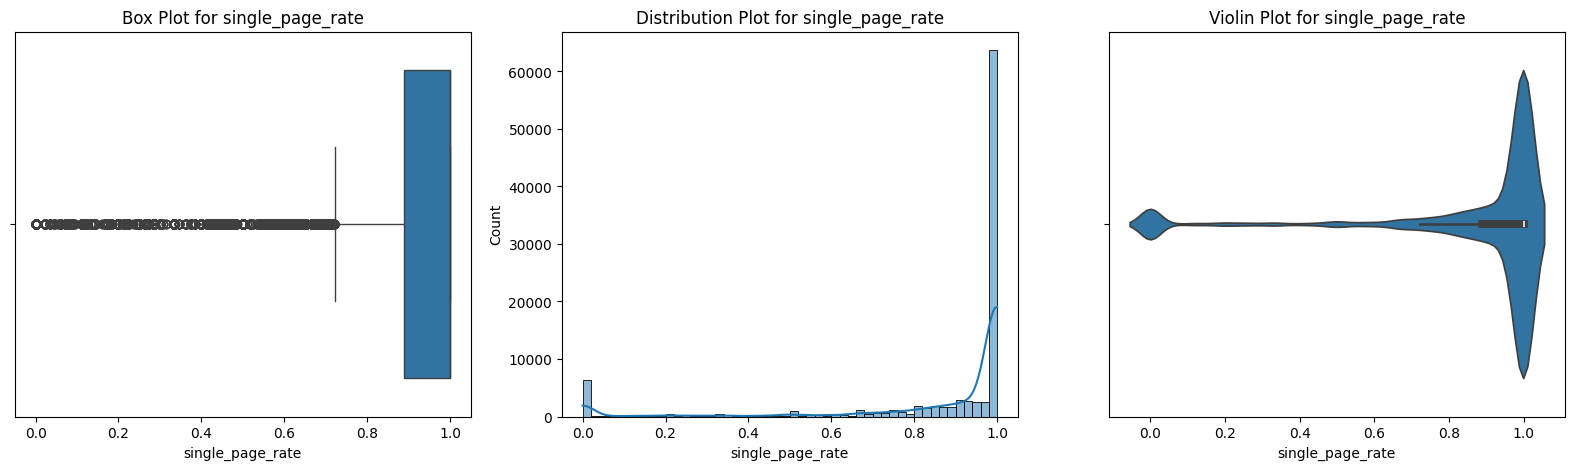

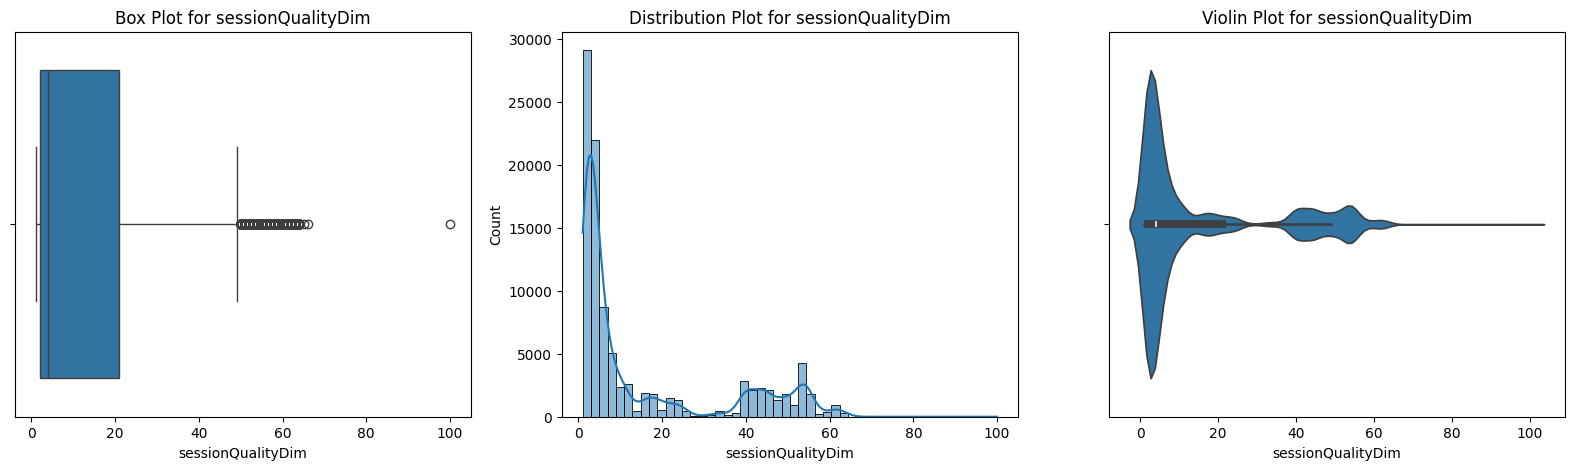

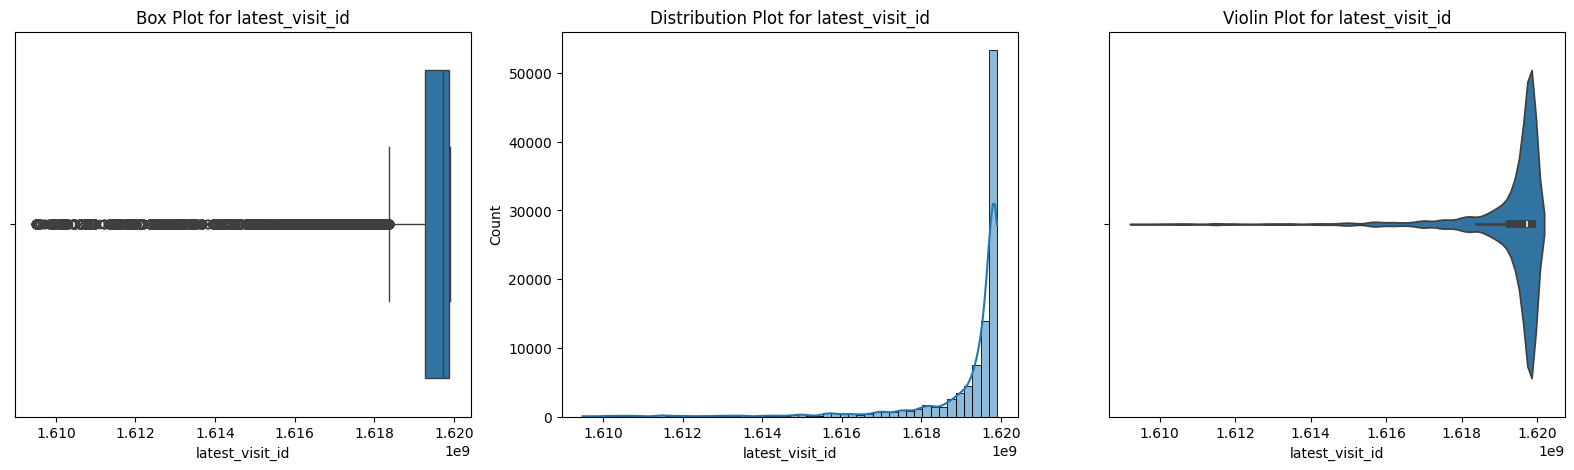

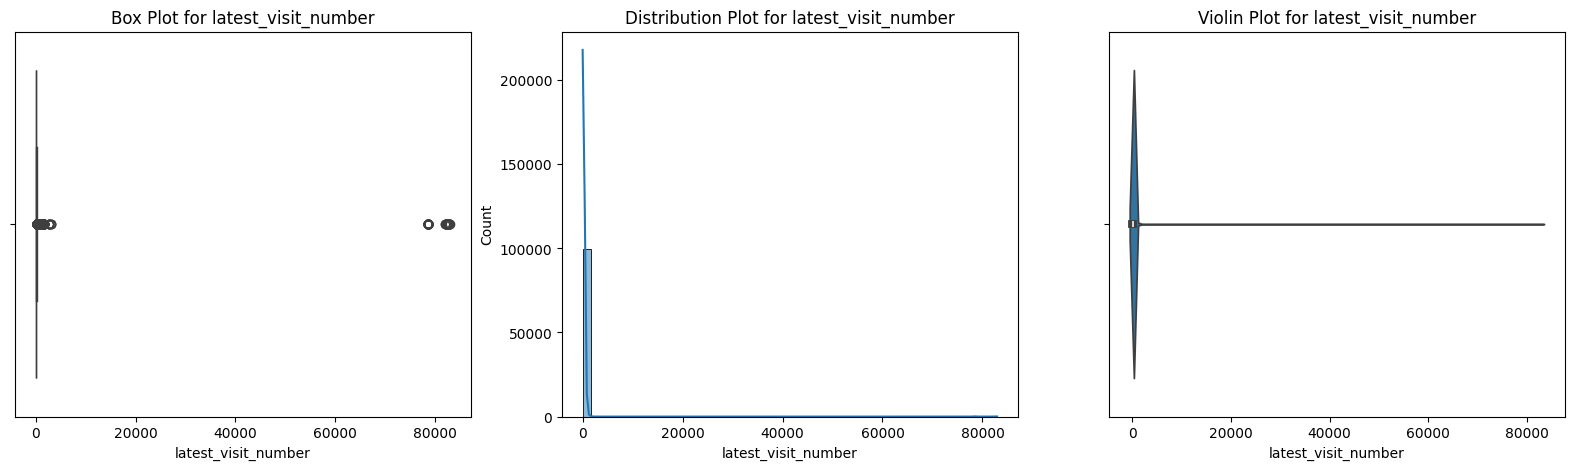

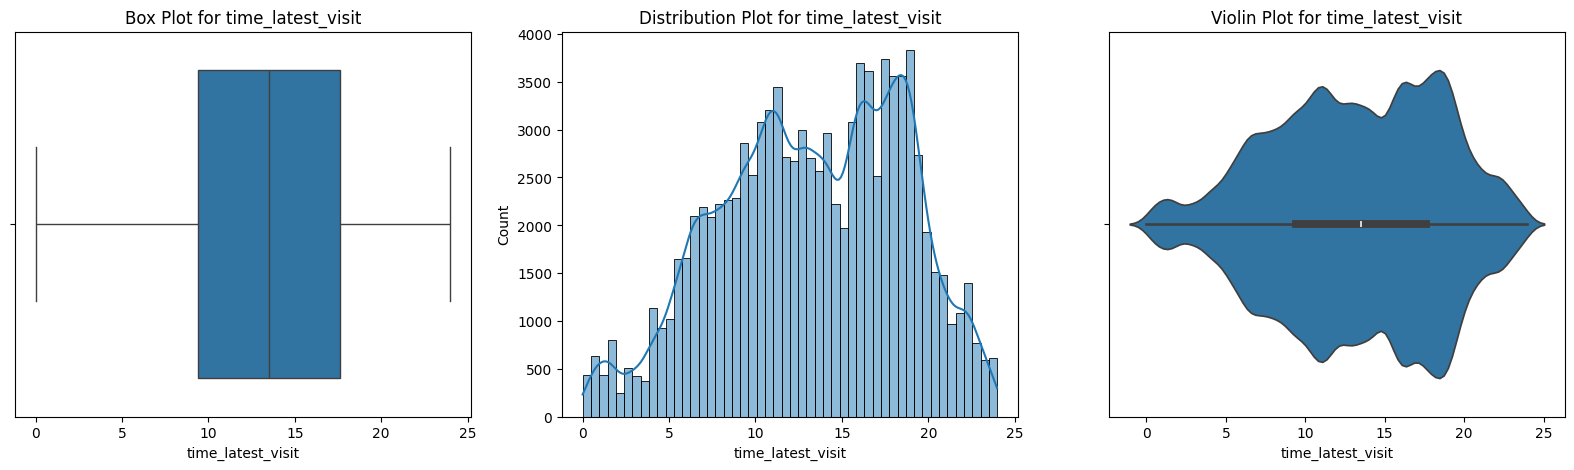

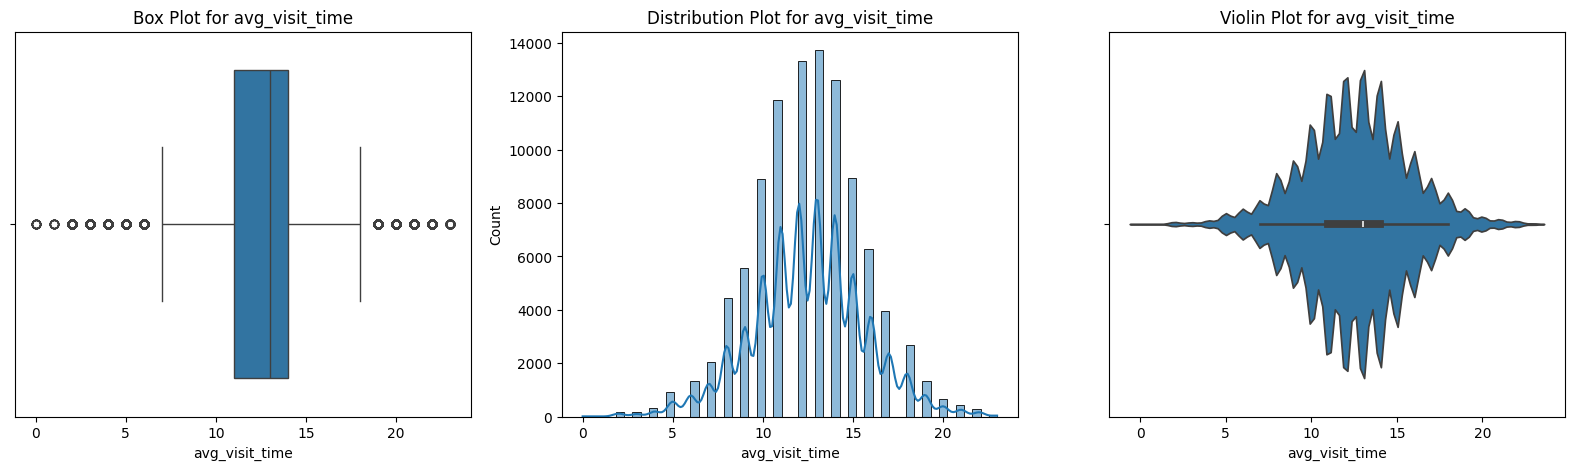

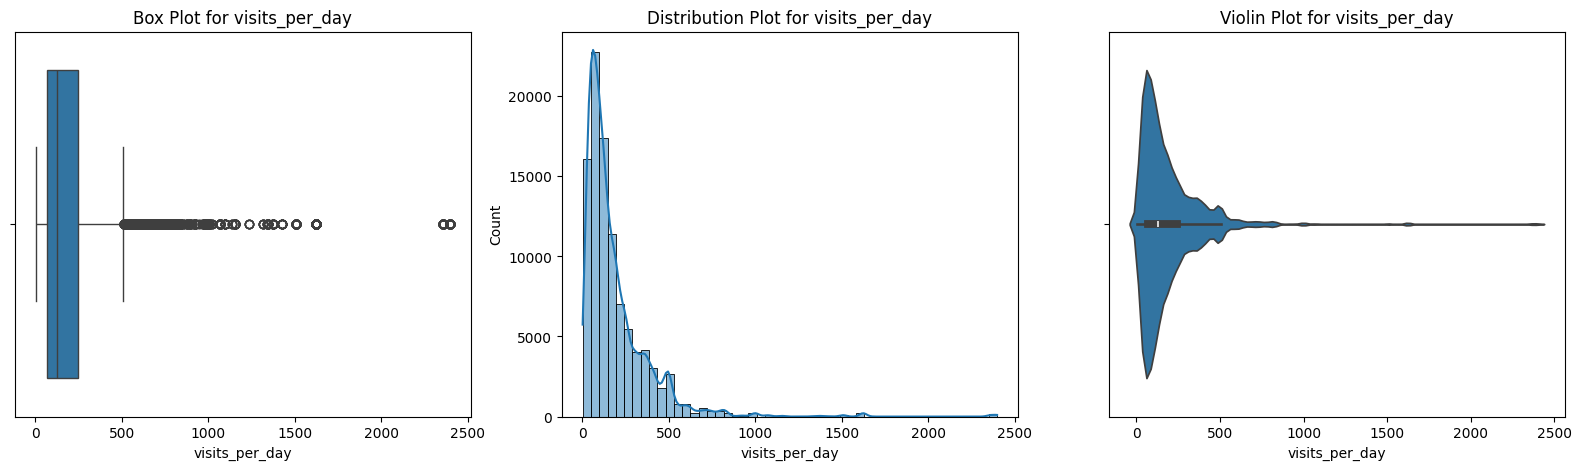

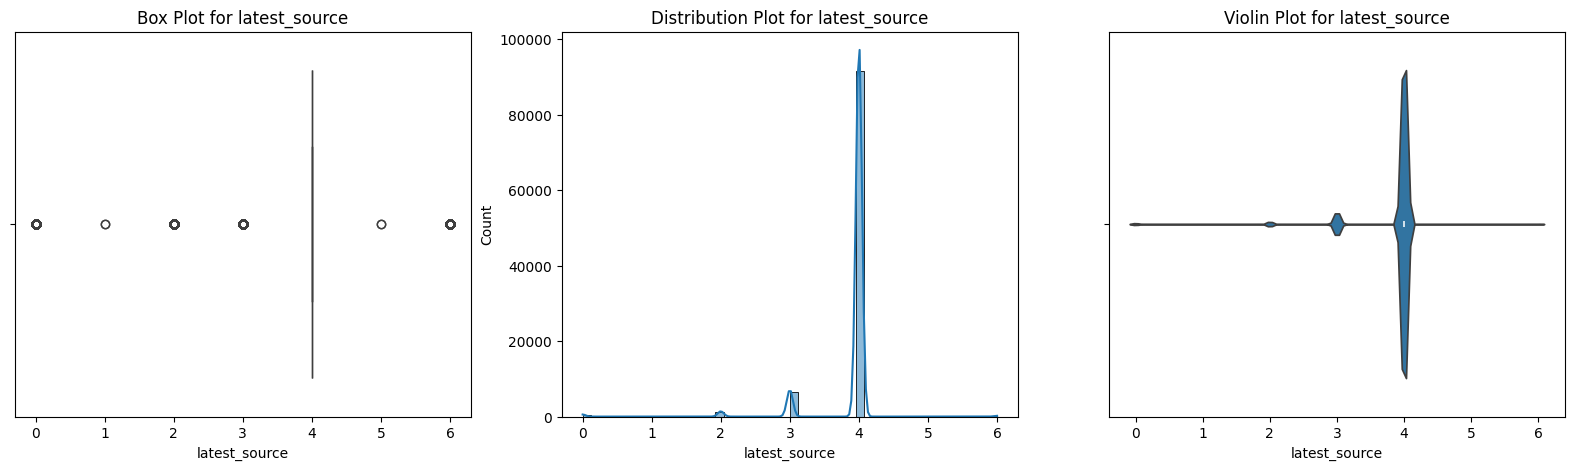

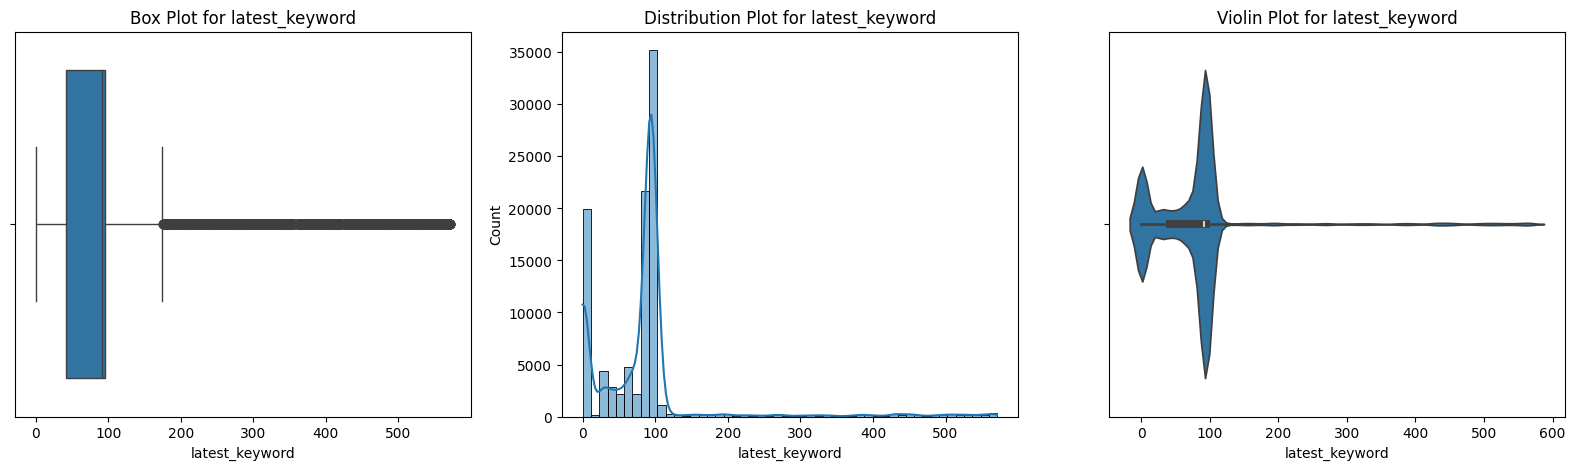

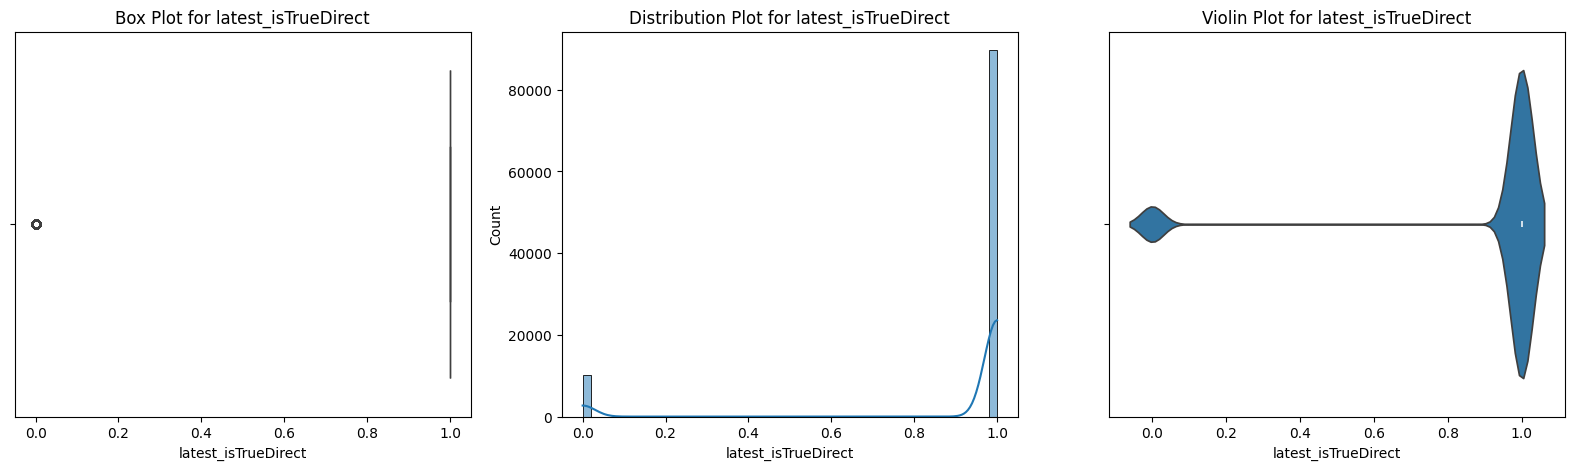

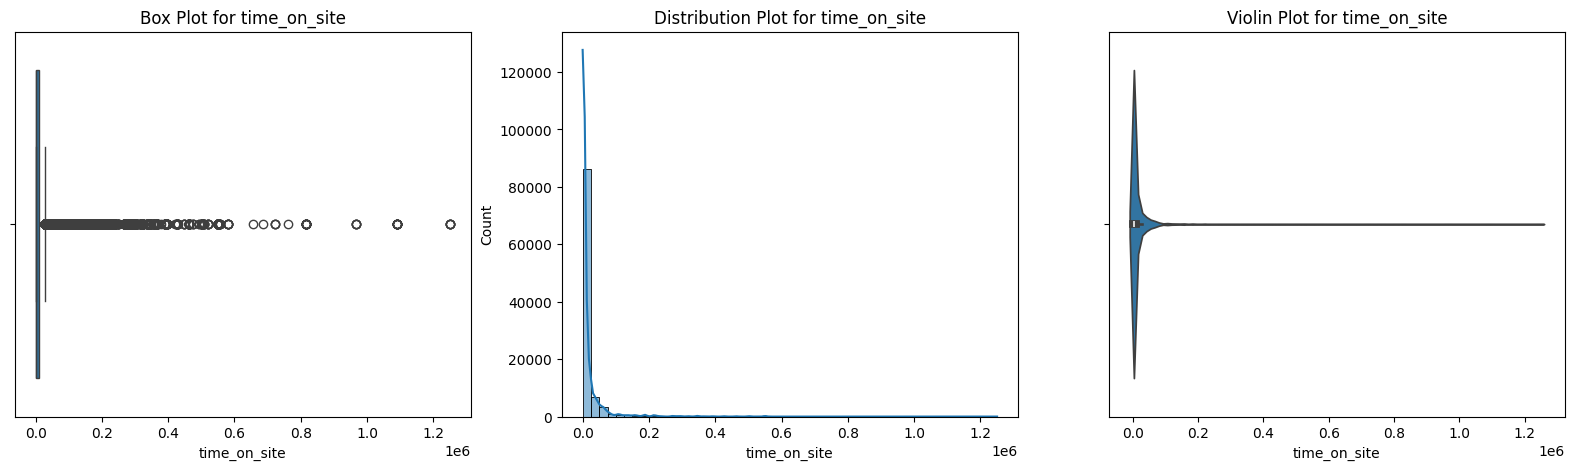

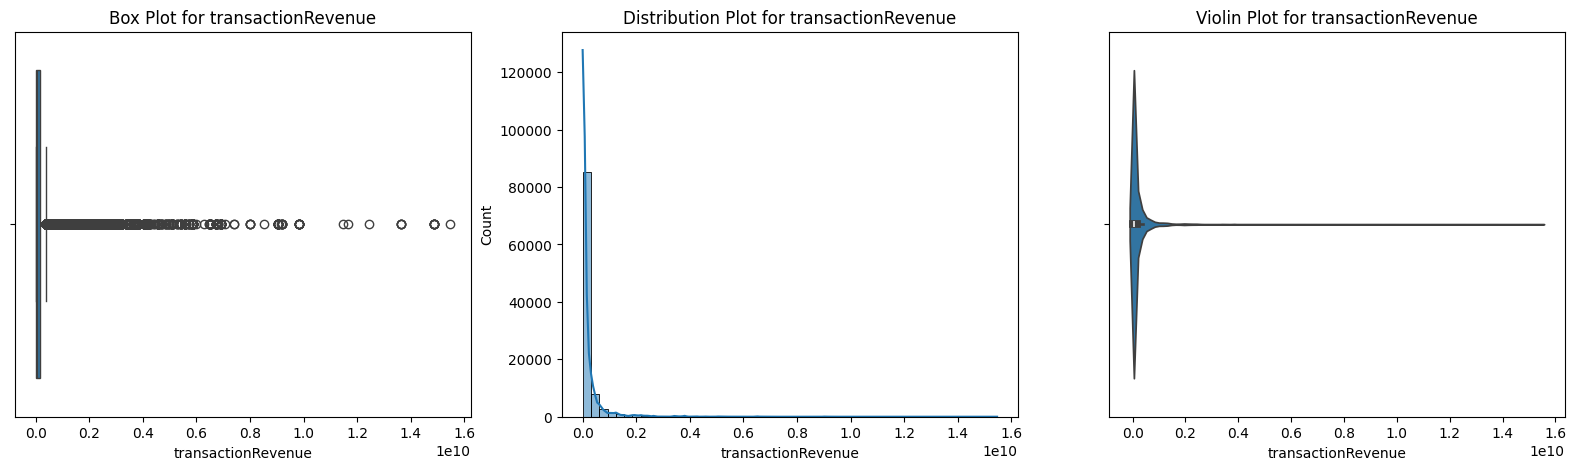

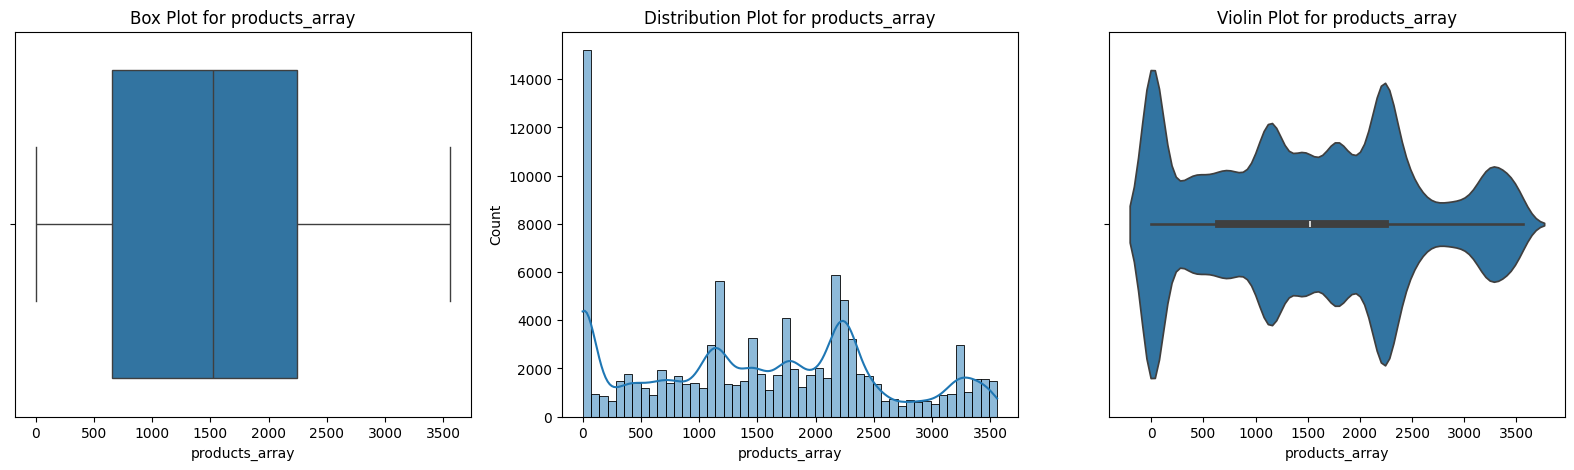

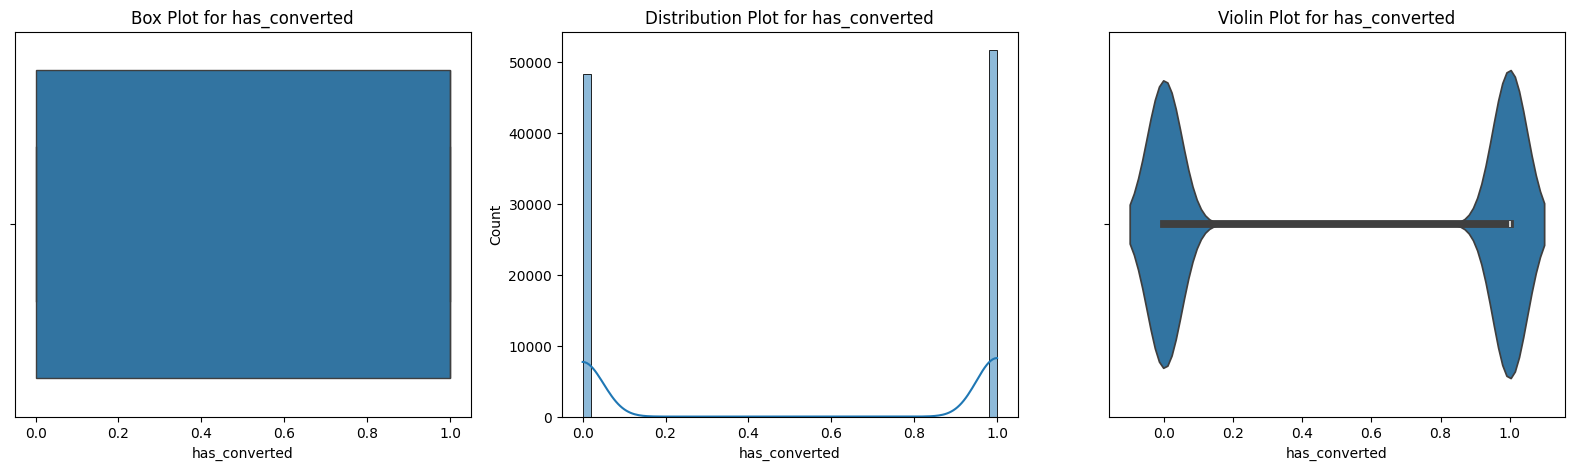

In [23]:
for i in ['count_hit', 'channelGrouping', 
        'device_deviceCategory', 'geoNetwork_region',
       'historic_session', 'historic_session_page', 'avg_session_time',
       'avg_session_time_page', 'single_page_rate', 'sessionQualityDim',
       'latest_visit_id', 'latest_visit_number', 'time_latest_visit',
       'avg_visit_time', 'visits_per_day', 'latest_source',
       'latest_keyword', 'latest_isTrueDirect',
       'time_on_site', 'transactionRevenue', 'products_array',
       'has_converted']:
    plot(data, i)


In [24]:
data.columns

Index(['count_hit', 'channelGrouping', 'device_deviceCategory',
       'geoNetwork_region', 'historic_session', 'historic_session_page',
       'avg_session_time', 'avg_session_time_page', 'single_page_rate',
       'sessionQualityDim', 'latest_visit_id', 'latest_visit_number',
       'time_latest_visit', 'avg_visit_time', 'visits_per_day',
       'latest_source', 'latest_keyword', 'latest_isTrueDirect',
       'time_on_site', 'transactionRevenue', 'products_array',
       'has_converted'],
      dtype='object')

In [25]:
# I used Log Transformation method to treat outlayers but the result was not good, so I tried different methods below
import numpy as np

data['channelGrouping'] = np.log1p(data['channelGrouping'])
data['device_deviceCategory'] = np.log1p(data['device_deviceCategory'])
data['geoNetwork_region'] = np.log1p(data['geoNetwork_region'])
data['historic_session_page'] = np.log1p(data['historic_session_page'])
data['avg_session_time_page'] = np.log1p(data['avg_session_time_page'])
data['single_page_rate'] = np.log1p(data['single_page_rate'])
data['sessionQualityDim'] = np.log1p(data['sessionQualityDim'])
data['latest_visit_number'] = np.log1p(data['latest_visit_number'])
data['avg_visit_time'] = np.log1p(data['avg_visit_time'])
data['latest_source'] = np.log1p(data['latest_source'])


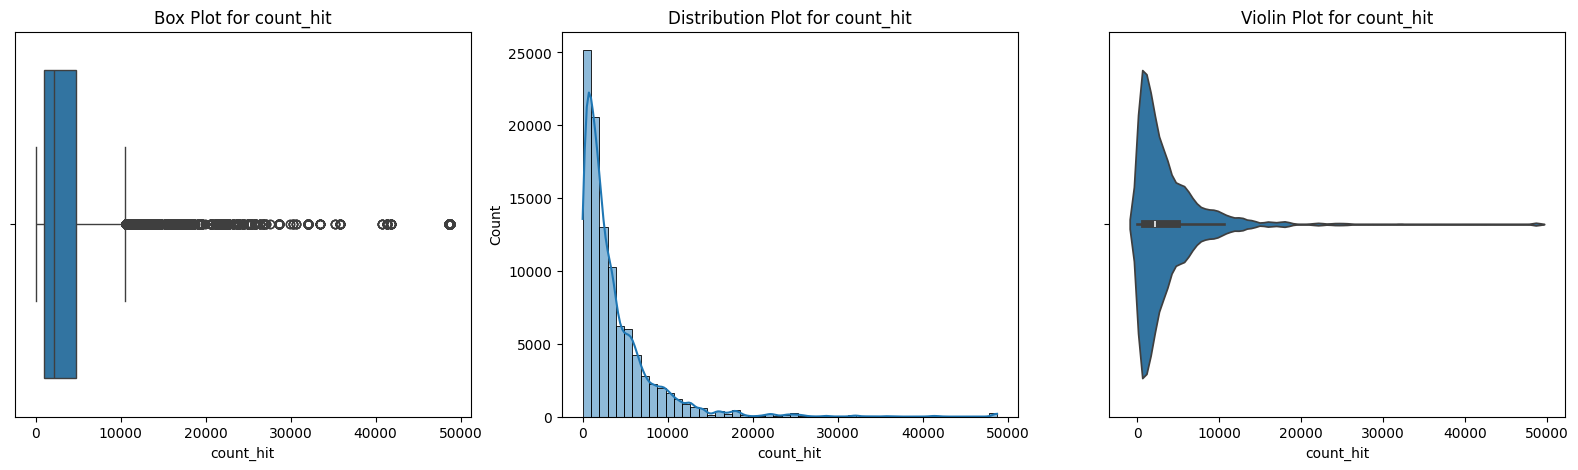

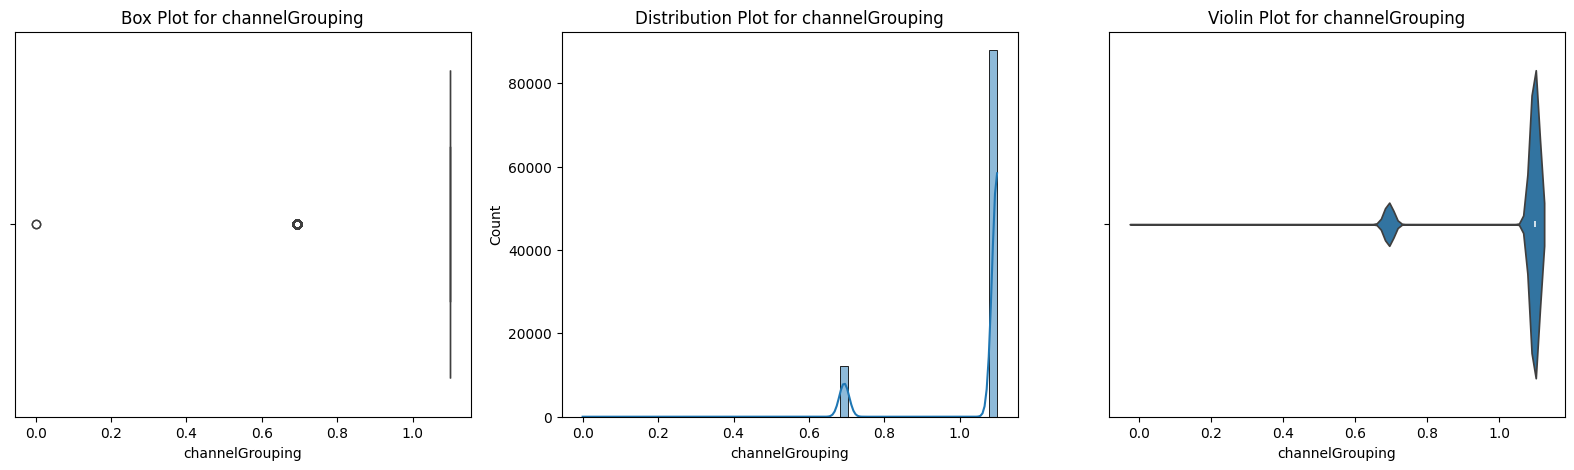

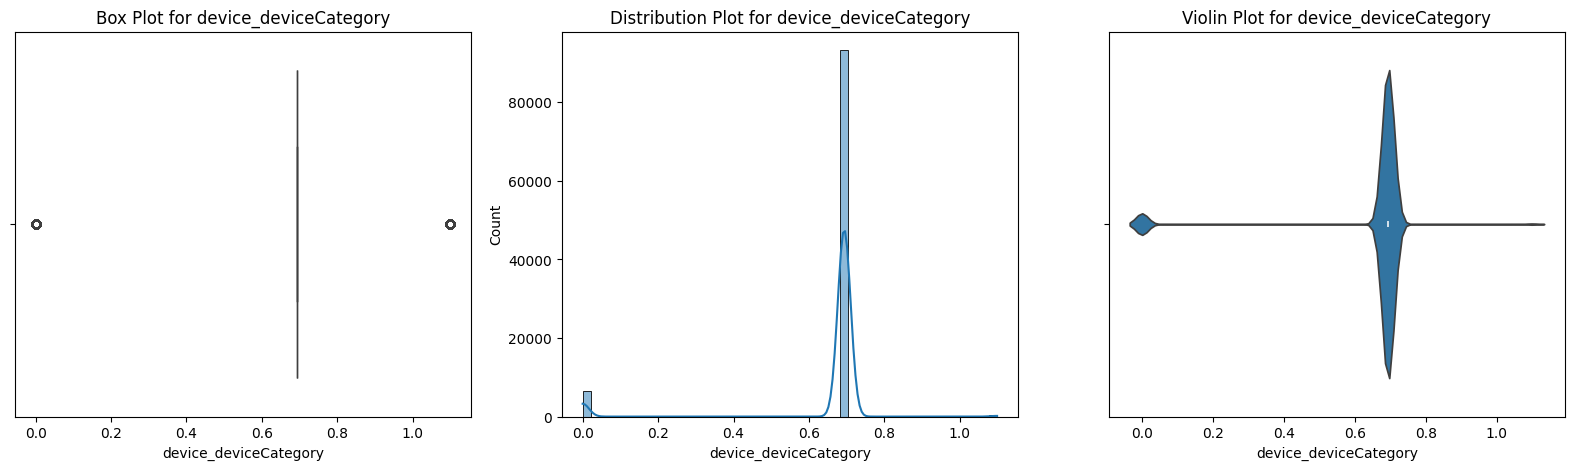

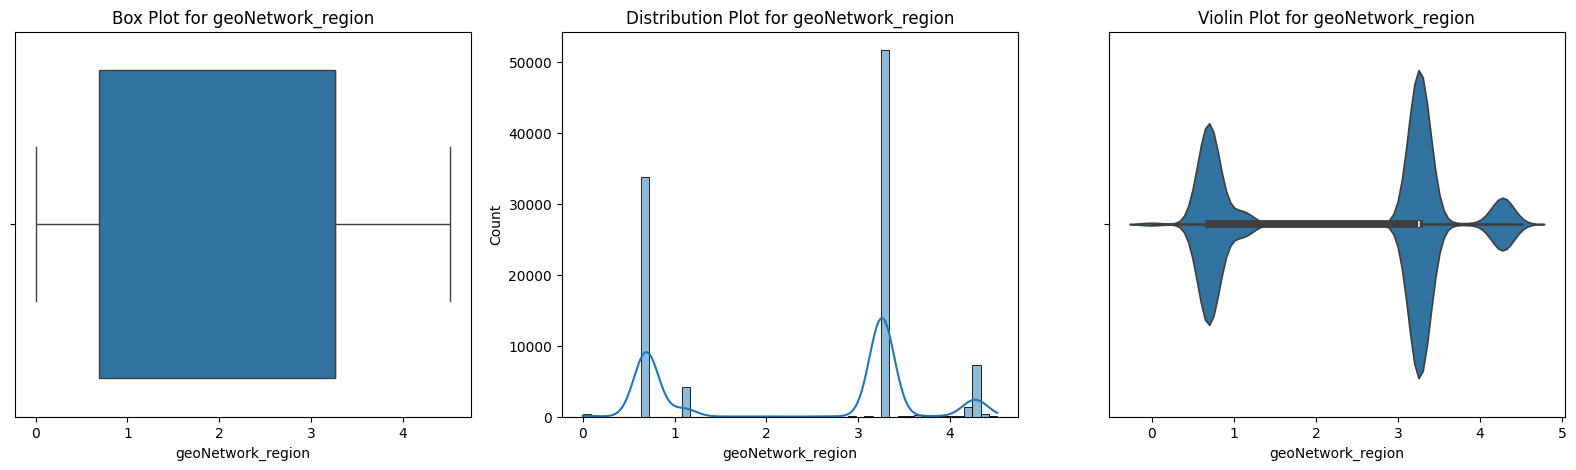

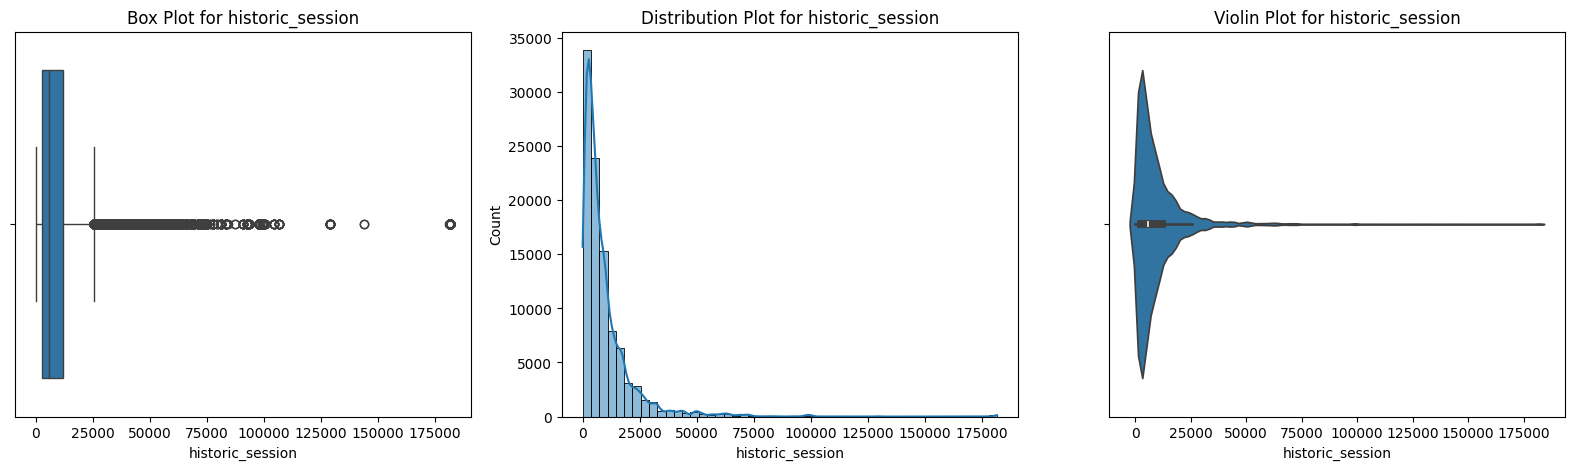

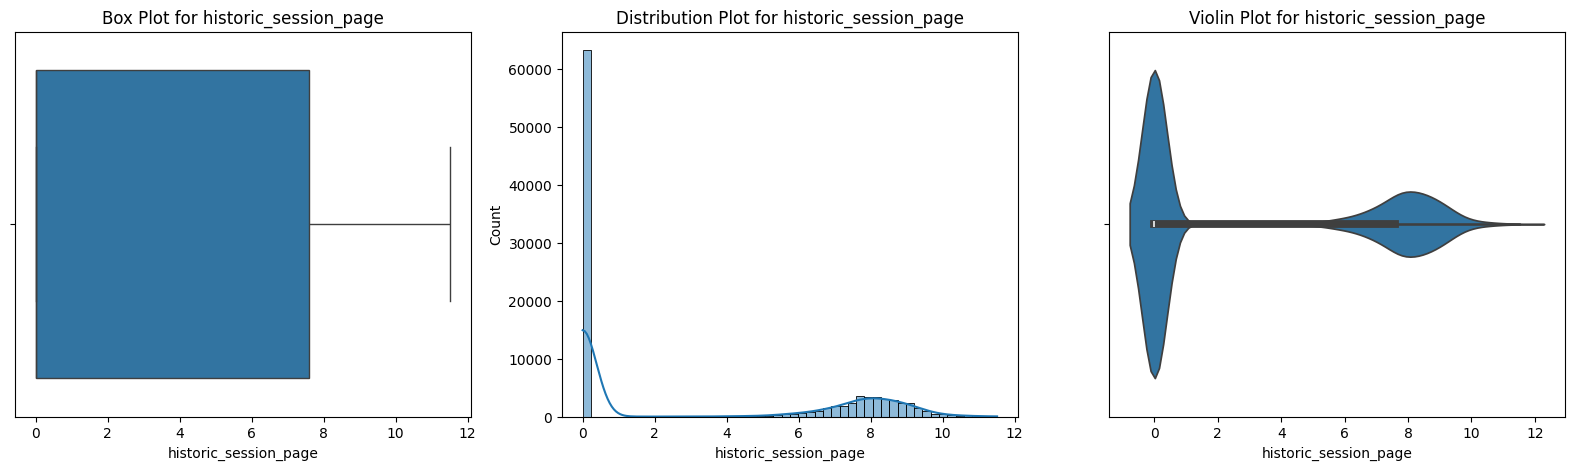

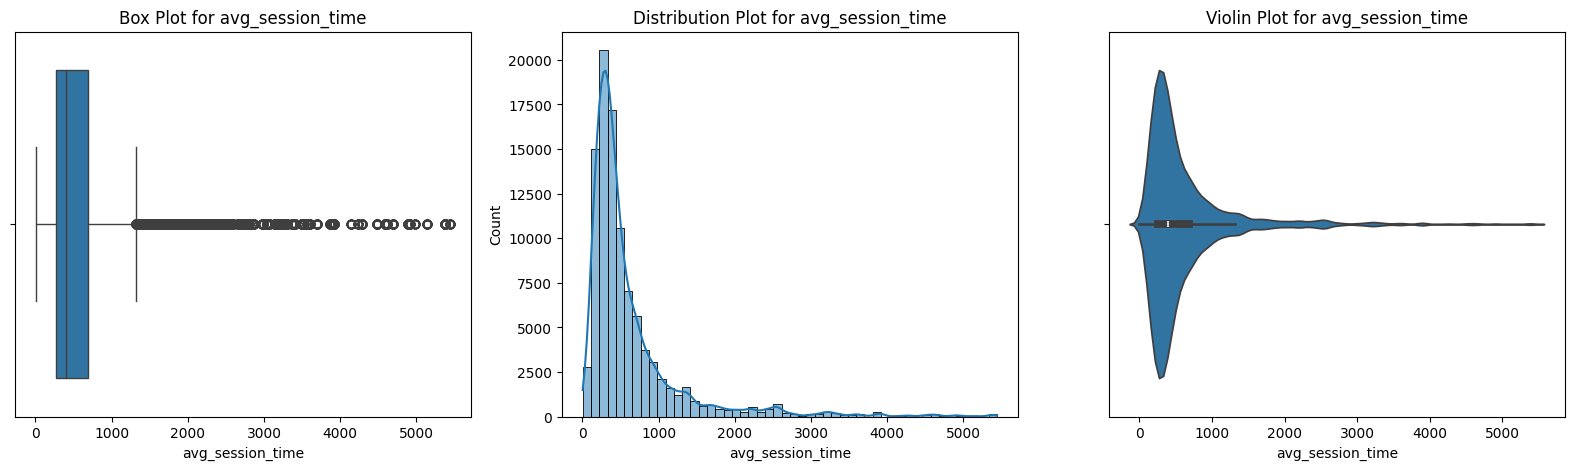

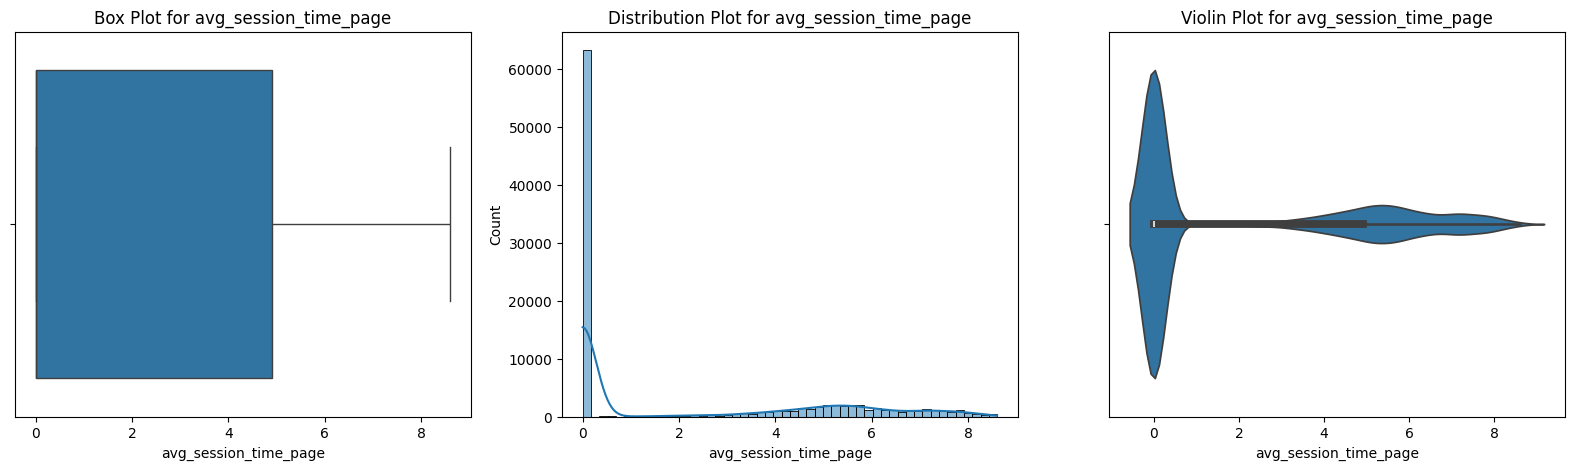

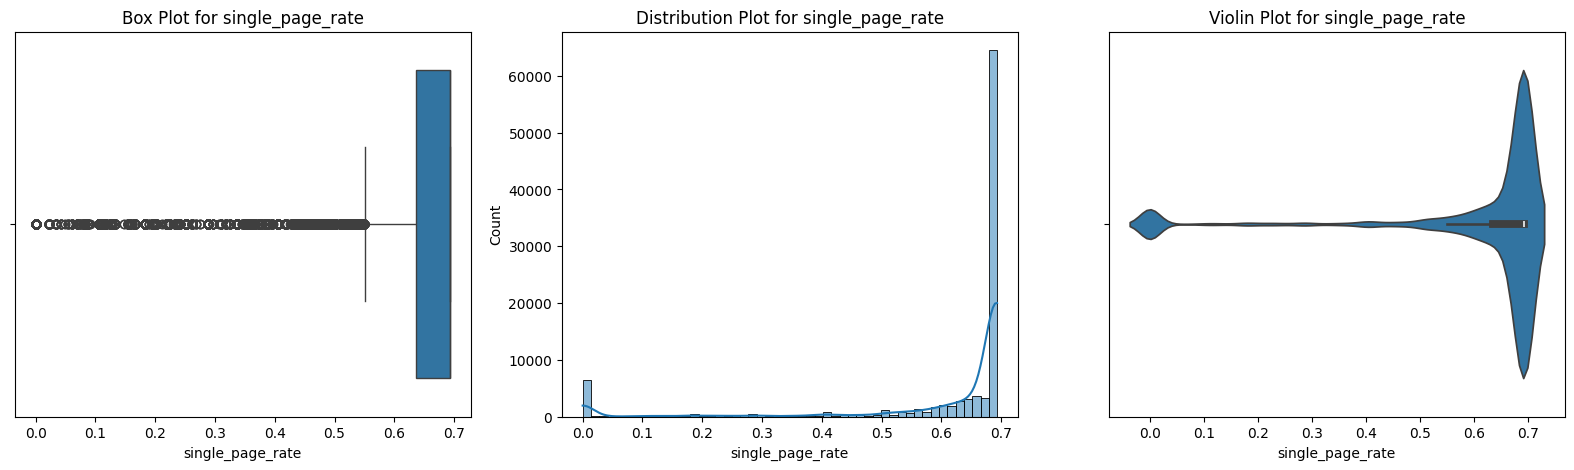

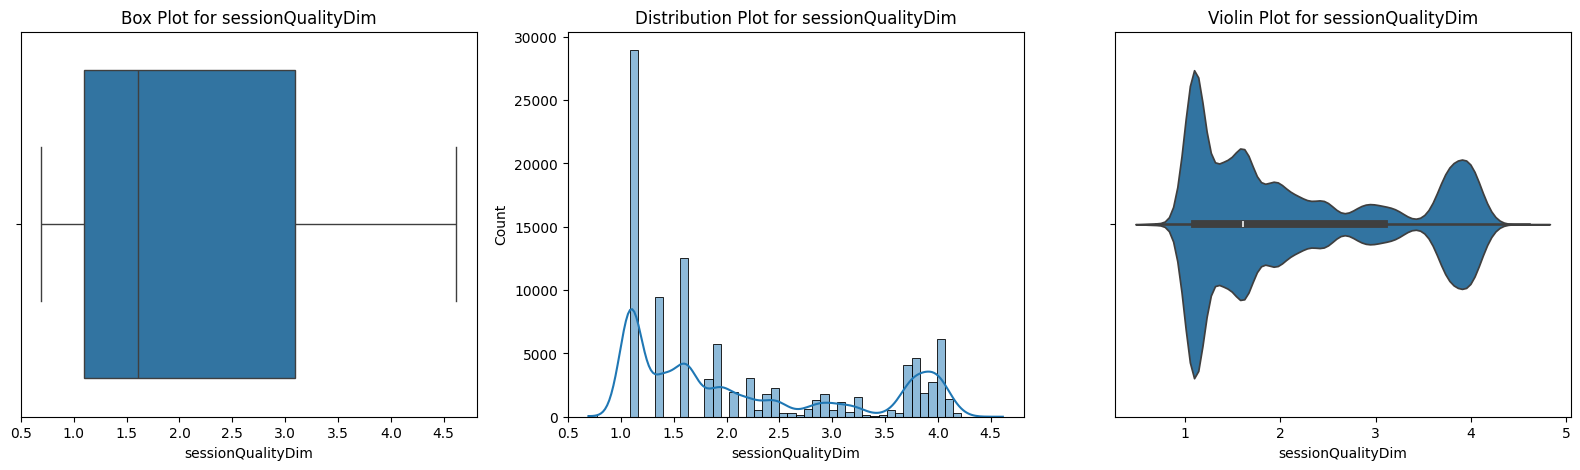

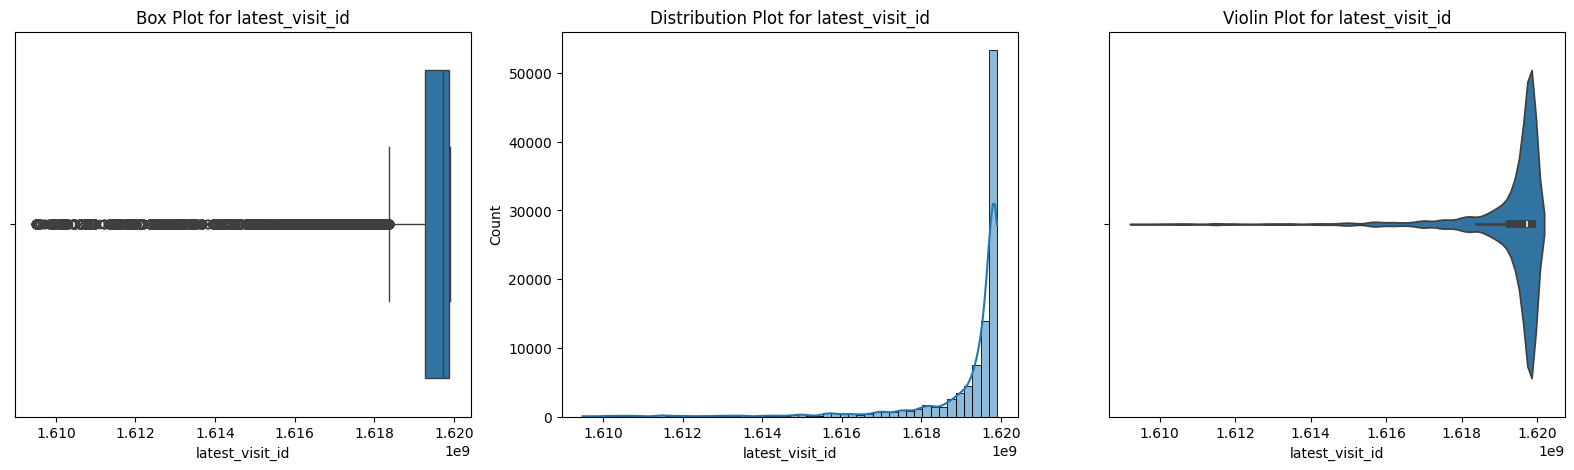

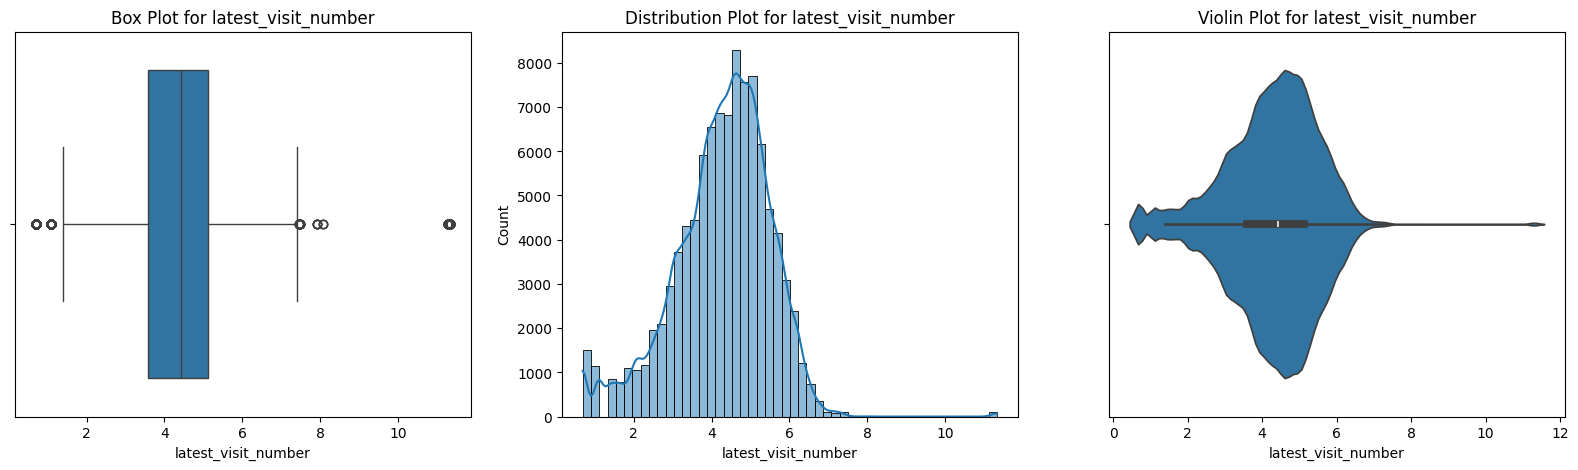

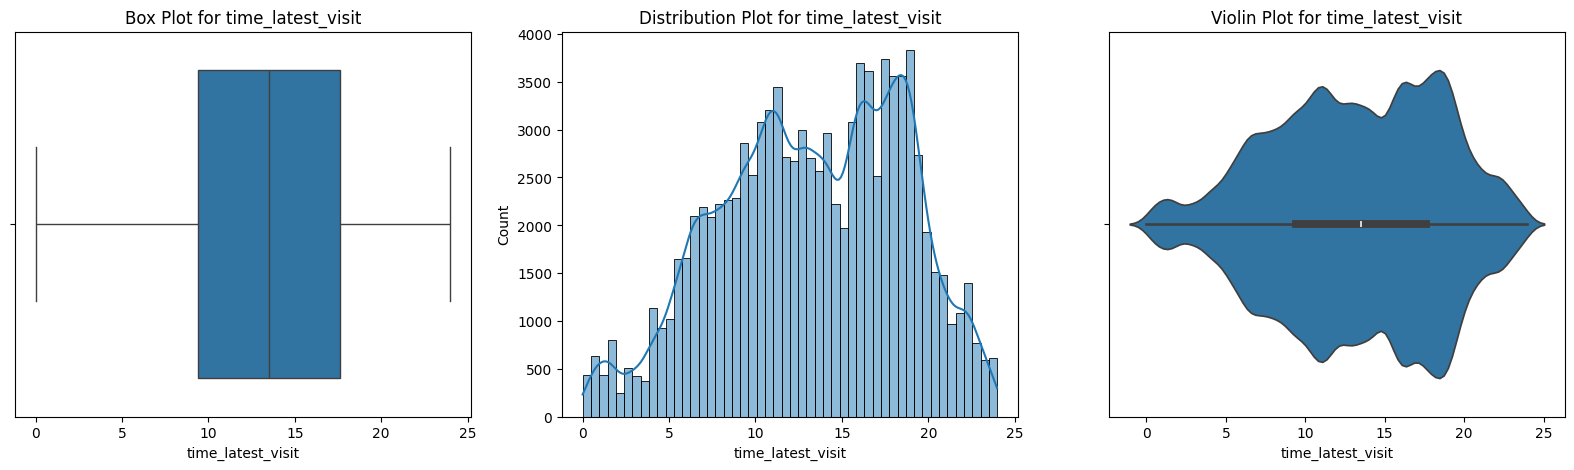

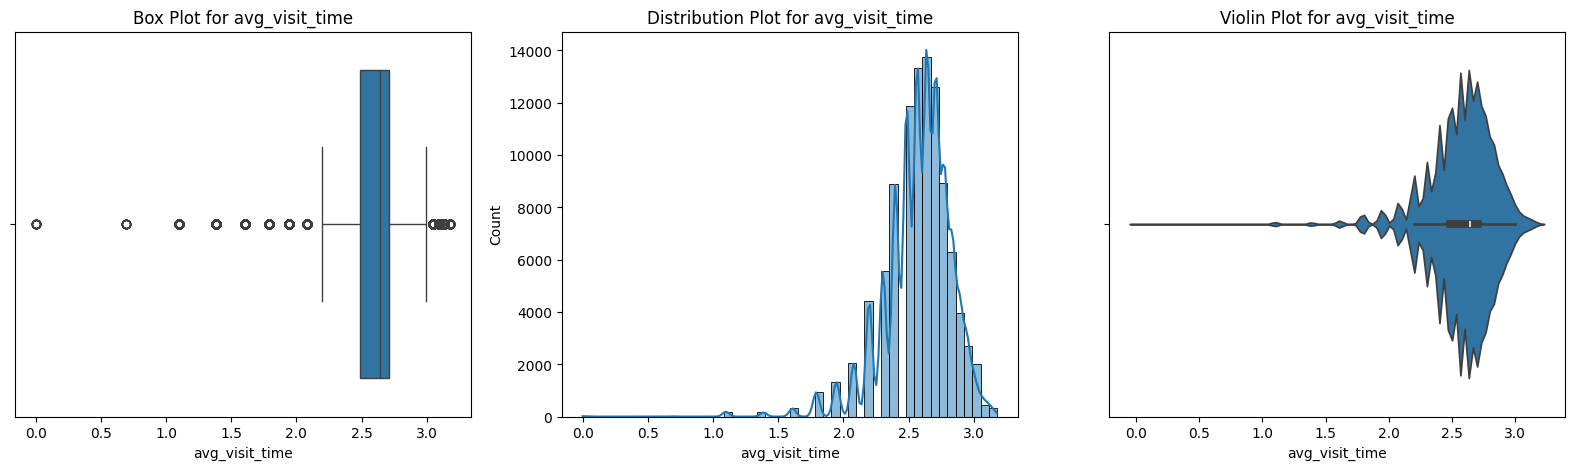

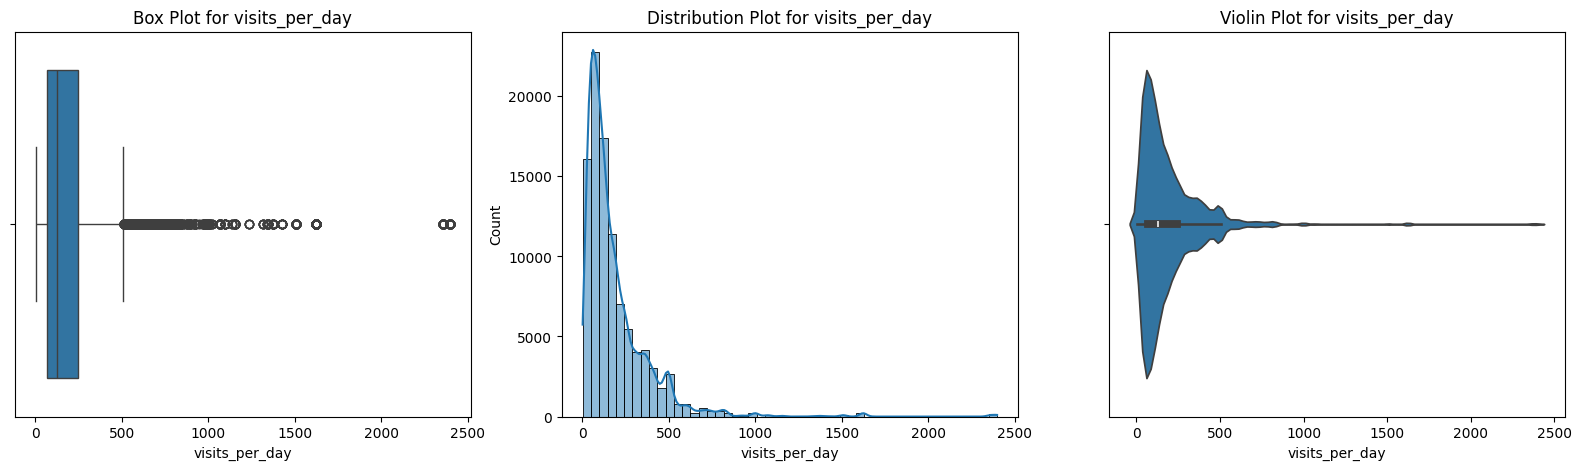

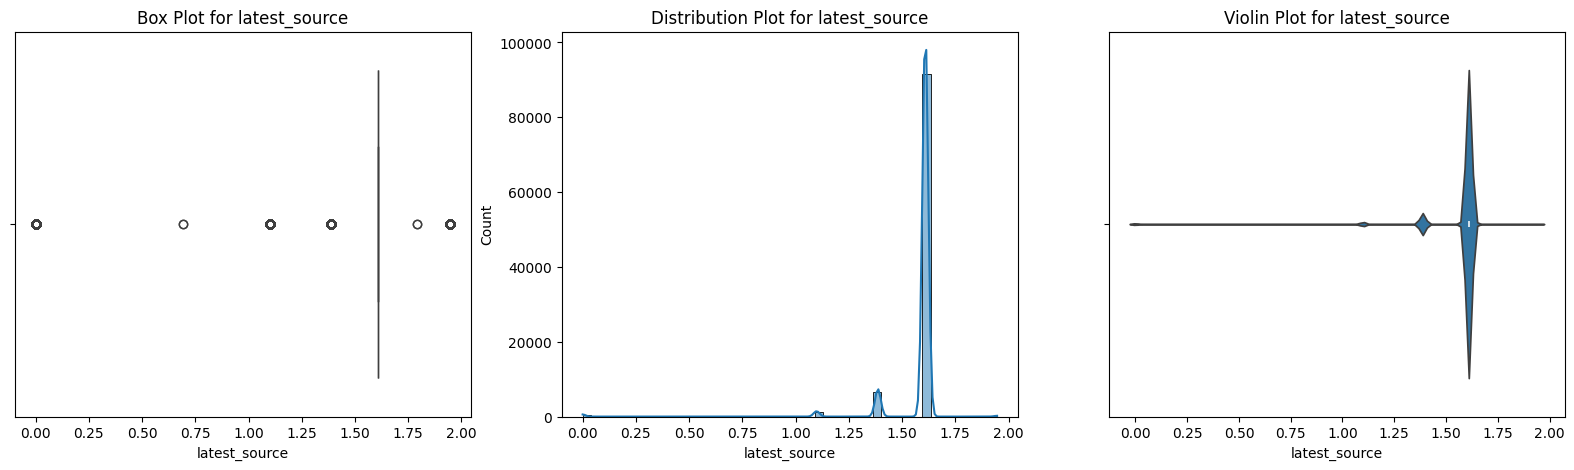

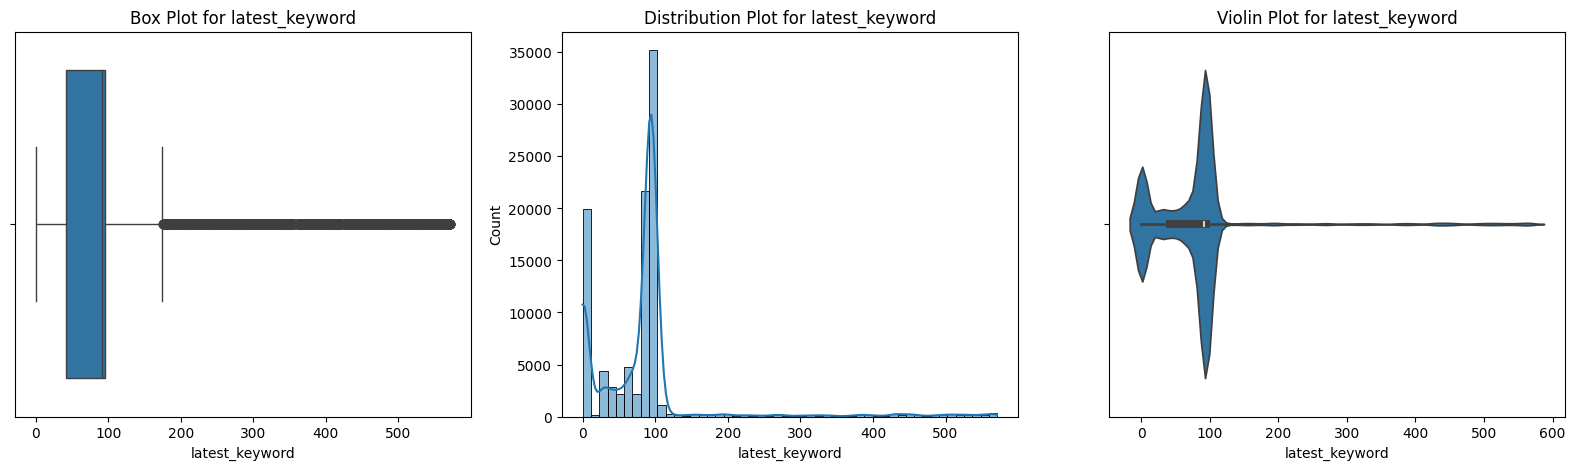

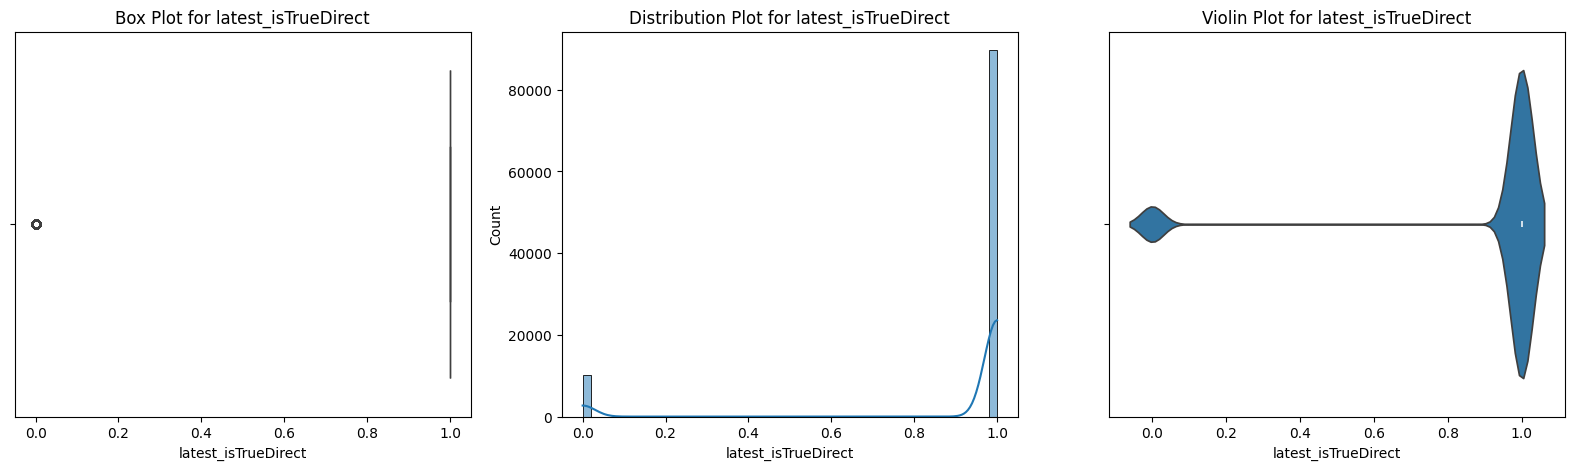

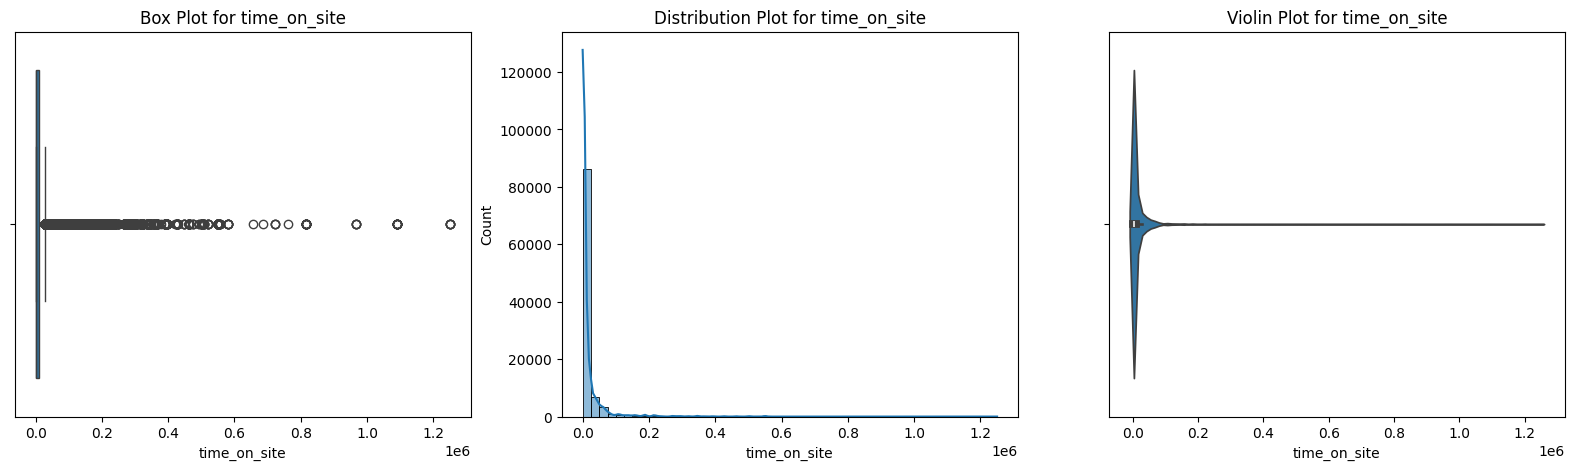

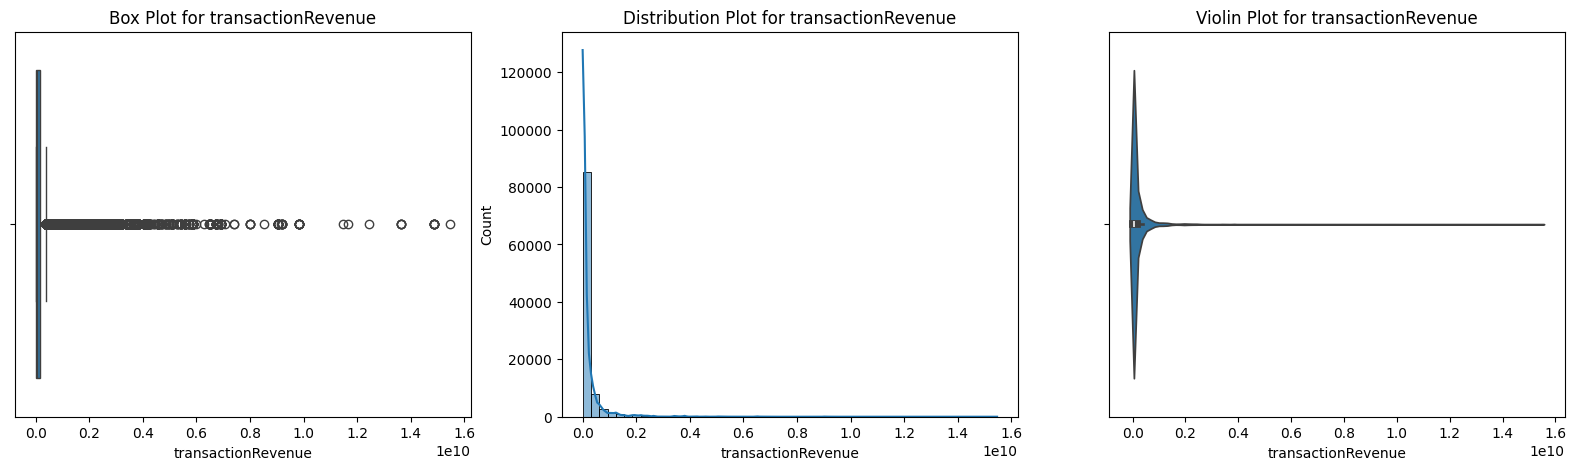

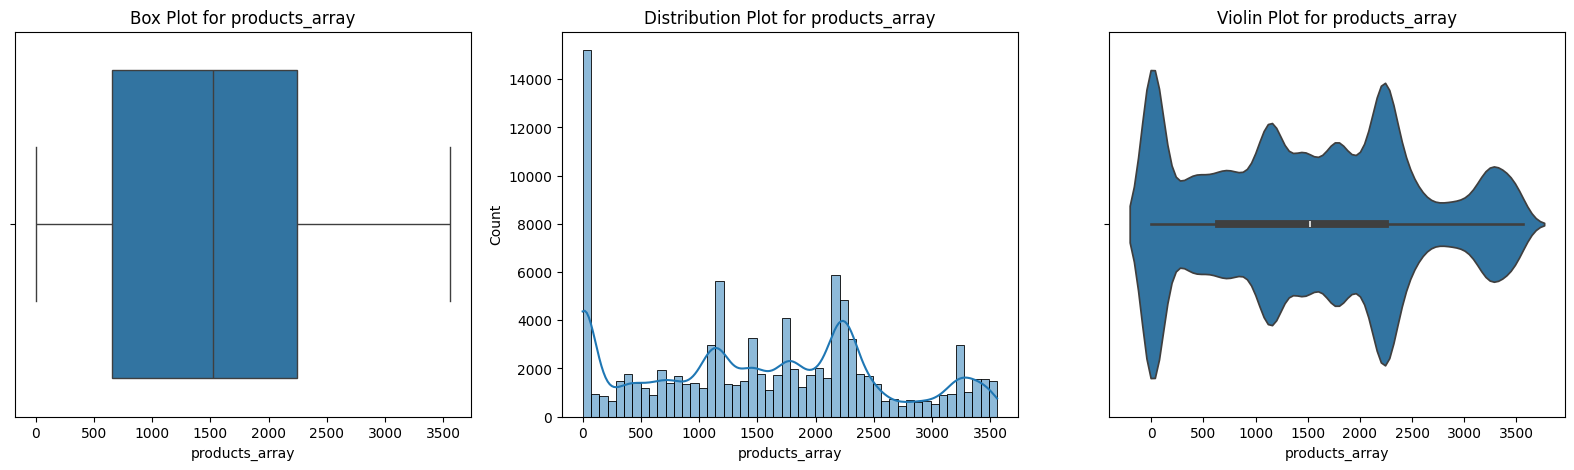

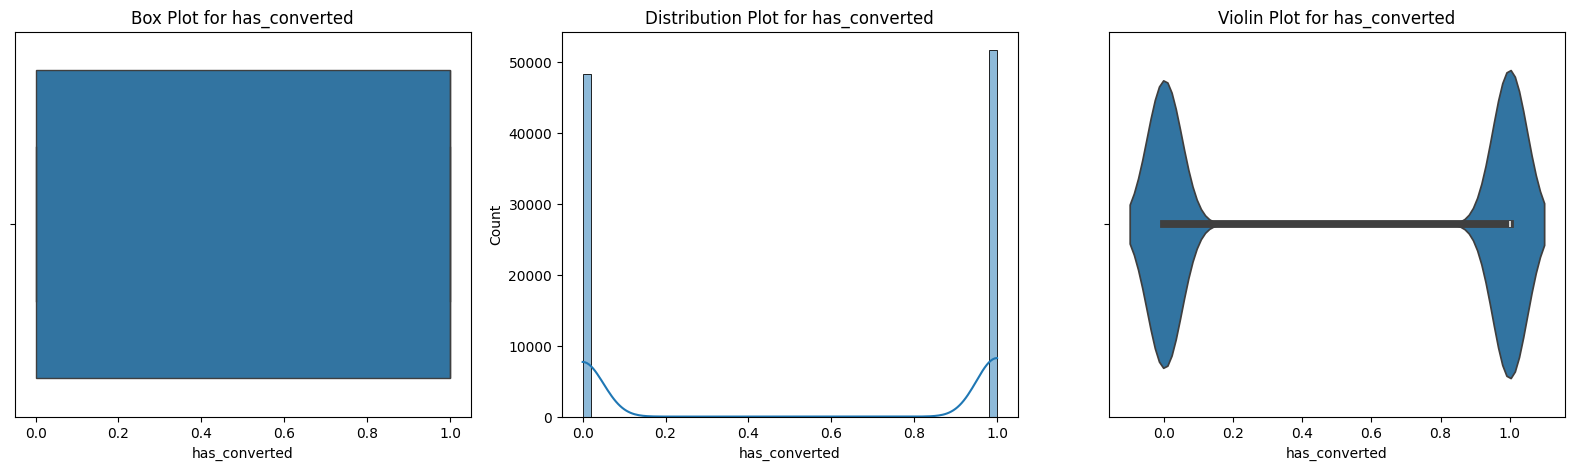

In [26]:
def plot(data, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=data, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=data, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

for i in ['count_hit', 'channelGrouping', 
        'device_deviceCategory', 'geoNetwork_region',
       'historic_session', 'historic_session_page', 'avg_session_time',
       'avg_session_time_page', 'single_page_rate', 'sessionQualityDim',
       'latest_visit_id', 'latest_visit_number', 'time_latest_visit',
       'avg_visit_time', 'visits_per_day', 'latest_source',
       'latest_keyword', 'latest_isTrueDirect',
       'time_on_site', 'transactionRevenue', 'products_array',
       'has_converted']:
    plot(data, i)

In [27]:
Q1 = data['channelGrouping'].quantile(0.25)
Q3 = data['channelGrouping'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (data['channelGrouping'] < Q1 - 1.5 * IQR) | (data['channelGrouping'] > Q3 + 1.5 * IQR)
data['channelGrouping'] = np.log1p(data['channelGrouping'])

In [28]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler(quantile_range=(25, 75))
data['channelGrouping'] = scaler.fit_transform(data[['channelGrouping']])

In [29]:
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers_tukey = (data['channelGrouping'] < lower_fence) | (data['channelGrouping'] > upper_fence)

In [30]:
# Finally I used winsorize method to treat outlayers and the output was good and you can see the answer below
from scipy.stats.mstats import winsorize
alpha = 0.05  # Set the percentage of extreme values to be replaced (e.g., 5%)
data['channelGrouping'] = winsorize(data['channelGrouping'], limits=(alpha, alpha))
data['device_deviceCategory'] = winsorize(data['device_deviceCategory'], limits=(alpha, alpha))
data['geoNetwork_region'] = winsorize(data['geoNetwork_region'], limits=(alpha, alpha))
data['historic_session_page'] = winsorize(data['historic_session_page'], limits=(alpha, alpha))
data['avg_session_time_page'] = winsorize(data['avg_session_time_page'], limits=(alpha, alpha))
data['single_page_rate'] = winsorize(data['single_page_rate'], limits=(alpha, alpha))
data['sessionQualityDim'] = winsorize(data['sessionQualityDim'], limits=(alpha, alpha))
data['latest_visit_number'] = winsorize(data['latest_visit_number'], limits=(alpha, alpha))
data['time_latest_visit'] = winsorize(data['time_latest_visit'], limits=(alpha, alpha))
data['avg_visit_time'] = winsorize(data['avg_visit_time'], limits=(alpha, alpha))
data['latest_source'] = winsorize(data['latest_source'], limits=(alpha, alpha))
data['latest_keyword'] = winsorize(data['latest_keyword'], limits=(alpha, alpha))


In [31]:
# Here I have used Lableencoding methos to convert categorical data into numerical
from sklearn.preprocessing import LabelEncoder 
import pickle
LE = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.Categorical(data[column]).codes

In [32]:
data.dtypes

count_hit                  int64
channelGrouping          float16
device_deviceCategory    float16
geoNetwork_region        float16
historic_session           int64
historic_session_page    float64
avg_session_time         float64
avg_session_time_page    float64
single_page_rate         float64
sessionQualityDim        float64
latest_visit_id            int64
latest_visit_number      float64
time_latest_visit        float64
avg_visit_time           float64
visits_per_day           float64
latest_source            float16
latest_keyword             int16
latest_isTrueDirect         bool
time_on_site               int64
transactionRevenue         int64
products_array             int16
has_converted              int64
dtype: object

In [33]:
data.head()

count_hit  channelGrouping  device_deviceCategory  geoNetwork_region  \
0       1194        -0.214355               0.693359           4.277344   
1       1194        -0.214355               0.693359           4.277344   
2       1816         0.000000               0.693359           1.098633   
3        299         0.000000               0.693359           0.693359   
4        299         0.000000               0.693359           0.693359   

   historic_session  historic_session_page  avg_session_time  \
0              6504               7.134891        722.666667   
1              6504               7.134891        722.666667   
2             12466               8.509967        445.214286   
3              1575               0.000000        787.500000   
4              1575               0.000000        787.500000   

   avg_session_time_page  single_page_rate  sessionQualityDim  ...  \
0               4.944021          0.575364           1.945910  ...   
1               4.944021          0.575364           1.945910  ...   
2               5.183187          0.599621           1.609438  ...   
3               0.000000          0.693147           3.761200  ...   
4               0.000000          0.693147           3.761200  ...   

   time_latest_visit  avg_visit_time  visits_per_day  latest_source  \
0              19.17        2.944439       66.333333       1.609375   
1              19.17        2.944439       66.333333       1.609375   
2              11.20        2.484907       73.480000       1.609375   
3              14.90        2.890372       37.375000       1.609375   
4              14.90        2.890372       37.375000       1.609375   

   latest_keyword  latest_isTrueDirect  time_on_site  transactionRevenue  \
0               2                 True          5617                   0   
1               2                 True          5617                   0   
2               1                 True         77417          1477195214   
3              96                 True          1576                   0   
4              96                 True          1576                   0   

   products_array  has_converted  
0            2265              0  
1            2265              0  
2             898              1  
3            2234              0  
4            2234              0  

[5 rows x 22 columns]

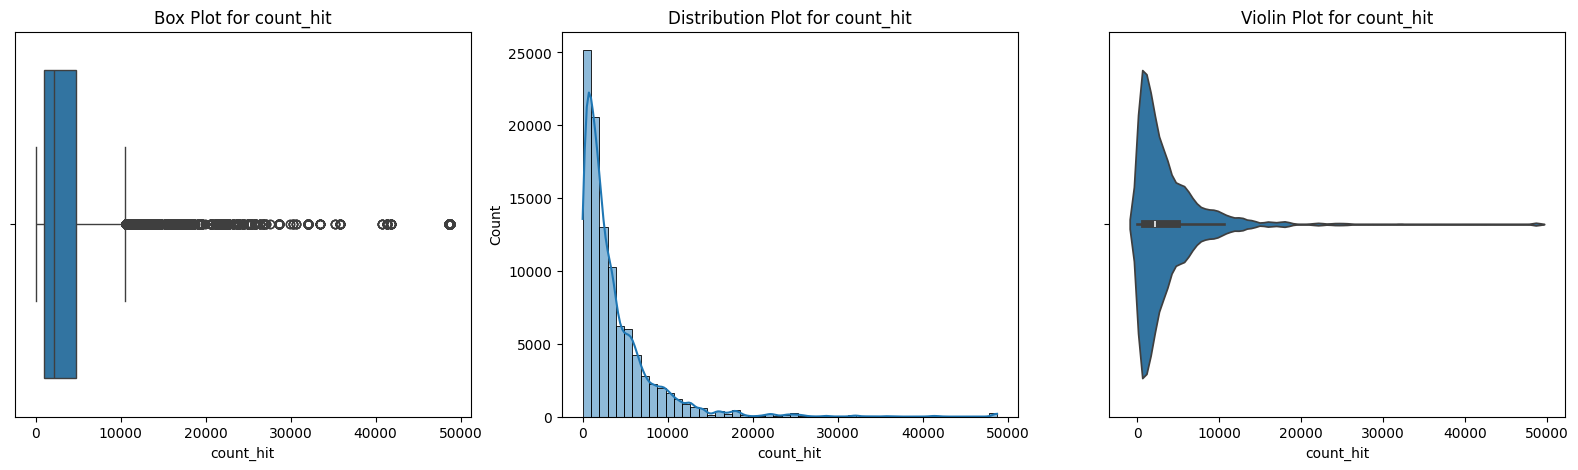

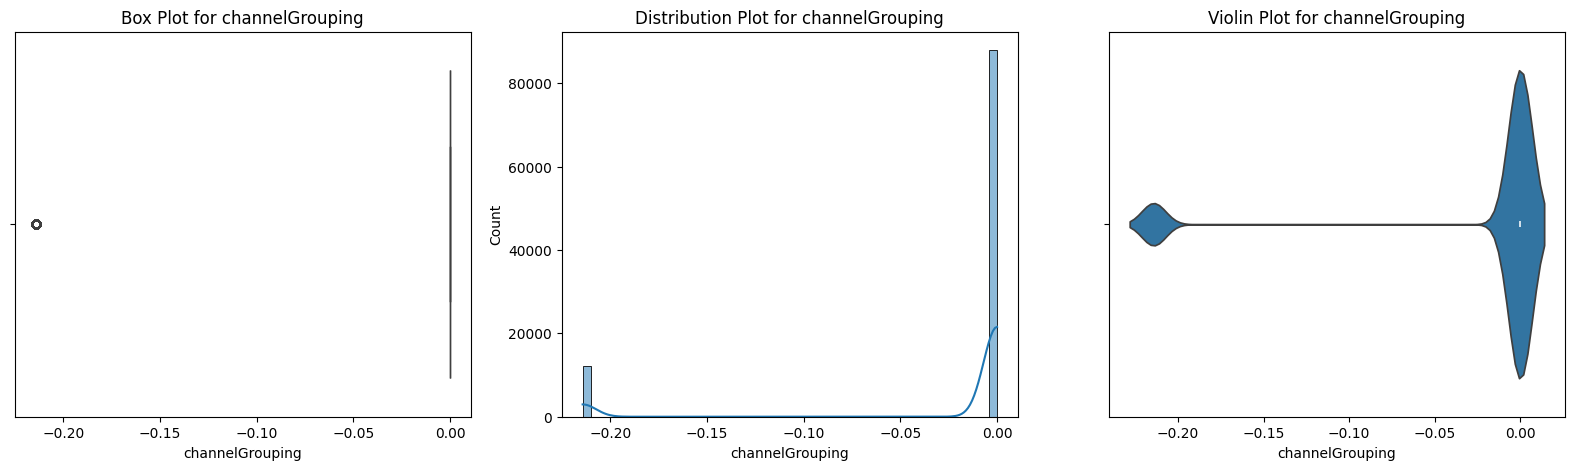

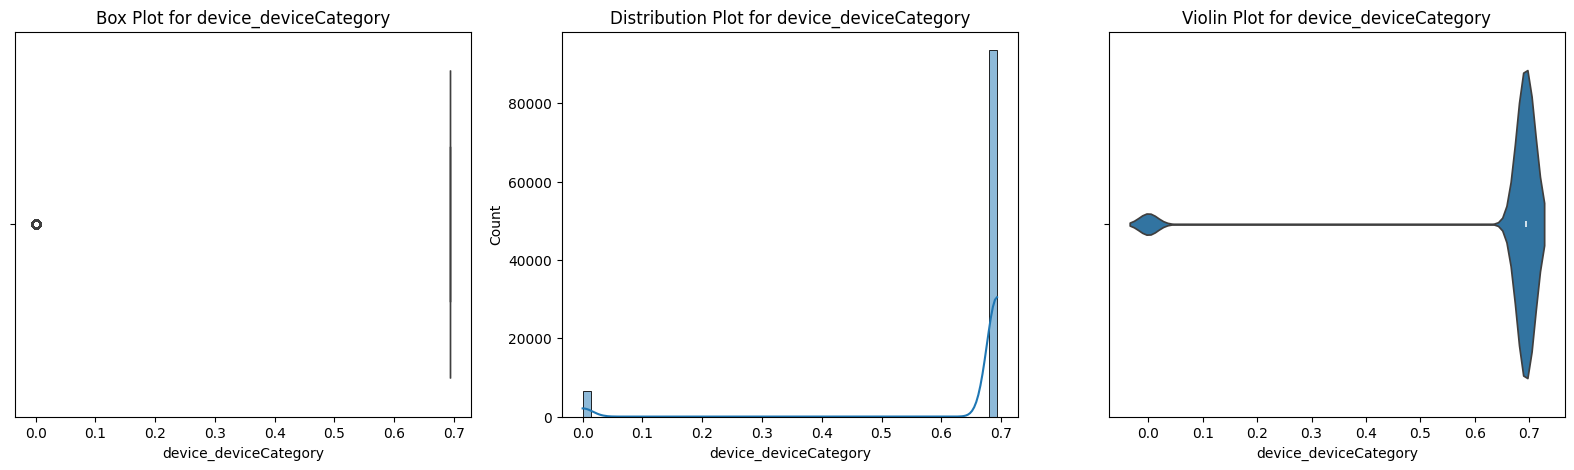

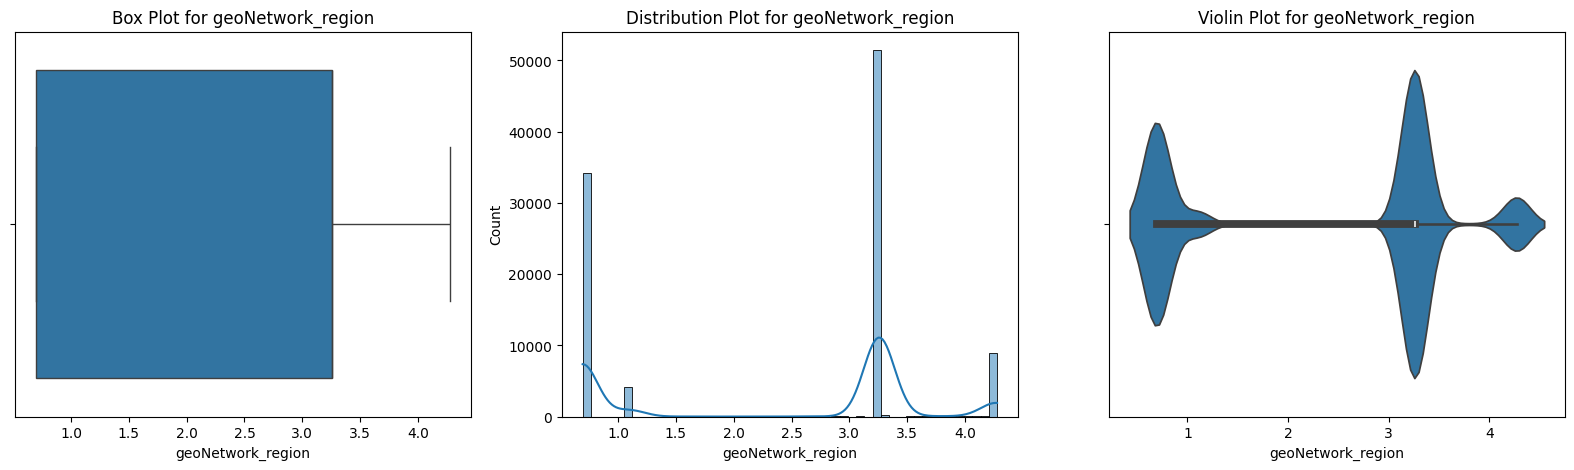

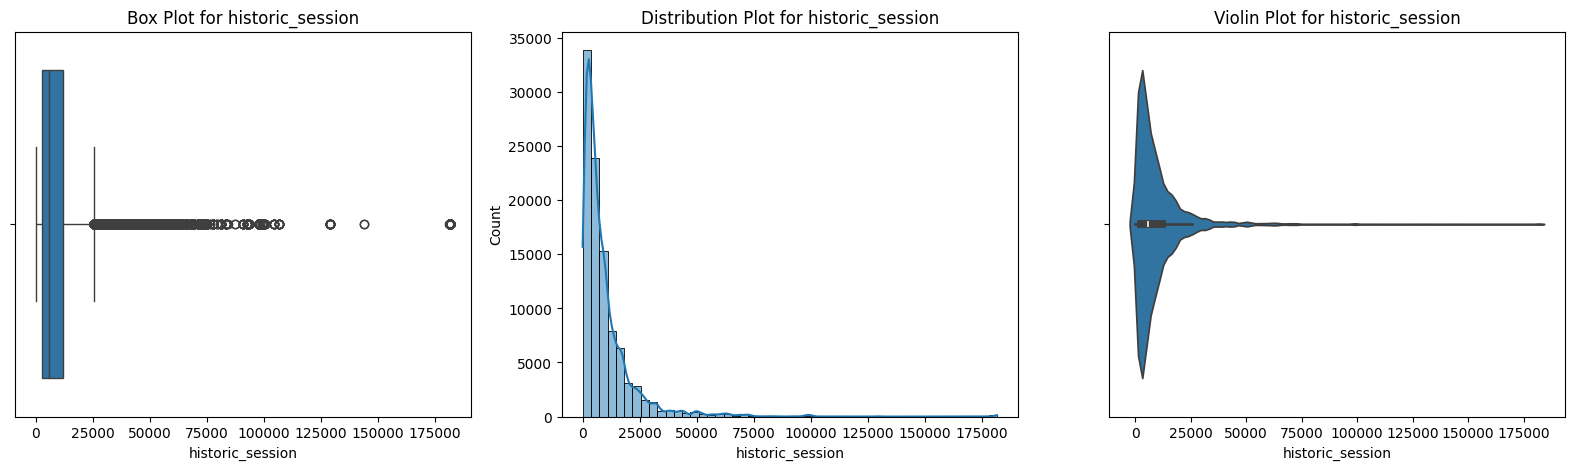

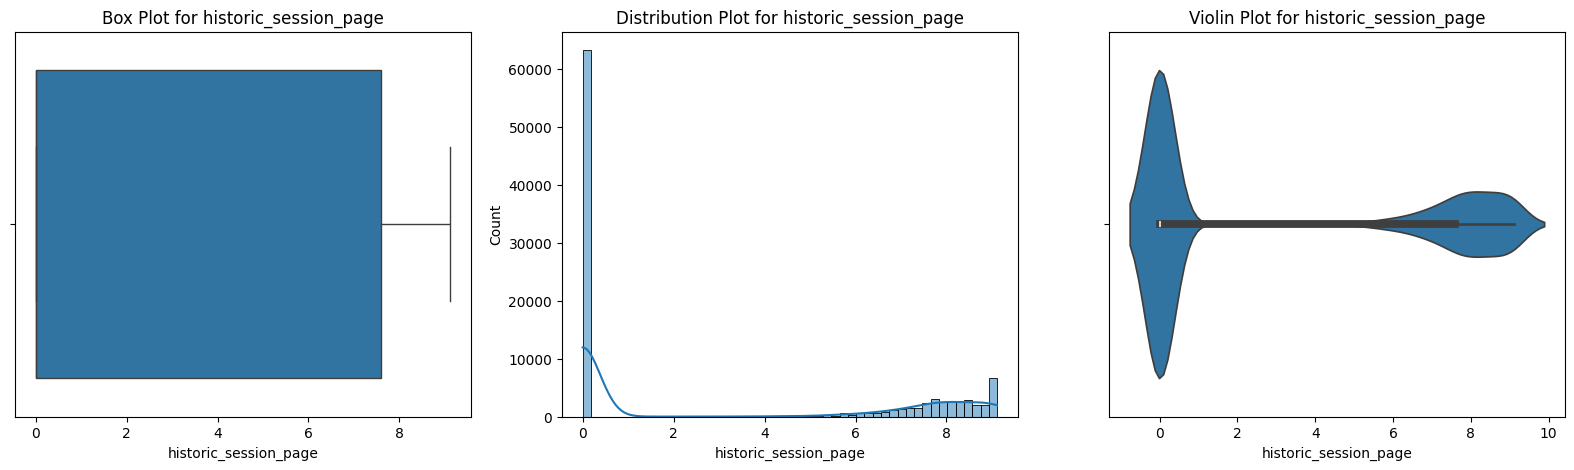

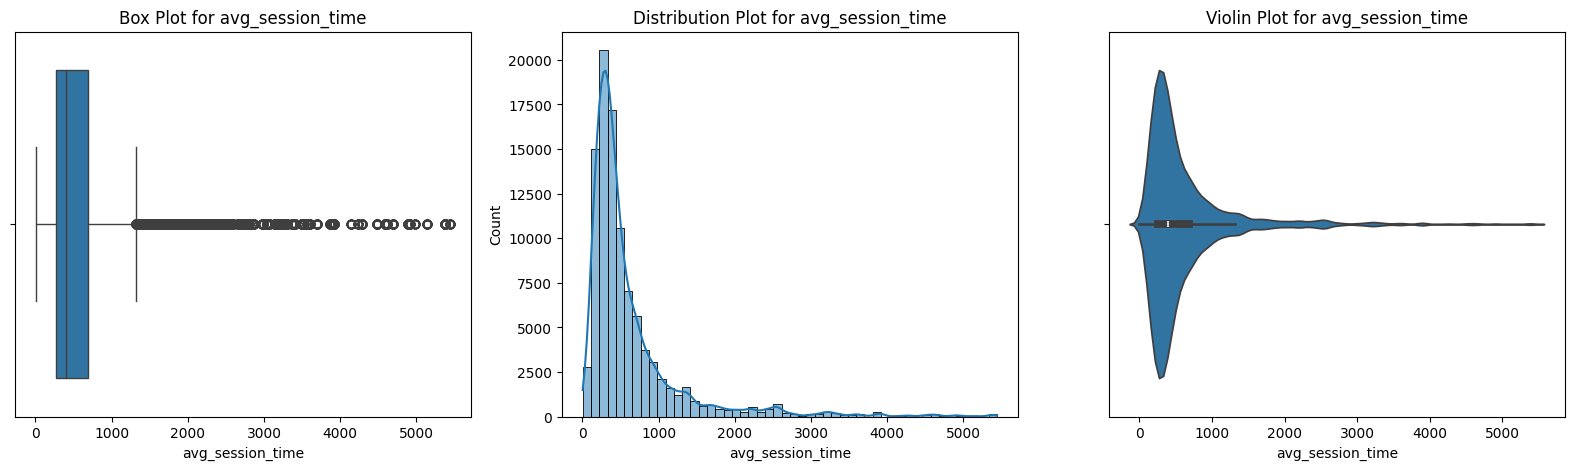

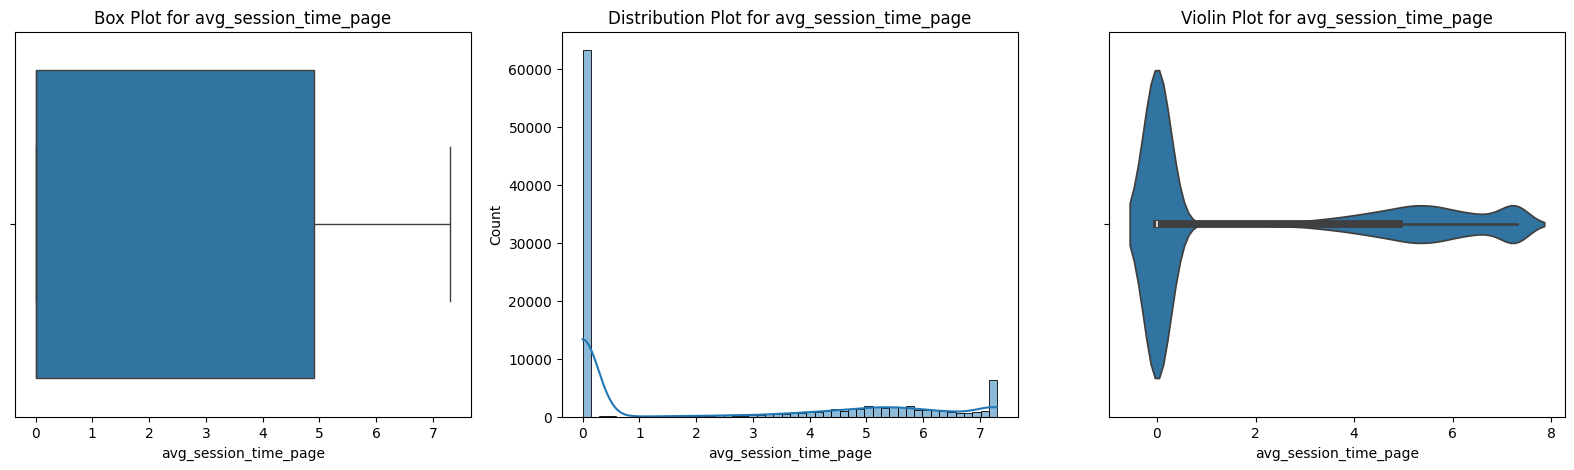

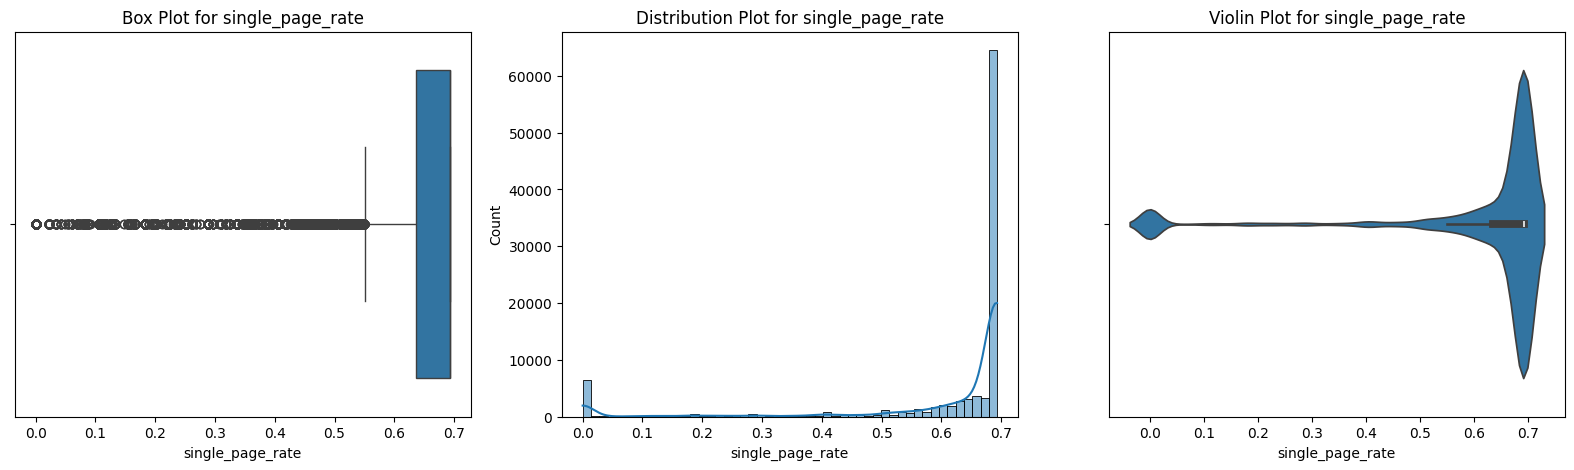

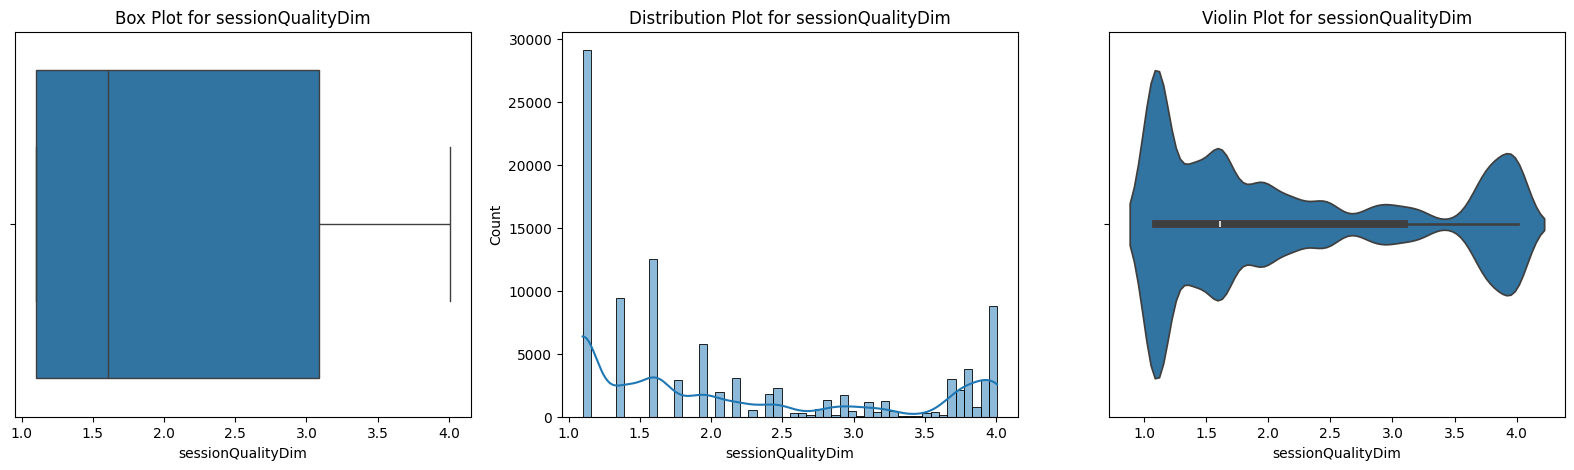

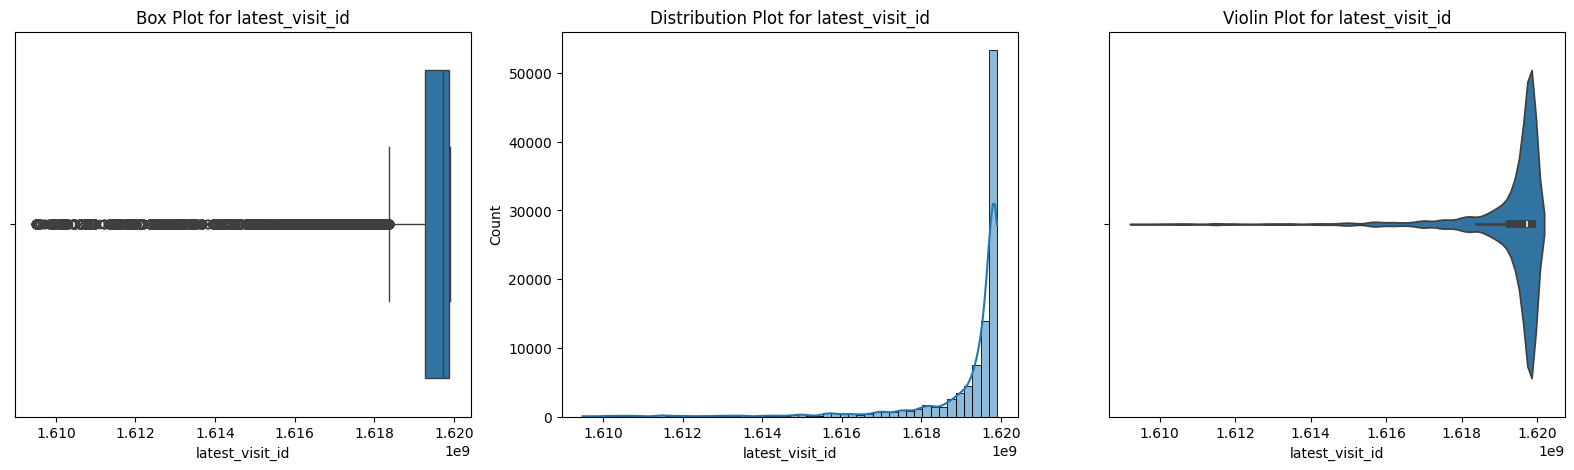

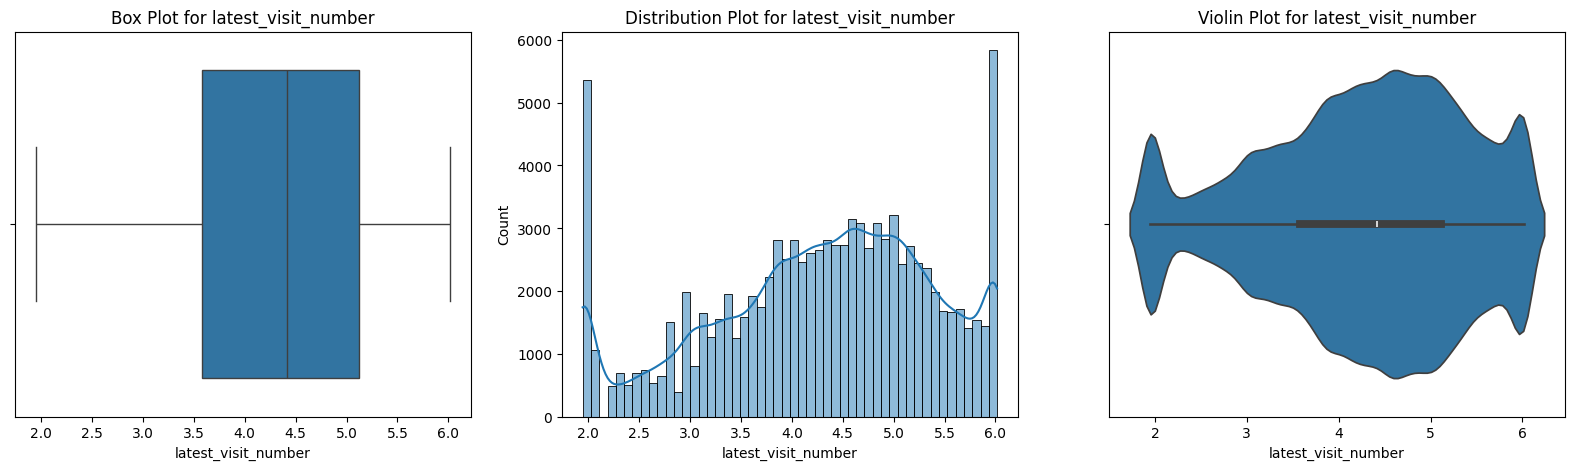

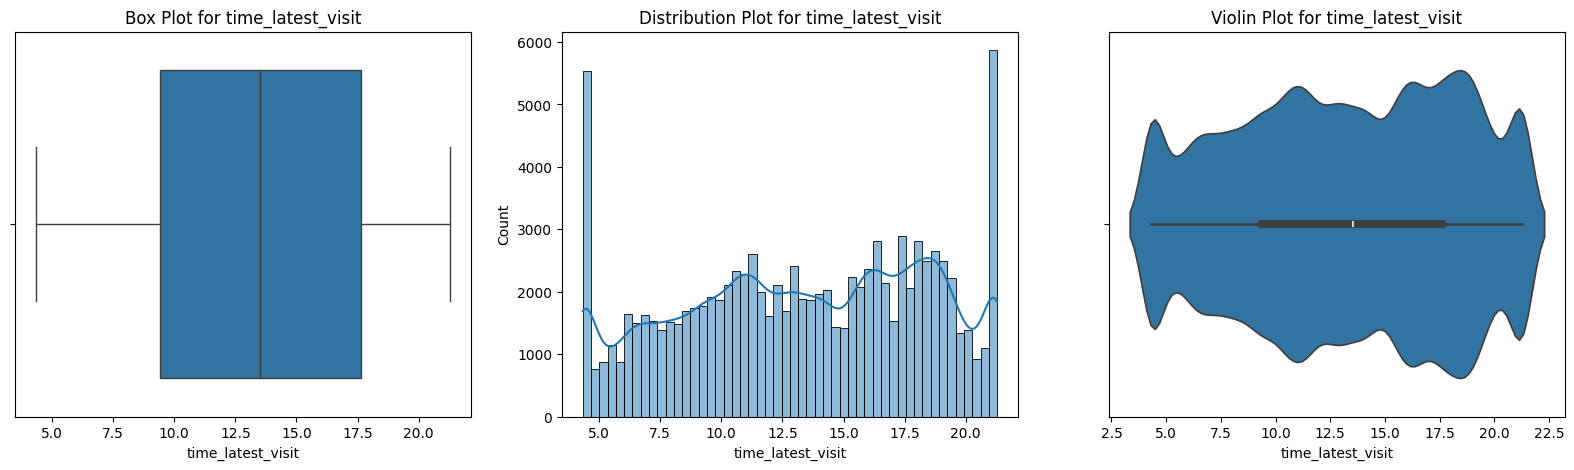

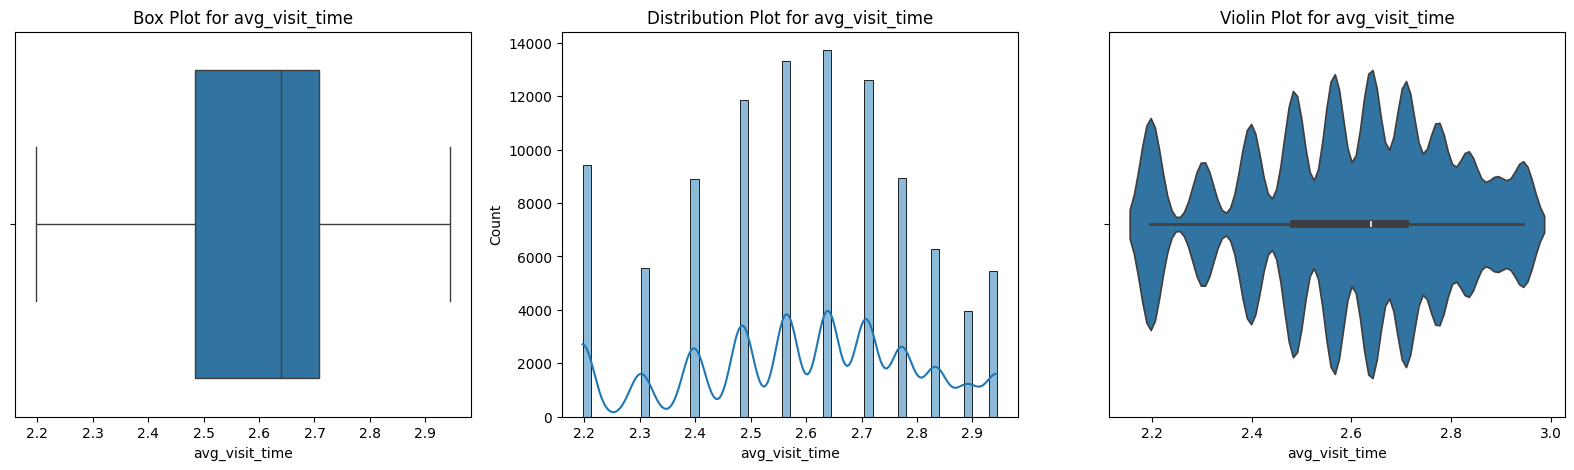

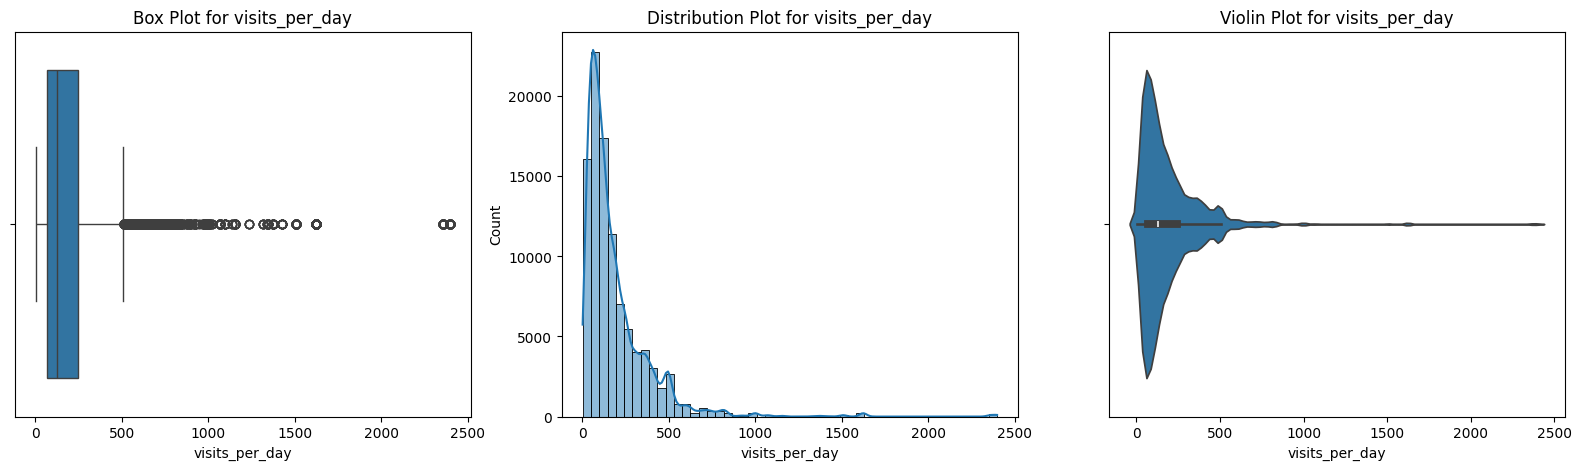

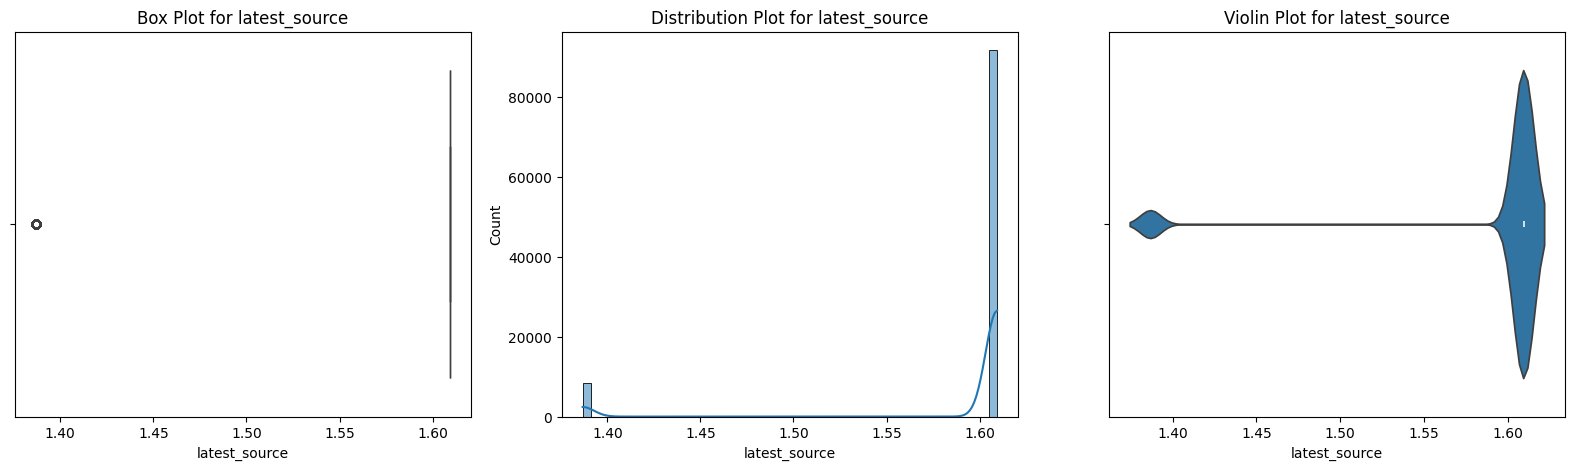

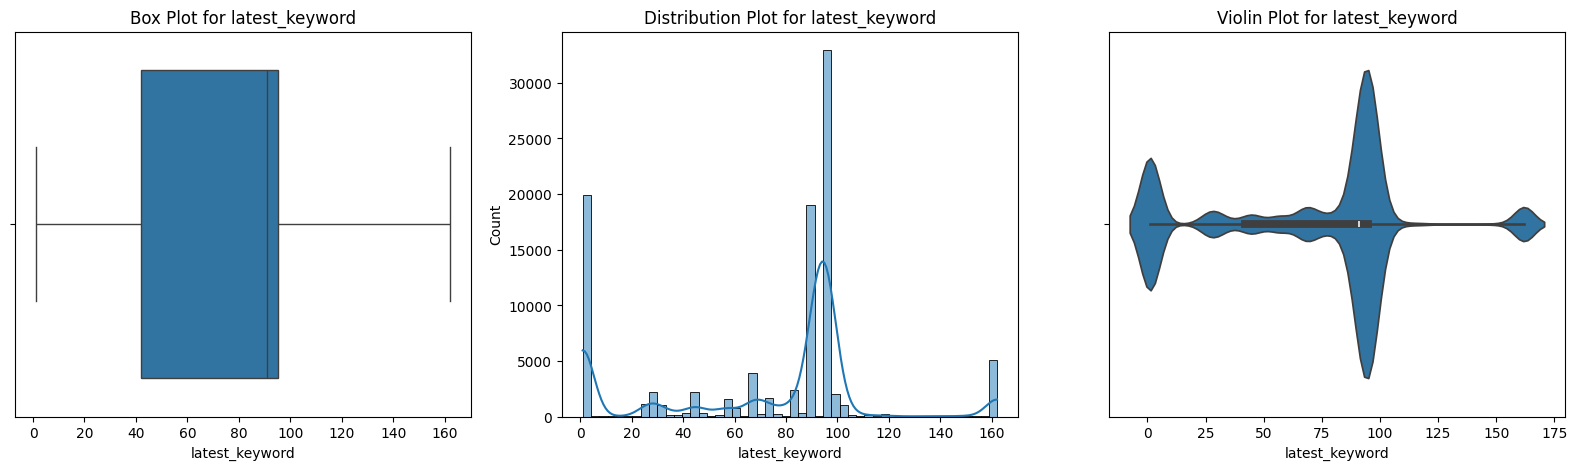

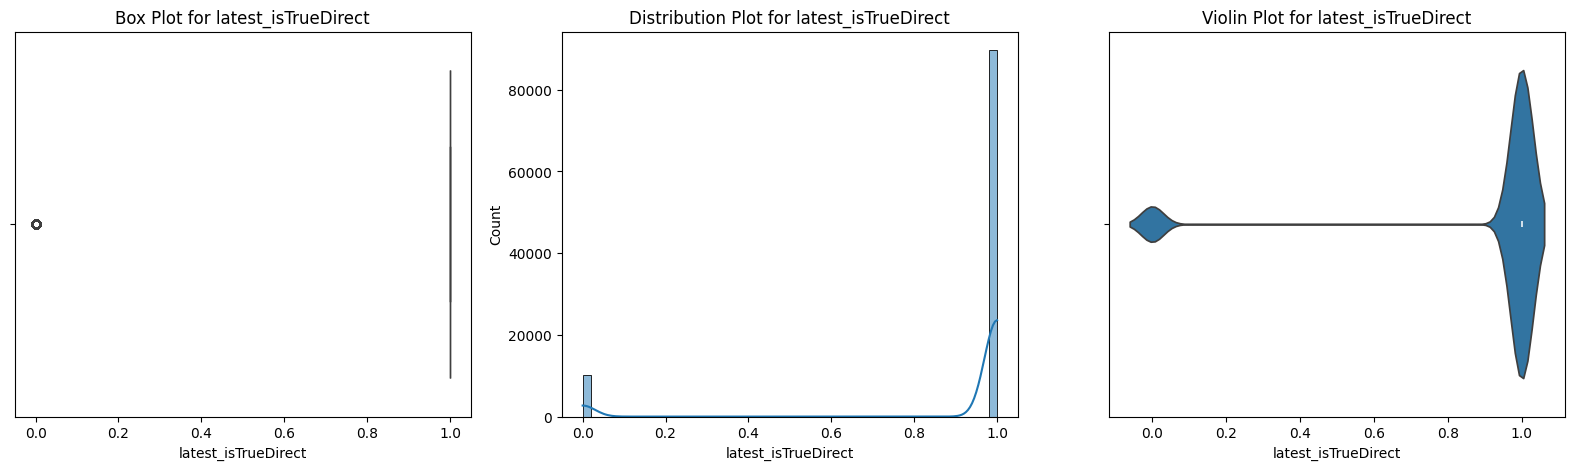

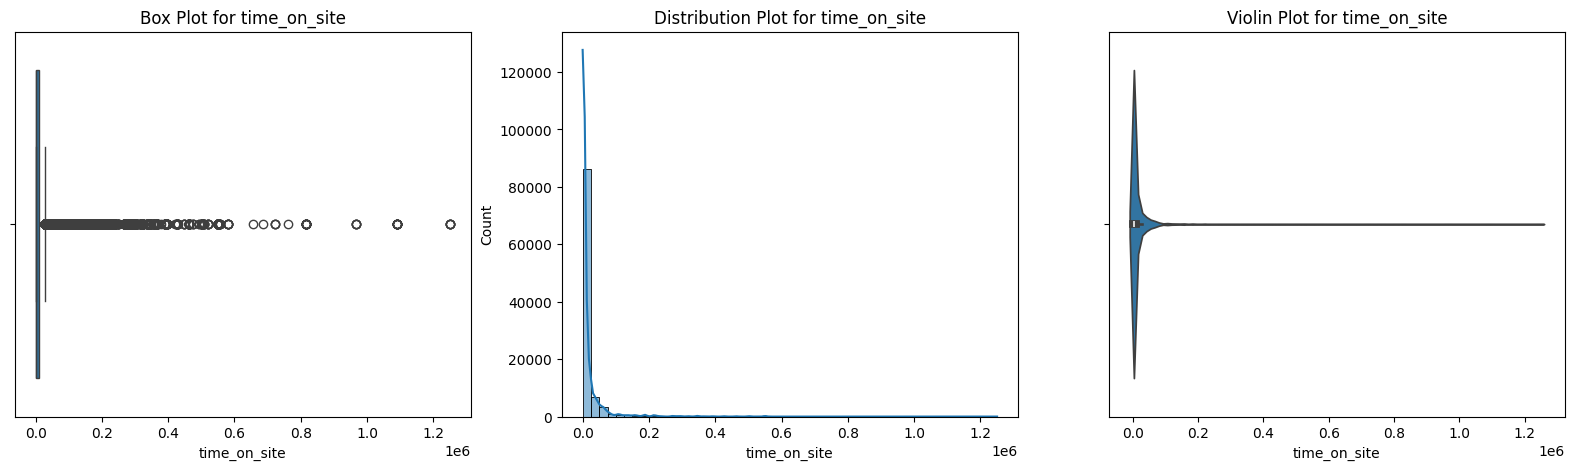

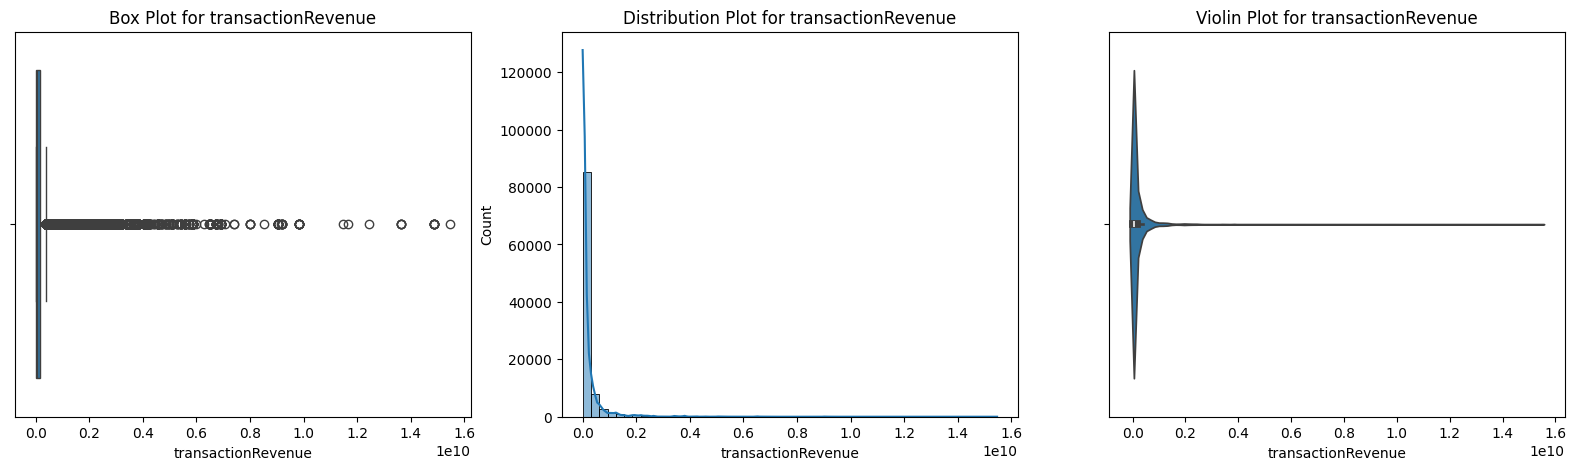

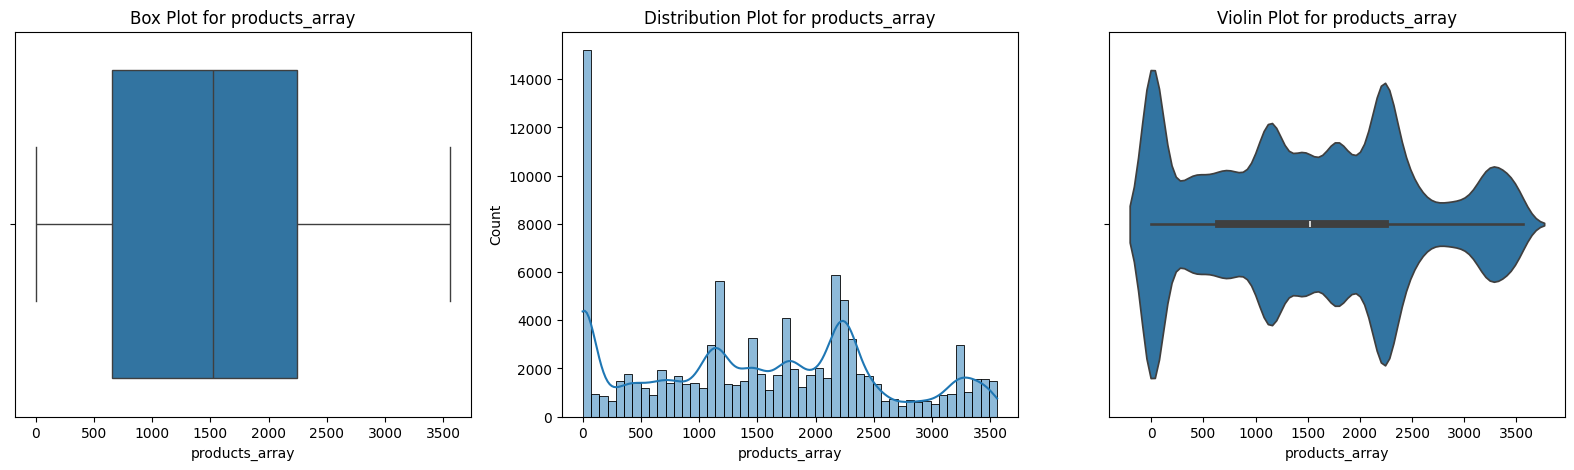

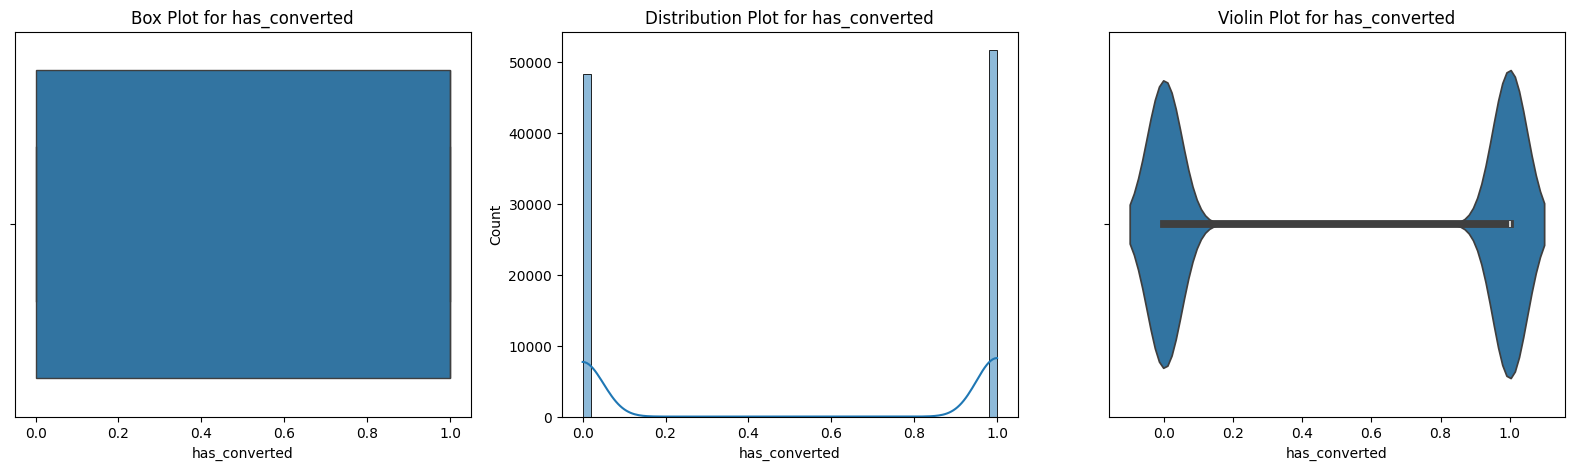

In [34]:
#Here we have treated all the outlayers so we are again checking wether is ther any outlayes are there?!
def plot(data, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=data, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=data, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

for i in ['count_hit', 'channelGrouping', 
        'device_deviceCategory', 'geoNetwork_region',
       'historic_session', 'historic_session_page', 'avg_session_time',
       'avg_session_time_page', 'single_page_rate', 'sessionQualityDim',
       'latest_visit_id', 'latest_visit_number', 'time_latest_visit',
       'avg_visit_time', 'visits_per_day', 'latest_source',
       'latest_keyword', 'latest_isTrueDirect',
       'time_on_site', 'transactionRevenue', 'products_array',
       'has_converted']:
    plot(data, i)

In [35]:
X = data.drop(['has_converted'], axis= 1)
y = data['has_converted']

In [36]:
from scipy.stats import zscore
X.apply(zscore)

C:\Users\harip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:152: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


count_hit  channelGrouping  device_deviceCategory  geoNetwork_region  \
0      -0.535456        -2.701172               0.261475                0.0   
1      -0.535456        -2.701172               0.261475                0.0   
2      -0.401037         0.370361               0.261475               -0.0   
3      -0.728872         0.370361               0.261475               -0.0   
4      -0.728872         0.370361               0.261475               -0.0   
...          ...              ...                    ...                ...   
99995   1.873284         0.370361               0.261475                0.0   
99996   1.873284         0.370361               0.261475                0.0   
99997   1.873284         0.370361               0.261475                0.0   
99998   1.873284         0.370361               0.261475                0.0   
99999   1.873284         0.370361               0.261475                0.0   

       historic_session  historic_session_page  avg_session_time  \
0             -0.247314               1.097258          0.157521   
1             -0.247314               1.097258          0.157521   
2              0.215159               1.453761         -0.256284   
3             -0.629657              -0.752542          0.254216   
4             -0.629657              -0.752542          0.254216   
...                 ...                    ...               ...   
99995          1.426494              -0.752542         -0.198180   
99996          1.426494              -0.752542         -0.198180   
99997          1.426494              -0.752542         -0.198180   
99998          1.426494              -0.752542         -0.198180   
99999          1.426494              -0.752542         -0.198180   

       avg_session_time_page  single_page_rate  sessionQualityDim  ...  \
0                   1.060273         -0.188401          -0.187683  ...   
1                   1.060273         -0.188401          -0.187683  ...   
2                   1.146743         -0.057459          -0.502116  ...   
3                  -0.727213          0.447405           1.508705  ...   
4                  -0.727213          0.447405           1.508705  ...   
...                      ...               ...                ...  ...   
99995              -0.727213          0.447405           0.316009  ...   
99996              -0.727213          0.447405           0.316009  ...   
99997              -0.727213          0.447405           0.316009  ...   
99998              -0.727213          0.447405           0.316009  ...   
99999              -0.727213          0.447405           0.316009  ...   

       latest_visit_number  time_latest_visit  avg_visit_time  visits_per_day  \
0                -0.715499           1.174052        1.717385       -0.593354   
1                -0.715499           1.174052        1.717385       -0.593354   
2                -0.128984          -0.426293       -0.499133       -0.558773   
3                -0.375638           0.316652        1.456596       -0.733475   
4                -0.375638           0.316652        1.456596       -0.733475   
...                    ...                ...             ...             ...   
99995             0.608158           0.109832        0.577182        1.011803   
99996             0.608158           0.109832        0.577182        1.011803   
99997             0.608158           0.109832        0.577182        1.011803   
99998             0.608158           0.109832        0.577182        1.011803   
99999             0.608158           0.109832        0.577182        1.011803   

       latest_source  latest_keyword  latest_isTrueDirect  time_on_site  \
0                0.0       -1.632451             0.338274     -0.214108   
1                0.0       -1.632451             0.338274     -0.214108   
2                0.0       -1.655738             0.338274      1.282856   
3                0.0        0.556479             0.338274     -0.298359   
4   

In [37]:
X.isnull().sum()

count_hit                0
channelGrouping          0
device_deviceCategory    0
geoNetwork_region        0
historic_session         0
historic_session_page    0
avg_session_time         0
avg_session_time_page    0
single_page_rate         0
sessionQualityDim        0
latest_visit_id          0
latest_visit_number      0
time_latest_visit        0
avg_visit_time           0
visits_per_day           0
latest_source            0
latest_keyword           0
latest_isTrueDirect      0
time_on_site             0
transactionRevenue       0
products_array           0
dtype: int64

In [38]:
# Let's begin with Model building here!
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [39]:
# lets try with Random Forest
rfcl = RandomForestClassifier(n_estimators = 501,oob_score=True)
rfcl = rfcl.fit(X_train, y_train)

oob_score = rfcl.oob_score_
print("OOB Score:", oob_score)

oob_error = 1- rfcl.oob_score_
print("OOB Error:", oob_error)


OOB Score: 0.9986285714285714
OOB Error: 0.001371428571428579


AUC-ROC Score: 0.9999877784813409


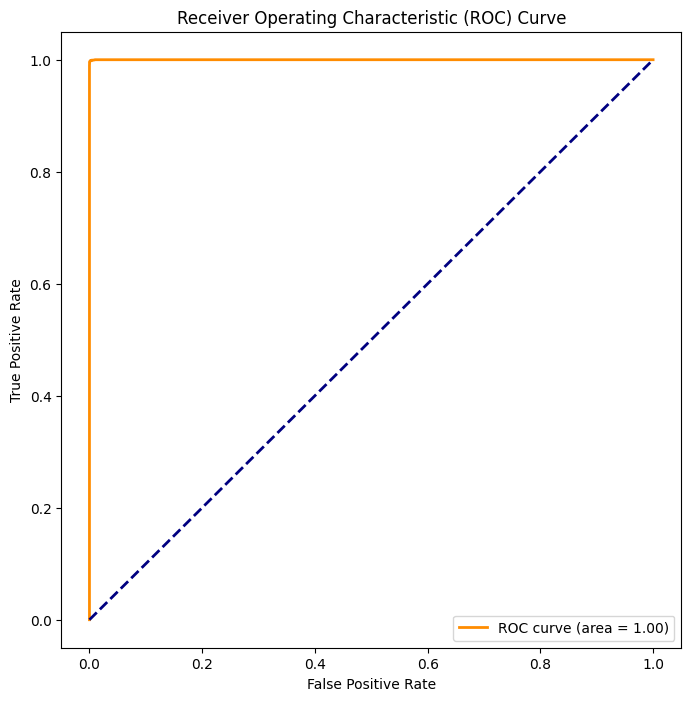

In [40]:
#Random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

X = data.drop(['has_converted'], axis= 1)
y = data['has_converted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


AUC-ROC Score: 0.9997674107869926


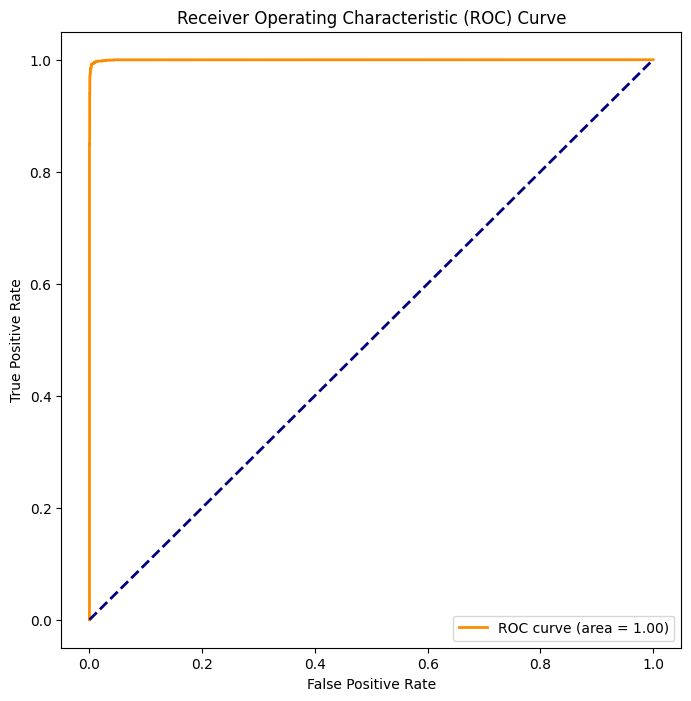

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset and split into training and testing sets
# Replace X and y with your actual feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


AUC-ROC Score: 0.9997674107869926


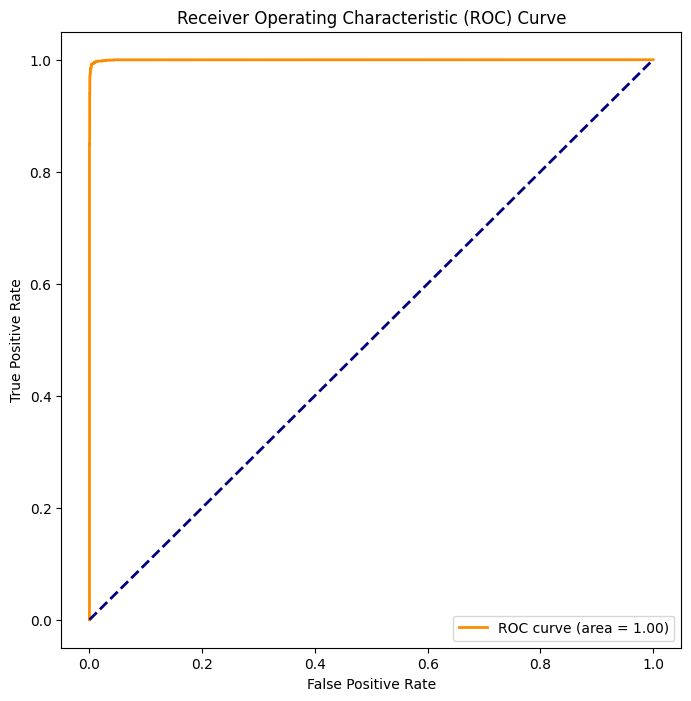


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9693
           1       1.00      0.99      0.99     10307

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



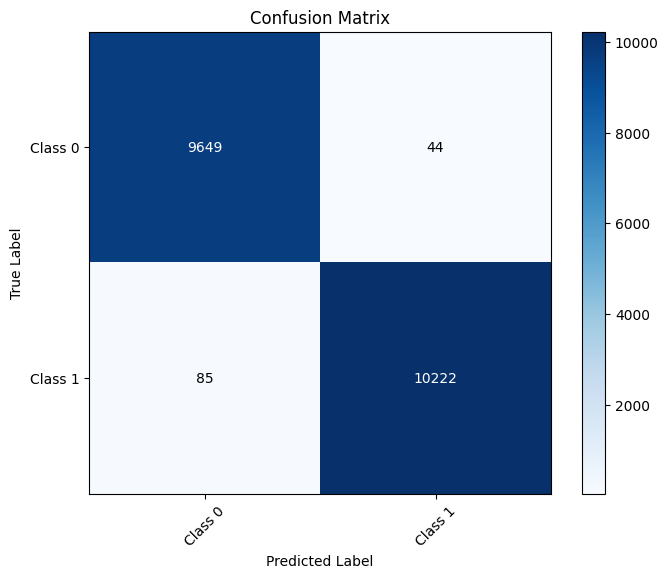

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset and split into training and testing sets
# Replace X and y with your actual feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Class 0', 'Class 1']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2.0 else "black")

plt.show()



In [43]:
# lets try Decision Tree classifier
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = data.drop(['has_converted'], axis= 1)
y = data['has_converted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.99715
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9693
           1       1.00      1.00      1.00     10307

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
 [[ 9665    28]
 [   29 10278]]


In [44]:
#Lets regularise decision tree
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth =5,min_samples_leaf=15,min_samples_split=45)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=45)

In [45]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                            Imp
count_hit              0.000000
channelGrouping        0.000000
device_deviceCategory  0.000000
geoNetwork_region      0.000000
historic_session       0.000000
historic_session_page  0.147154
avg_session_time       0.001117
avg_session_time_page  0.002451
single_page_rate       0.000000
sessionQualityDim      0.003058
latest_visit_id        0.000000
latest_visit_number    0.000000
time_latest_visit      0.000000
avg_visit_time         0.000000
visits_per_day         0.000000
latest_source          0.000000
latest_keyword         0.000200
latest_isTrueDirect    0.000000
time_on_site           0.002911
transactionRevenue     0.780390
products_array         0.062717


In [46]:
X_train.shape

(80000, 21)

In [47]:
print(pd.DataFrame(reg_dt_model.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))


                            Imp
transactionRevenue     0.780390
historic_session_page  0.147154
products_array         0.062717
sessionQualityDim      0.003058
time_on_site           0.002911
avg_session_time_page  0.002451
avg_session_time       0.001117
latest_keyword         0.000200
avg_visit_time         0.000000
latest_isTrueDirect    0.000000
latest_source          0.000000
visits_per_day         0.000000
count_hit              0.000000
time_latest_visit      0.000000
latest_visit_number    0.000000
channelGrouping        0.000000
single_page_rate       0.000000
historic_session       0.000000
geoNetwork_region      0.000000
device_deviceCategory  0.000000
latest_visit_id        0.000000


In [48]:
X_train

count_hit  channelGrouping  device_deviceCategory  geoNetwork_region  \
75220       1288         0.000000               0.693359           0.693359   
48955       6061         0.000000               0.693359           3.257812   
44966        339         0.000000               0.693359           3.257812   
13568       1820         0.000000               0.693359           3.257812   
92727       3982         0.000000               0.693359           0.693359   
...          ...              ...                    ...                ...   
6265        4002        -0.214355               0.693359           3.257812   
54886        547         0.000000               0.693359           3.257812   
76820       2640         0.000000               0.693359           0.693359   
860          594         0.000000               0.000000           3.257812   
15795        259         0.000000               0.693359           0.693359   

       historic_session  historic_session_page  avg_session_time  \
75220              4947               7.634337        412.250000   
48955             12864               0.000000        514.560000   
44966               592               0.000000        592.000000   
13568              4656               7.651596        358.153846   
92727             26746               9.112507        703.842105   
...                 ...                    ...               ...   
6265               3516               0.000000        167.428571   
54886              3220               0.000000        644.000000   
76820              2423               0.000000        173.071429   
860                2440               7.481556        406.666667   
15795               175               0.000000         58.333333   

       avg_session_time_page  single_page_rate  sessionQualityDim  ...  \
75220               5.154736          0.650588           2.772589  ...   
48955               0.000000          0.693147           1.098612  ...   
44966               0.000000          0.693147           1.609438  ...   
13568               5.092333          0.613104           1.098612  ...   
92727               5.625536          0.596520           3.931826  ...   
...                      ...               ...                ...  ...   
6265                0.000000          0.693147           1.609438  ...   
54886               0.000000          0.693147           1.098612  ...   
76820               0.000000          0.693147           1.609438  ...   
860                 5.692609          0.510826           3.828641  ...   
15795               0.000000          0.693147           1.098612  ...   

       latest_visit_number  time_latest_visit  avg_visit_time  visits_per_day  \
75220             5.141664              16.43        2.484907       47.703704   
48955             5.099866              17.98        2.564949      216.464286   
44966             3.988984               4.33        2.197225      339.000000   
13568             2.772589              10.13        2.484907       67.517241   
92727             3.891820               4.33        2.484907      128.451613   
...                    ...                ...             ...             ...   
6265              5.669881              16.97        2.639057      133.400000   
54886             2.944439              13.93        2.944439       26.047619   
76820             5.564520              15.63        2.564949      101.538462   
860               4.343805              16.70        2.708050       33.869565   
15795             3.951244              11.28        2.197225       51.800000   

       latest_source  latest_keyword  latest_isTrueDirect  time_on_site  \
75220       1.609375              95                 True          2244   
48955       1.609375              95                 True           355   
44966       1.609375             162                 True             0   
13568       1.609375              97                 True         23823   
9272


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9693
           1       0.96      0.98      0.97     10307

    accuracy                           0.96     20000
   macro avg       0.97      0.96      0.96     20000
weighted avg       0.97      0.96      0.96     20000



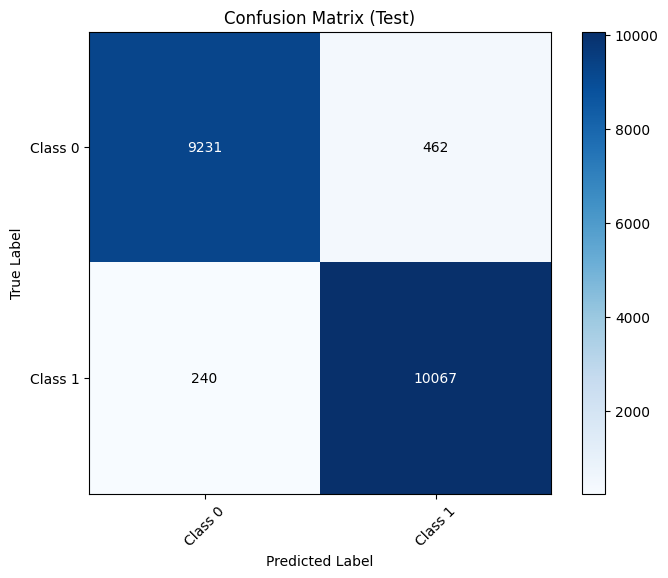

AUC (Test): 0.995


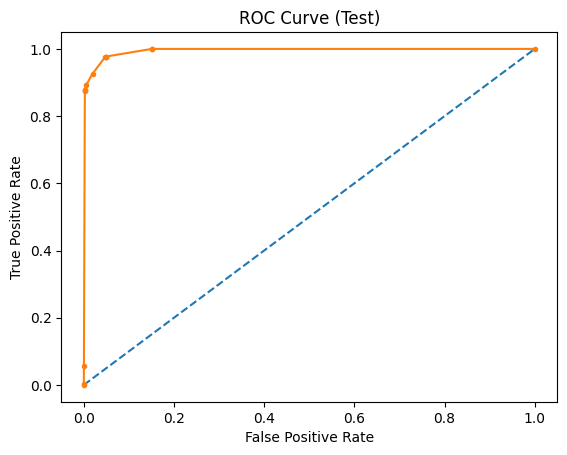

In [49]:
# Decision tree after regulaised for test data
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have a Decision Tree model named reg_dt_model
# Replace X_test and y_test with your actual test set
# Note: In this example, I'm using a DecisionTreeClassifier; replace it with your regression decision tree model.

# Make predictions on the test set
y_pred_test = reg_dt_model.predict(X_test)

# Print Classification Report for the test set
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Plot the Confusion Matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Test)')
plt.colorbar()

classes = ['Class 0', 'Class 1']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix_test[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix_test[i, j] > conf_matrix_test.max() / 2.0 else "black")

plt.show()

# Calculate AUC-ROC score for the test set
probs_test = reg_dt_model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, probs_test)
print('AUC (Test): %.3f' % auc_test)

# Plot ROC curve for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test, tpr_test, marker='.')
plt.title('ROC Curve (Test)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



Classification Report (Training):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     38580
           1       0.96      0.98      0.97     41420

    accuracy                           0.97     80000
   macro avg       0.97      0.96      0.97     80000
weighted avg       0.97      0.97      0.97     80000



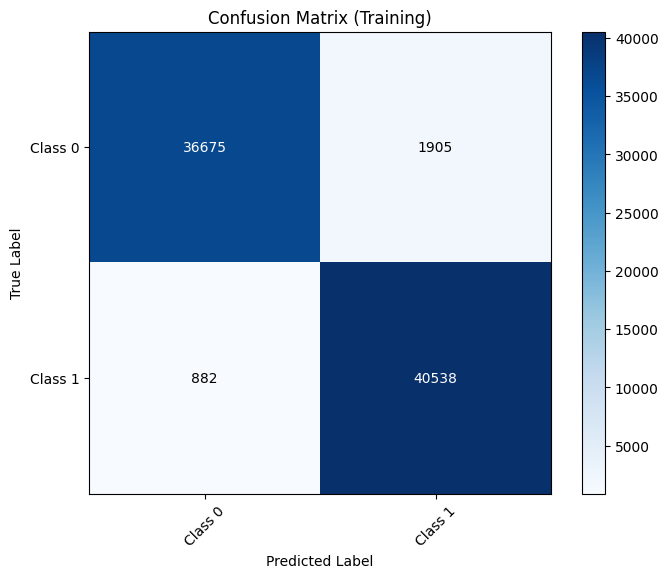

AUC (Training): 0.995


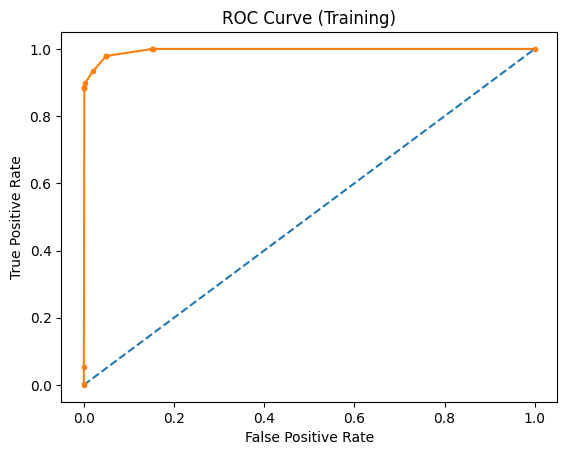

In [50]:
# Regularised data for training data for Decision tree
# Assuming you have a Decision Tree model named reg_dt_model
# Replace X_train and y_train with your actual training set

# Make predictions on the training set
y_pred_train = reg_dt_model.predict(X_train)

# Print Classification Report for the training set
print("\nClassification Report (Training):")
print(classification_report(y_train, y_pred_train))

# Plot the Confusion Matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Training)')
plt.colorbar()

classes = ['Class 0', 'Class 1']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix_train[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix_train[i, j] > conf_matrix_train.max() / 2.0 else "black")

plt.show()

# Calculate AUC-ROC score for the training set
probs_train = reg_dt_model.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, probs_train)
print('AUC (Training): %.3f' % auc_train)

# Plot ROC curve for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, marker='.')
plt.title('ROC Curve (Training)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


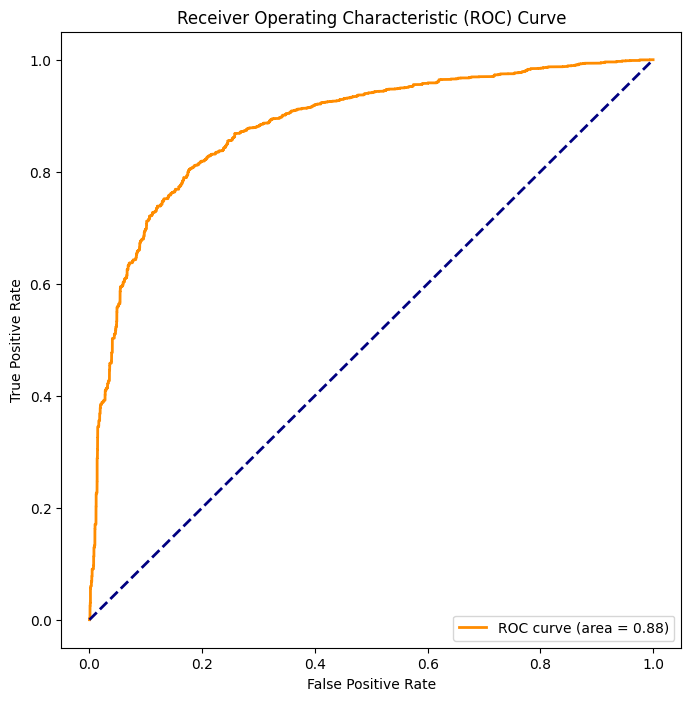

Accuracy: 0.8038
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      9693
           1       0.79      0.85      0.82     10307

    accuracy                           0.80     20000
   macro avg       0.81      0.80      0.80     20000
weighted avg       0.81      0.80      0.80     20000

Confusion Matrix:
 [[7318 2375]
 [1549 8758]]
AUC-ROC: 0.8820624950809888


In [51]:
# Logistic regression for testing data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Assuming 'data' is your DataFrame
X = data.drop(['has_converted'], axis=1)
y = data['has_converted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Train the model on the scaled training set
logreg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)
print(f"AUC-ROC: {roc_auc}")


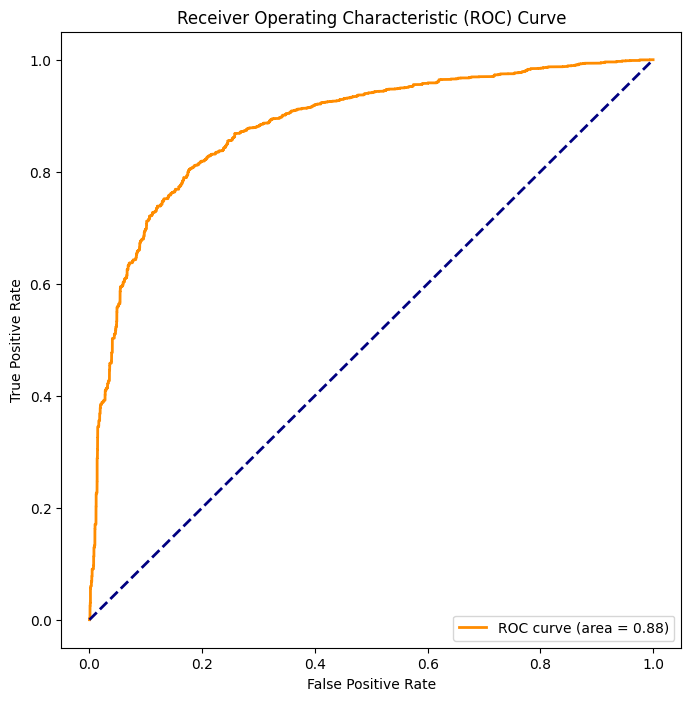

Accuracy: 0.8038
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      9693
           1       0.79      0.85      0.82     10307

    accuracy                           0.80     20000
   macro avg       0.81      0.80      0.80     20000
weighted avg       0.81      0.80      0.80     20000

Confusion Matrix:
 [[7318 2375]
 [1549 8758]]
AUC-ROC: 0.8820624950809888


In [52]:
# Logestic regression for training data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Assuming 'data' is your DataFrame
X = data.drop(['has_converted'], axis=1)
y = data['has_converted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler for both training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Train the model on the scaled training set
logreg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)
print(f"AUC-ROC: {roc_auc}")


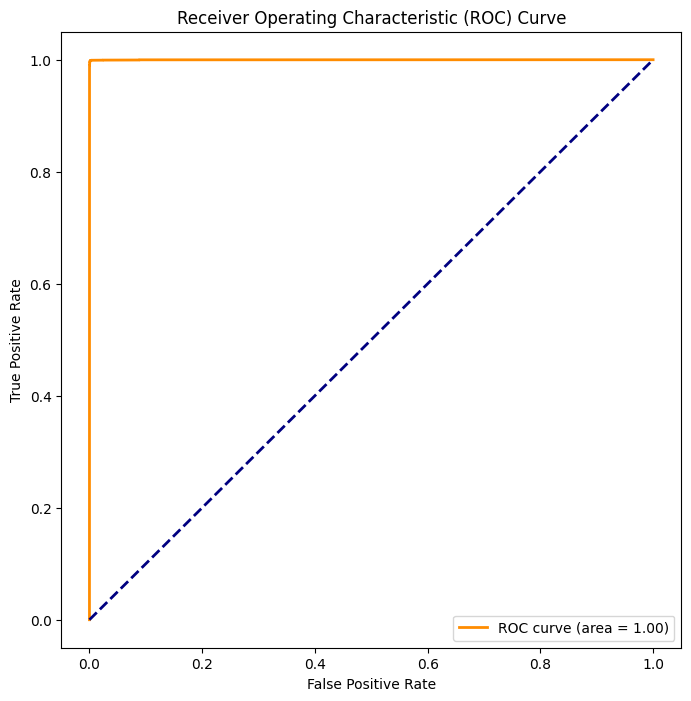

Accuracy: 0.9983
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9693
           1       1.00      1.00      1.00     10307

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
 [[ 9678    15]
 [   19 10288]]
AUC-ROC: 0.9999218463409578


In [53]:
# XGBoost method

# Import necessary libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

X = data.drop('has_converted', axis= 1)
y = data['has_converted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model
xgb_model = XGBClassifier()

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)
print(f"AUC-ROC: {roc_auc}")


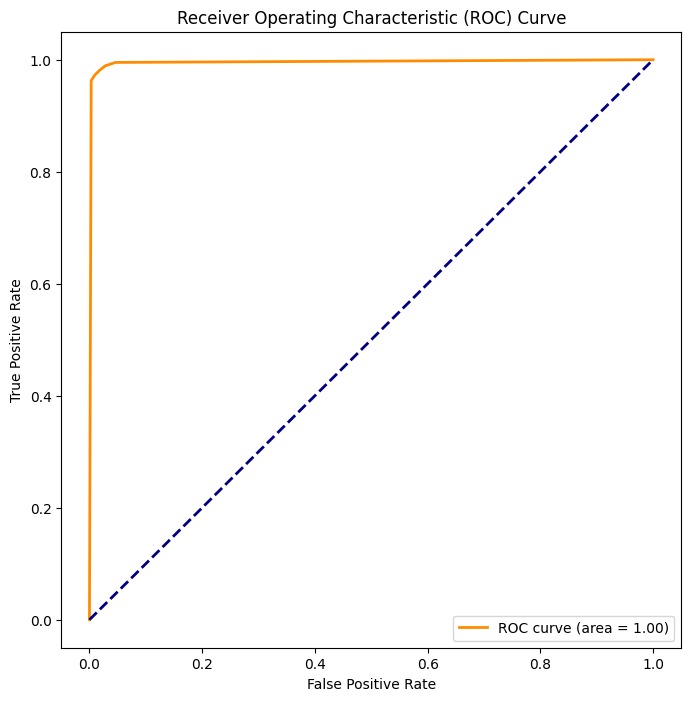

Accuracy: 0.98155
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      9693
           1       0.98      0.98      0.98     10307

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000

Confusion Matrix:
 [[ 9514   179]
 [  190 10117]]
AUC-ROC: 0.9953877379891773


In [54]:
# KNN Model with Std scalling
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'data' is your DataFrame
X = data.drop(['has_converted'], axis=1)
y = data['has_converted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN model
knn_model = KNeighborsClassifier()

# Train the model on the scaled training set
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = knn_model.predict(X_test_scaled)
y_prob = knn_model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC calculation

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)
print(f"AUC-ROC: {roc_auc}")


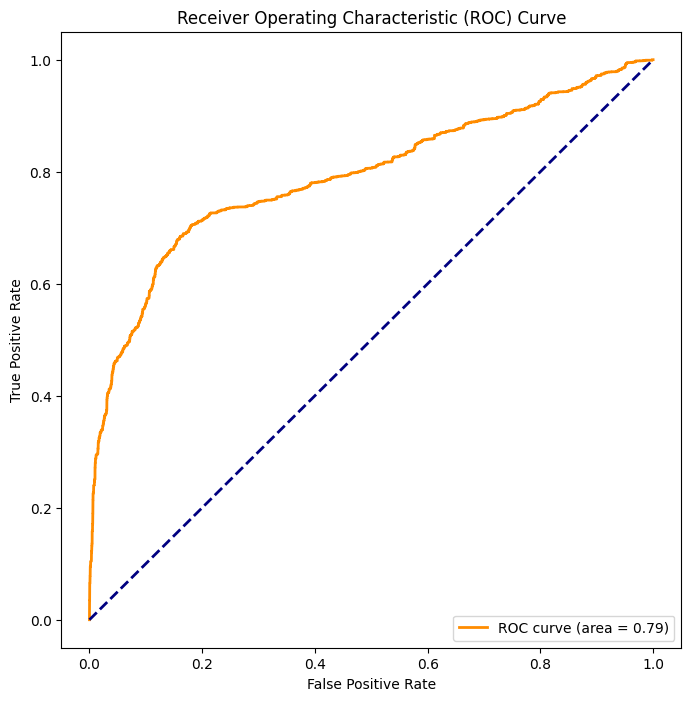

Accuracy: 0.5513
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.20      0.31     10307
           1       0.52      0.93      0.67      9693

    accuracy                           0.55     20000
   macro avg       0.63      0.56      0.49     20000
weighted avg       0.64      0.55      0.48     20000

Confusion Matrix:
 [[2022 8285]
 [ 689 9004]]
AUC-ROC: 0.7917661016331283


In [55]:
#Naive_bayes_model
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


X = data.drop(['has_converted'], axis= 1)
y = data['has_converted']

# Convert the problem into a binary classification task
y_binary = (y == 0).astype(int)  # 0 for malignant (0), 1 for benign (1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create a Naive Bayes model (Gaussian Naive Bayes for continuous features)
naive_bayes_model = GaussianNB()

# Train the model on the training set
naive_bayes_model.fit(X_train, y_train)

# Get probability estimates for the positive class (class 1)
y_prob = naive_bayes_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_prob > 0.5)  # Convert probabilities to binary predictions
report = classification_report(y_test, y_prob > 0.5)
matrix = confusion_matrix(y_test, y_prob > 0.5)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)
print(f"AUC-ROC: {roc_auc}")


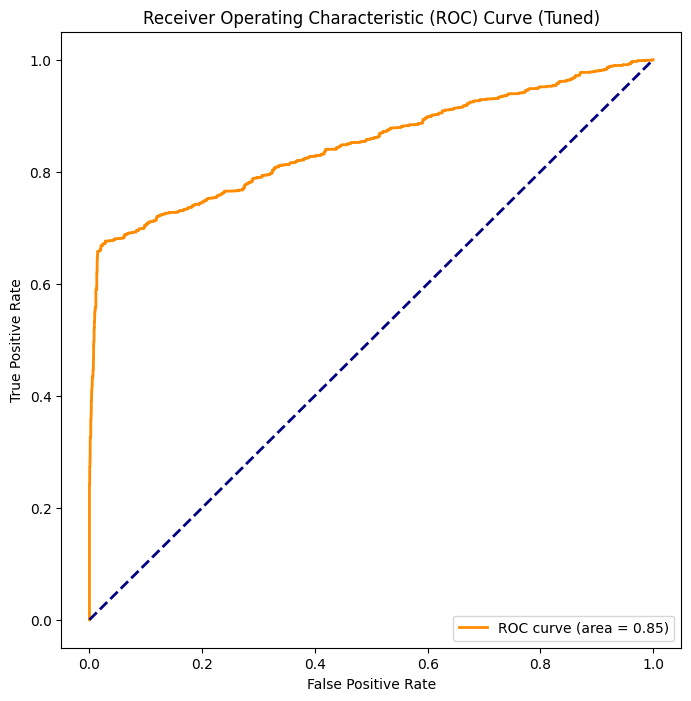

Best Hyperparameters: {'var_smoothing': 1e-05}
Accuracy (Tuned): 0.5507
Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.82      0.17      0.28     10307
           1       0.52      0.96      0.67      9693

    accuracy                           0.55     20000
   macro avg       0.67      0.56      0.47     20000
weighted avg       0.67      0.55      0.47     20000

Confusion Matrix (Tuned):
 [[1706 8601]
 [ 385 9308]]
AUC-ROC (Tuned): 0.8489737592783824


In [56]:
# Regularised naive_bayes_model
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


X = data.drop('has_converted', axis= 1)
y = data['has_converted']

# Convert the problem into a binary classification task
y_binary = (y == 0).astype(int)  # 0 for malignant (0), 1 for benign (1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create a Naive Bayes model (Gaussian Naive Bayes for continuous features)
naive_bayes_model = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Create GridSearchCV object
grid_search = GridSearchCV(naive_bayes_model, param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_prob_tuned > 0.5)
report_tuned = classification_report(y_test, y_prob_tuned > 0.5)
matrix_tuned = confusion_matrix(y_test, y_prob_tuned > 0.5)
roc_auc_tuned = roc_auc_score(y_test, y_prob_tuned)

# Plot the ROC curve for the tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
plt.figure(figsize=(8, 8))
plt.plot(fpr_tuned, tpr_tuned, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_tuned))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned)')
plt.legend(loc='lower right')
plt.show()

# Print the results
print("Best Hyperparameters:", best_params)
print(f"Accuracy (Tuned): {accuracy_tuned}")
print("Classification Report (Tuned):\n", report_tuned)
print("Confusion Matrix (Tuned):\n", matrix_tuned)
print(f"AUC-ROC (Tuned): {roc_auc_tuned}")


In [57]:
dat = {
    "Model":[ "Logistic Regression","k-Nearest Neighbors","XGBoost","Naive Bayes","Decision Tree","Random Forest"],
    "Accuracy":[0.90485,0.98820,0.99840,0.80840,0.96735,0.99820],
    "Precision":[0.912178,0.991220,0.998641,0.830782,0.997112,0.998143],
    "Recall":[0.880761,0.985835,0.998254,0.733416,0.997421,0.998143],
    "F1 Score":[0.896194,0.988520,0.998447,0.779068,0.997266,0.998143]
}
pd.DataFrame(dat)

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression   0.90485   0.912178  0.880761  0.896194
1  k-Nearest Neighbors   0.98820   0.991220  0.985835  0.988520
2              XGBoost   0.99840   0.998641  0.998254  0.998447
3          Naive Bayes   0.80840   0.830782  0.733416  0.779068
4        Decision Tree   0.96735   0.997112  0.997421  0.997266
5        Random Forest   0.99820   0.998143  0.998143  0.998143

In [58]:
data.to_csv("dat.csv")

In [59]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_accuracy = accuracy_score(y_test, logreg_model.predict(X_test))

# Create and train the k-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test))

# Create and train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))

# Convert the problem into a binary classification task for Naive Bayes
y_binary = (y == 0).astype(int)  # 0 for malignant (0), 1 for benign (1)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model with hyperparameter tuning
naive_bayes_model = GaussianNB()
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search_nb = GridSearchCV(naive_bayes_model, param_grid_nb, cv=5, scoring='roc_auc')
grid_search_nb.fit(X_train, y_train)
best_model_nb = grid_search_nb.best_estimator_
y_prob_tuned_nb = best_model_nb.predict_proba(X_test)[:, 1]
accuracy_tuned_nb = accuracy_score(y_test, y_prob_tuned_nb > 0.5)

# Get the best hyperparameters for Naive Bayes
best_params_nb = grid_search_nb.best_params_

# Evaluate the tuned Naive Bayes model
report_tuned_nb = classification_report(y_test, y_prob_tuned_nb > 0.5)
matrix_tuned_nb = confusion_matrix(y_test, y_prob_tuned_nb > 0.5)
roc_auc_tuned_nb = roc_auc_score(y_test, y_prob_tuned_nb)

# Create and train the Decision Tree model with hyperparameter tuning
decision_tree_model = DecisionTreeClassifier()
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(decision_tree_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_model_dt = grid_search_dt.best_estimator_
y_prob_tuned_dt = best_model_dt.predict_proba(X_test)[:, 1]
accuracy_tuned_dt = accuracy_score(y_test, y_prob_tuned_dt > 0.5)

# Get the best hyperparameters for Decision Tree
best_params_dt = grid_search_dt.best_params_

# Evaluate the tuned Decision Tree model
report_tuned_dt = classification_report(y_test, y_prob_tuned_dt > 0.5)
matrix_tuned_dt = confusion_matrix(y_test, y_prob_tuned_dt > 0.5)
roc_auc_tuned_dt = roc_auc_score(y_test, y_prob_tuned_dt)

# Create and train the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_accuracy = accuracy_score(y_test, random_forest_model.predict(X_test))

# Create a table
table = {
    "Model": ["Logistic Regression", "k-Nearest Neighbors", "XGBoost", "Naive Bayes", "Decision Tree", "Random Forest"],
    "Accuracy": [logreg_accuracy, knn_accuracy, xgb_accuracy, accuracy_tuned_nb, accuracy_tuned_dt, random_forest_accuracy],
    "Best Hyperparameters": ["N/A", "N/A", "N/A", best_params_nb, best_params_dt, "N/A"]
}

# Display the table
df = pd.DataFrame(table).reset_index()
print(df)


   index                Model  Accuracy  \
0      0  Logistic Regression   0.72045   
1      1  k-Nearest Neighbors   0.98605   
2      2              XGBoost   0.99830   
3      3          Naive Bayes   0.55070   
4      4        Decision Tree   0.99735   
5      5        Random Forest   0.99830   

                                Best Hyperparameters  
0                                                N/A  
1                                                N/A  
2                                                N/A  
3                           {'var_smoothing': 1e-05}  
4  {'max_depth': None, 'min_samples_leaf': 1, 'mi...  
5                                                N/A  


In [61]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X and y are your features and target variable
# Replace this with your actual data
# For example, you can use data = pd.read_csv('your_data.csv')
# Make sure to replace 'your_data.csv' with the actual file path or data loading logic.
# For this example, I'll use a placeholder dataframe.


# Assuming your models are defined and trained before this code snippet
# For example, you might have the training code for each model separately.

# Save Logistic Regression model
with open('logreg_model.pkl', 'wb') as model_file:
    pickle.dump(logreg_model, model_file)

# Save k-Nearest Neighbors model
with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn_model, model_file)

# Save XGBoost model
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

# Save Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(best_model_nb, model_file)

# Save Decision Tree model
with open('decision_tree_model.pkl', 'wb') as model_file:
    pickle.dump(best_model_dt, model_file)

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(random_forest_model, model_file)


In [62]:
data.columns

Index(['count_hit', 'channelGrouping', 'device_deviceCategory',
       'geoNetwork_region', 'historic_session', 'historic_session_page',
       'avg_session_time', 'avg_session_time_page', 'single_page_rate',
       'sessionQualityDim', 'latest_visit_id', 'latest_visit_number',
       'time_latest_visit', 'avg_visit_time', 'visits_per_day',
       'latest_source', 'latest_keyword', 'latest_isTrueDirect',
       'time_on_site', 'transactionRevenue', 'products_array',
       'has_converted'],
      dtype='object')